# softmax回归的简洁实现
:label:`sec_softmax_concise`

在 :numref:`sec_linear_concise`中，
我们发现(**通过深度学习框架的高级API能够使实现**)
(~~softmax~~)
线性(**回归变得更加容易**)。
同样，通过深度学习框架的高级API也能更方便地实现softmax回归模型。
本节如在 :numref:`sec_softmax_scratch`中一样，
继续使用Fashion-MNIST数据集，并保持批量大小为256。


In [1]:
import warnings
from d2l import paddle as d2l

warnings.filterwarnings("ignore")
import paddle
from paddle import nn

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Cache file /home/ci/.cache/paddle/dataset/fashion-mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/fashion_mnist/train-images-idx3-ubyte.gz 
Begin to download


item    1/6451 [..............................] - ETA: 24:38 - 229ms/item

item    2/6451 [..............................] - ETA: 12:22 - 115ms/item

item    3/6451 [..............................] - ETA: 8:16 - 77ms/item  

item    4/6451 [..............................] - ETA: 6:13 - 58ms/item

item    5/6451 [..............................] - ETA: 14:48 - 138ms/item

item    6/6451 [..............................] - ETA: 12:21 - 115ms/item

item    7/6451 [..............................] - ETA: 10:36 - 99ms/item 

item    8/6451 [..............................] - ETA: 9:17 - 86ms/item 

item    9/6451 [..............................] - ETA: 10:58 - 102ms/item

item   10/6451 [..............................] - ETA: 9:52 - 92ms/item  

item   11/6451 [..............................] - ETA: 8:59 - 84ms/item

item   12/6451 [..............................] - ETA: 8:14 - 77ms/item

item   13/6451 [..............................] - ETA: 9:29 - 88ms/item

item   14/6451 [..............................] - ETA: 8:48 - 82ms/item

item   15/6451 [..............................] - ETA: 8:13 - 77ms/item

item   16/6451 [..............................] - ETA: 7:43 - 72ms/item

item   17/6451 [..............................] - ETA: 8:42 - 81ms/item

item   18/6451 [..............................] - ETA: 8:13 - 77ms/item

item   19/6451 [..............................] - ETA: 7:47 - 73ms/item

item   20/6451 [..............................] - ETA: 7:24 - 69ms/item

item   21/6451 [..............................] - ETA: 8:13 - 77ms/item

item   22/6451 [..............................] - ETA: 7:50 - 73ms/item

item   23/6451 [..............................] - ETA: 7:30 - 70ms/item

item   24/6451 [..............................] - ETA: 7:11 - 67ms/item

item   25/6451 [..............................] - ETA: 7:53 - 74ms/item

item   26/6451 [..............................] - ETA: 7:34 - 71ms/item

item   27/6451 [..............................] - ETA: 7:18 - 68ms/item

item   28/6451 [..............................] - ETA: 7:02 - 66ms/item

item   29/6451 [..............................] - ETA: 8:29 - 79ms/item

item   30/6451 [..............................] - ETA: 8:12 - 77ms/item

item   31/6451 [..............................] - ETA: 7:56 - 74ms/item

item   32/6451 [..............................] - ETA: 7:41 - 72ms/item

item   33/6451 [..............................] - ETA: 8:11 - 77ms/item

item   34/6451 [..............................] - ETA: 7:57 - 74ms/item

item   35/6451 [..............................] - ETA: 7:43 - 72ms/item

item   36/6451 [..............................] - ETA: 7:31 - 70ms/item

item   37/6451 [..............................] - ETA: 7:58 - 75ms/item

item   38/6451 [..............................] - ETA: 7:45 - 73ms/item

item   39/6451 [..............................] - ETA: 7:33 - 71ms/item

item   40/6451 [..............................] - ETA: 7:22 - 69ms/item

item   41/6451 [..............................] - ETA: 7:11 - 67ms/item

item   42/6451 [..............................] - ETA: 7:01 - 66ms/item

item   43/6451 [..............................] - ETA: 6:51 - 64ms/item

item   44/6451 [..............................] - ETA: 6:42 - 63ms/item

item   45/6451 [..............................] - ETA: 7:06 - 66ms/item

item   46/6451 [..............................] - ETA: 6:56 - 65ms/item

item   47/6451 [..............................] - ETA: 6:48 - 64ms/item

item   48/6451 [..............................] - ETA: 6:39 - 62ms/item

item   49/6451 [..............................] - ETA: 7:01 - 66ms/item

item   50/6451 [..............................] - ETA: 6:52 - 64ms/item

item   51/6451 [..............................] - ETA: 6:44 - 63ms/item

item   52/6451 [..............................] - ETA: 6:36 - 62ms/item

item   53/6451 [..............................] - ETA: 6:56 - 65ms/item

item   54/6451 [..............................] - ETA: 6:48 - 64ms/item

item   55/6451 [..............................] - ETA: 6:41 - 63ms/item

item   56/6451 [..............................] - ETA: 6:34 - 62ms/item

item   57/6451 [..............................] - ETA: 6:52 - 65ms/item

item   58/6451 [..............................] - ETA: 6:45 - 63ms/item

item   59/6451 [..............................] - ETA: 6:38 - 62ms/item

item   60/6451 [..............................] - ETA: 6:32 - 61ms/item

item   61/6451 [..............................] - ETA: 6:49 - 64ms/item

item   62/6451 [..............................] - ETA: 6:43 - 63ms/item

item   63/6451 [..............................] - ETA: 6:36 - 62ms/item

item   64/6451 [..............................] - ETA: 6:30 - 61ms/item

item   65/6451 [..............................] - ETA: 6:24 - 60ms/item

item   66/6451 [..............................] - ETA: 6:18 - 59ms/item

item   67/6451 [..............................] - ETA: 6:13 - 58ms/item

item   68/6451 [..............................] - ETA: 6:07 - 58ms/item

item   69/6451 [..............................] - ETA: 6:23 - 60ms/item

item   70/6451 [..............................] - ETA: 6:17 - 59ms/item

item   71/6451 [..............................] - ETA: 6:12 - 58ms/item

item   72/6451 [..............................] - ETA: 6:07 - 58ms/item

item   73/6451 [..............................] - ETA: 6:22 - 60ms/item

item   74/6451 [..............................] - ETA: 6:16 - 59ms/item

item   75/6451 [..............................] - ETA: 6:11 - 58ms/item

item   76/6451 [..............................] - ETA: 6:07 - 58ms/item

item   77/6451 [..............................] - ETA: 6:20 - 60ms/item

item   78/6451 [..............................] - ETA: 6:15 - 59ms/item

item   79/6451 [..............................] - ETA: 6:11 - 58ms/item

item   80/6451 [..............................] - ETA: 6:06 - 58ms/item

item   81/6451 [..............................] - ETA: 6:02 - 57ms/item

item   82/6451 [..............................] - ETA: 5:57 - 56ms/item

item   83/6451 [..............................] - ETA: 5:53 - 56ms/item

item   84/6451 [..............................] - ETA: 5:49 - 55ms/item

item   85/6451 [..............................] - ETA: 6:02 - 57ms/item

item   86/6451 [..............................] - ETA: 5:57 - 56ms/item

item   87/6451 [..............................] - ETA: 5:53 - 56ms/item

item   88/6451 [..............................] - ETA: 5:49 - 55ms/item

item   89/6451 [..............................] - ETA: 6:01 - 57ms/item

item   90/6451 [..............................] - ETA: 5:57 - 56ms/item

item   91/6451 [..............................] - ETA: 5:53 - 56ms/item

item   92/6451 [..............................] - ETA: 5:49 - 55ms/item

item   93/6451 [..............................] - ETA: 5:46 - 54ms/item

item   94/6451 [..............................] - ETA: 5:42 - 54ms/item

item   95/6451 [..............................] - ETA: 5:39 - 53ms/item

item   96/6451 [..............................] - ETA: 5:35 - 53ms/item

item   97/6451 [..............................] - ETA: 5:46 - 55ms/item

item   98/6451 [..............................] - ETA: 5:43 - 54ms/item

item   99/6451 [..............................] - ETA: 5:39 - 53ms/item

item  100/6451 [..............................] - ETA: 5:36 - 53ms/item

item  101/6451 [..............................] - ETA: 5:33 - 52ms/item

item  102/6451 [..............................] - ETA: 5:29 - 52ms/item

item  103/6451 [..............................] - ETA: 5:26 - 51ms/item

item  104/6451 [..............................] - ETA: 5:23 - 51ms/item

item  105/6451 [..............................] - ETA: 5:33 - 53ms/item

item  106/6451 [..............................] - ETA: 5:30 - 52ms/item

item  107/6451 [..............................] - ETA: 5:27 - 52ms/item

item  108/6451 [..............................] - ETA: 5:24 - 51ms/item

item  109/6451 [..............................] - ETA: 5:21 - 51ms/item

item  110/6451 [..............................] - ETA: 5:18 - 50ms/item

item  111/6451 [..............................] - ETA: 5:15 - 50ms/item

item  112/6451 [..............................] - ETA: 5:13 - 49ms/item

item  113/6451 [..............................] - ETA: 5:22 - 51ms/item

item  114/6451 [..............................] - ETA: 5:19 - 50ms/item

item  115/6451 [..............................] - ETA: 5:16 - 50ms/item

item  116/6451 [..............................] - ETA: 5:14 - 50ms/item

item  117/6451 [..............................] - ETA: 5:11 - 49ms/item

item  118/6451 [..............................] - ETA: 5:09 - 49ms/item

item  119/6451 [..............................] - ETA: 5:06 - 48ms/item

item  120/6451 [..............................] - ETA: 5:03 - 48ms/item

item  121/6451 [..............................] - ETA: 5:12 - 49ms/item

item  122/6451 [..............................] - ETA: 5:10 - 49ms/item

item  123/6451 [..............................] - ETA: 5:07 - 49ms/item

item  124/6451 [..............................] - ETA: 5:05 - 48ms/item

item  125/6451 [..............................] - ETA: 5:03 - 48ms/item

item  126/6451 [..............................] - ETA: 5:00 - 48ms/item

item  127/6451 [..............................] - ETA: 4:58 - 47ms/item

item  128/6451 [..............................] - ETA: 4:55 - 47ms/item

item  129/6451 [..............................] - ETA: 4:53 - 46ms/item

item  130/6451 [..............................] - ETA: 4:51 - 46ms/item

item  131/6451 [..............................] - ETA: 4:49 - 46ms/item

item  132/6451 [..............................] - ETA: 4:46 - 45ms/item

item  133/6451 [..............................] - ETA: 4:55 - 47ms/item

item  134/6451 [..............................] - ETA: 4:53 - 46ms/item

item  135/6451 [..............................] - ETA: 4:50 - 46ms/item

item  136/6451 [..............................] - ETA: 4:48 - 46ms/item

item  137/6451 [..............................] - ETA: 4:46 - 45ms/item

item  138/6451 [..............................] - ETA: 4:44 - 45ms/item

item  139/6451 [..............................] - ETA: 4:42 - 45ms/item

item  140/6451 [..............................] - ETA: 4:40 - 44ms/item

item  141/6451 [..............................] - ETA: 4:38 - 44ms/item

item  142/6451 [..............................] - ETA: 4:36 - 44ms/item

item  143/6451 [..............................] - ETA: 4:34 - 44ms/item

item  144/6451 [..............................] - ETA: 4:32 - 43ms/item

item  145/6451 [..............................] - ETA: 4:40 - 44ms/item

item  146/6451 [..............................] - ETA: 4:38 - 44ms/item

item  147/6451 [..............................] - ETA: 4:36 - 44ms/item

item  148/6451 [..............................] - ETA: 4:34 - 44ms/item

item  149/6451 [..............................] - ETA: 4:32 - 43ms/item

item  150/6451 [..............................] - ETA: 4:31 - 43ms/item

item  151/6451 [..............................] - ETA: 4:29 - 43ms/item

item  152/6451 [..............................] - ETA: 4:27 - 42ms/item

item  153/6451 [..............................] - ETA: 4:25 - 42ms/item

item  154/6451 [..............................] - ETA: 4:23 - 42ms/item

item  155/6451 [..............................] - ETA: 4:22 - 42ms/item

item  156/6451 [..............................] - ETA: 4:20 - 41ms/item

item  157/6451 [..............................] - ETA: 4:27 - 43ms/item

item  158/6451 [..............................] - ETA: 4:26 - 42ms/item

item  159/6451 [..............................] - ETA: 4:24 - 42ms/item

item  160/6451 [..............................] - ETA: 4:22 - 42ms/item

item  161/6451 [..............................] - ETA: 4:21 - 41ms/item

item  162/6451 [..............................] - ETA: 4:19 - 41ms/item

item  163/6451 [..............................] - ETA: 4:17 - 41ms/item

item  164/6451 [..............................] - ETA: 4:16 - 41ms/item

item  165/6451 [..............................] - ETA: 4:14 - 41ms/item

item  166/6451 [..............................] - ETA: 4:13 - 40ms/item

item  167/6451 [..............................] - ETA: 4:11 - 40ms/item

item  168/6451 [..............................] - ETA: 4:10 - 40ms/item

item  169/6451 [..............................] - ETA: 4:16 - 41ms/item

item  170/6451 [..............................] - ETA: 4:15 - 41ms/item

item  171/6451 [..............................] - ETA: 4:13 - 40ms/item

item  172/6451 [..............................] - ETA: 4:12 - 40ms/item

item  173/6451 [..............................] - ETA: 4:10 - 40ms/item

item  174/6451 [..............................] - ETA: 4:09 - 40ms/item

item  175/6451 [..............................] - ETA: 4:07 - 39ms/item

item  176/6451 [..............................] - ETA: 4:06 - 39ms/item

item  177/6451 [..............................] - ETA: 4:05 - 39ms/item

item  178/6451 [..............................] - ETA: 4:03 - 39ms/item

item  179/6451 [..............................] - ETA: 4:02 - 39ms/item

item  180/6451 [..............................] - ETA: 4:00 - 38ms/item

item  181/6451 [..............................] - ETA: 3:59 - 38ms/item

item  182/6451 [..............................] - ETA: 3:58 - 38ms/item

item  183/6451 [..............................] - ETA: 3:56 - 38ms/item

item  184/6451 [..............................] - ETA: 3:55 - 38ms/item

item  185/6451 [..............................] - ETA: 4:01 - 39ms/item

item  186/6451 [..............................] - ETA: 4:00 - 38ms/item

item  187/6451 [..............................] - ETA: 3:59 - 38ms/item

item  188/6451 [..............................] - ETA: 3:57 - 38ms/item

item  189/6451 [..............................] - ETA: 3:56 - 38ms/item

item  190/6451 [..............................] - ETA: 3:55 - 38ms/item

item  191/6451 [..............................] - ETA: 3:54 - 37ms/item

item  192/6451 [..............................] - ETA: 3:52 - 37ms/item

item  193/6451 [..............................] - ETA: 3:51 - 37ms/item

item  194/6451 [..............................] - ETA: 3:50 - 37ms/item

item  195/6451 [..............................] - ETA: 3:49 - 37ms/item

item  196/6451 [..............................] - ETA: 3:48 - 36ms/item

item  197/6451 [..............................] - ETA: 3:53 - 37ms/item

item  198/6451 [..............................] - ETA: 3:52 - 37ms/item

item  199/6451 [..............................] - ETA: 3:51 - 37ms/item

item  200/6451 [..............................] - ETA: 3:50 - 37ms/item

item  201/6451 [..............................] - ETA: 3:49 - 37ms/item

item  202/6451 [..............................] - ETA: 3:47 - 36ms/item

item  203/6451 [..............................] - ETA: 3:46 - 36ms/item

item  204/6451 [..............................] - ETA: 3:45 - 36ms/item

item  205/6451 [..............................] - ETA: 3:44 - 36ms/item

item  206/6451 [..............................] - ETA: 3:43 - 36ms/item

item  207/6451 [..............................] - ETA: 3:42 - 36ms/item

item  208/6451 [..............................] - ETA: 3:41 - 35ms/item

item  209/6451 [..............................] - ETA: 3:40 - 35ms/item

item  210/6451 [..............................] - ETA: 3:39 - 35ms/item

item  211/6451 [..............................] - ETA: 3:38 - 35ms/item

item  212/6451 [..............................] - ETA: 3:37 - 35ms/item

item  213/6451 [..............................] - ETA: 3:42 - 36ms/item

item  214/6451 [..............................] - ETA: 3:41 - 35ms/item

item  215/6451 [..............................] - ETA: 3:40 - 35ms/item

item  216/6451 [>.............................] - ETA: 3:39 - 35ms/item

item  217/6451 [>.............................] - ETA: 3:38 - 35ms/item

item  218/6451 [>.............................] - ETA: 3:37 - 35ms/item

item  219/6451 [>.............................] - ETA: 3:36 - 35ms/item

item  220/6451 [>.............................] - ETA: 3:35 - 35ms/item

item  221/6451 [>.............................] - ETA: 3:34 - 34ms/item

item  222/6451 [>.............................] - ETA: 3:33 - 34ms/item

item  223/6451 [>.............................] - ETA: 3:32 - 34ms/item

item  224/6451 [>.............................] - ETA: 3:31 - 34ms/item

item  225/6451 [>.............................] - ETA: 3:30 - 34ms/item

item  226/6451 [>.............................] - ETA: 3:29 - 34ms/item

item  227/6451 [>.............................] - ETA: 3:28 - 34ms/item

item  228/6451 [>.............................] - ETA: 3:27 - 33ms/item

item  229/6451 [>.............................] - ETA: 3:26 - 33ms/item

item  230/6451 [>.............................] - ETA: 3:25 - 33ms/item

item  231/6451 [>.............................] - ETA: 3:24 - 33ms/item

item  232/6451 [>.............................] - ETA: 3:24 - 33ms/item

item  233/6451 [>.............................] - ETA: 3:28 - 34ms/item

item  234/6451 [>.............................] - ETA: 3:27 - 33ms/item

item  235/6451 [>.............................] - ETA: 3:27 - 33ms/item

item  236/6451 [>.............................] - ETA: 3:26 - 33ms/item

item  237/6451 [>.............................] - ETA: 3:25 - 33ms/item

item  238/6451 [>.............................] - ETA: 3:24 - 33ms/item

item  239/6451 [>.............................] - ETA: 3:23 - 33ms/item

item  240/6451 [>.............................] - ETA: 3:22 - 33ms/item

item  241/6451 [>.............................] - ETA: 3:21 - 33ms/item

item  242/6451 [>.............................] - ETA: 3:21 - 32ms/item

item  243/6451 [>.............................] - ETA: 3:20 - 32ms/item

item  244/6451 [>.............................] - ETA: 3:19 - 32ms/item

item  245/6451 [>.............................] - ETA: 3:18 - 32ms/item

item  246/6451 [>.............................] - ETA: 3:17 - 32ms/item

item  247/6451 [>.............................] - ETA: 3:16 - 32ms/item

item  248/6451 [>.............................] - ETA: 3:16 - 32ms/item

item  249/6451 [>.............................] - ETA: 3:20 - 32ms/item

item  250/6451 [>.............................] - ETA: 3:19 - 32ms/item

item  251/6451 [>.............................] - ETA: 3:18 - 32ms/item

item  252/6451 [>.............................] - ETA: 3:18 - 32ms/item

item  253/6451 [>.............................] - ETA: 3:17 - 32ms/item

item  254/6451 [>.............................] - ETA: 3:16 - 32ms/item

item  255/6451 [>.............................] - ETA: 3:15 - 32ms/item

item  256/6451 [>.............................] - ETA: 3:15 - 31ms/item

item  257/6451 [>.............................] - ETA: 3:14 - 31ms/item

item  258/6451 [>.............................] - ETA: 3:13 - 31ms/item

item  259/6451 [>.............................] - ETA: 3:12 - 31ms/item

item  260/6451 [>.............................] - ETA: 3:12 - 31ms/item

item  261/6451 [>.............................] - ETA: 3:11 - 31ms/item

item  262/6451 [>.............................] - ETA: 3:10 - 31ms/item

item  263/6451 [>.............................] - ETA: 3:09 - 31ms/item

item  264/6451 [>.............................] - ETA: 3:09 - 31ms/item

item  265/6451 [>.............................] - ETA: 3:13 - 31ms/item

item  266/6451 [>.............................] - ETA: 3:12 - 31ms/item

item  267/6451 [>.............................] - ETA: 3:11 - 31ms/item

item  268/6451 [>.............................] - ETA: 3:11 - 31ms/item

item  269/6451 [>.............................] - ETA: 3:10 - 31ms/item

item  270/6451 [>.............................] - ETA: 3:09 - 31ms/item

item  271/6451 [>.............................] - ETA: 3:09 - 31ms/item

item  272/6451 [>.............................] - ETA: 3:08 - 30ms/item

item  273/6451 [>.............................] - ETA: 3:07 - 30ms/item

item  274/6451 [>.............................] - ETA: 3:06 - 30ms/item

item  275/6451 [>.............................] - ETA: 3:06 - 30ms/item

item  276/6451 [>.............................] - ETA: 3:05 - 30ms/item

item  277/6451 [>.............................] - ETA: 3:04 - 30ms/item

item  278/6451 [>.............................] - ETA: 3:04 - 30ms/item

item  279/6451 [>.............................] - ETA: 3:03 - 30ms/item

item  280/6451 [>.............................] - ETA: 3:02 - 30ms/item

item  281/6451 [>.............................] - ETA: 3:02 - 30ms/item

item  282/6451 [>.............................] - ETA: 3:01 - 29ms/item

item  283/6451 [>.............................] - ETA: 3:00 - 29ms/item

item  284/6451 [>.............................] - ETA: 3:00 - 29ms/item

item  285/6451 [>.............................] - ETA: 3:04 - 30ms/item

item  286/6451 [>.............................] - ETA: 3:03 - 30ms/item

item  287/6451 [>.............................] - ETA: 3:02 - 30ms/item

item  288/6451 [>.............................] - ETA: 3:02 - 30ms/item

item  289/6451 [>.............................] - ETA: 3:01 - 29ms/item

item  290/6451 [>.............................] - ETA: 3:00 - 29ms/item

item  291/6451 [>.............................] - ETA: 3:00 - 29ms/item

item  292/6451 [>.............................] - ETA: 2:59 - 29ms/item

item  293/6451 [>.............................] - ETA: 2:59 - 29ms/item

item  294/6451 [>.............................] - ETA: 2:58 - 29ms/item

item  295/6451 [>.............................] - ETA: 2:57 - 29ms/item

item  296/6451 [>.............................] - ETA: 2:57 - 29ms/item

item  297/6451 [>.............................] - ETA: 2:56 - 29ms/item

item  298/6451 [>.............................] - ETA: 2:56 - 29ms/item

item  299/6451 [>.............................] - ETA: 2:55 - 29ms/item

item  300/6451 [>.............................] - ETA: 2:54 - 28ms/item

item  301/6451 [>.............................] - ETA: 2:54 - 28ms/item

item  302/6451 [>.............................] - ETA: 2:53 - 28ms/item

item  303/6451 [>.............................] - ETA: 2:53 - 28ms/item

item  304/6451 [>.............................] - ETA: 2:52 - 28ms/item

item  305/6451 [>.............................] - ETA: 2:56 - 29ms/item

item  306/6451 [>.............................] - ETA: 2:55 - 29ms/item

item  307/6451 [>.............................] - ETA: 2:54 - 28ms/item

item  308/6451 [>.............................] - ETA: 2:54 - 28ms/item

item  309/6451 [>.............................] - ETA: 2:53 - 28ms/item

item  310/6451 [>.............................] - ETA: 2:53 - 28ms/item

item  311/6451 [>.............................] - ETA: 2:52 - 28ms/item

item  312/6451 [>.............................] - ETA: 2:52 - 28ms/item

item  313/6451 [>.............................] - ETA: 2:51 - 28ms/item

item  314/6451 [>.............................] - ETA: 2:51 - 28ms/item

item  315/6451 [>.............................] - ETA: 2:50 - 28ms/item

item  316/6451 [>.............................] - ETA: 2:49 - 28ms/item

item  317/6451 [>.............................] - ETA: 2:49 - 28ms/item

item  318/6451 [>.............................] - ETA: 2:48 - 28ms/item

item  319/6451 [>.............................] - ETA: 2:48 - 27ms/item

item  320/6451 [>.............................] - ETA: 2:47 - 27ms/item

item  321/6451 [>.............................] - ETA: 2:47 - 27ms/item

item  322/6451 [>.............................] - ETA: 2:46 - 27ms/item

item  322/6451 [>.............................] - ETA: 2:46 - 27ms/item

item  323/6451 [>.............................] - ETA: 2:46 - 27ms/item

item  324/6451 [>.............................] - ETA: 2:45 - 27ms/item

item  325/6451 [>.............................] - ETA: 2:45 - 27ms/item

item  326/6451 [>.............................] - ETA: 2:44 - 27ms/item

item  327/6451 [>.............................] - ETA: 2:44 - 27ms/item

item  328/6451 [>.............................] - ETA: 2:43 - 27ms/item

item  329/6451 [>.............................] - ETA: 2:47 - 27ms/item

item  330/6451 [>.............................] - ETA: 2:46 - 27ms/item

item  331/6451 [>.............................] - ETA: 2:45 - 27ms/item

item  332/6451 [>.............................] - ETA: 2:45 - 27ms/item

item  333/6451 [>.............................] - ETA: 2:44 - 27ms/item

item  334/6451 [>.............................] - ETA: 2:44 - 27ms/item

item  335/6451 [>.............................] - ETA: 2:43 - 27ms/item

item  336/6451 [>.............................] - ETA: 2:43 - 27ms/item

item  337/6451 [>.............................] - ETA: 2:42 - 27ms/item

item  338/6451 [>.............................] - ETA: 2:42 - 27ms/item

item  339/6451 [>.............................] - ETA: 2:41 - 27ms/item

item  340/6451 [>.............................] - ETA: 2:41 - 26ms/item

item  341/6451 [>.............................] - ETA: 2:41 - 26ms/item

item  342/6451 [>.............................] - ETA: 2:40 - 26ms/item

item  343/6451 [>.............................] - ETA: 2:40 - 26ms/item

item  344/6451 [>.............................] - ETA: 2:39 - 26ms/item

item  345/6451 [>.............................] - ETA: 2:39 - 26ms/item

item  346/6451 [>.............................] - ETA: 2:38 - 26ms/item

item  347/6451 [>.............................] - ETA: 2:38 - 26ms/item

item  348/6451 [>.............................] - ETA: 2:37 - 26ms/item

item  349/6451 [>.............................] - ETA: 2:37 - 26ms/item

item  350/6451 [>.............................] - ETA: 2:36 - 26ms/item

item  351/6451 [>.............................] - ETA: 2:36 - 26ms/item

item  352/6451 [>.............................] - ETA: 2:35 - 26ms/item

item  353/6451 [>.............................] - ETA: 2:39 - 26ms/item

item  354/6451 [>.............................] - ETA: 2:38 - 26ms/item

item  355/6451 [>.............................] - ETA: 2:38 - 26ms/item

item  356/6451 [>.............................] - ETA: 2:37 - 26ms/item

item  357/6451 [>.............................] - ETA: 2:37 - 26ms/item

item  358/6451 [>.............................] - ETA: 2:36 - 26ms/item

item  359/6451 [>.............................] - ETA: 2:36 - 26ms/item

item  360/6451 [>.............................] - ETA: 2:35 - 26ms/item

item  361/6451 [>.............................] - ETA: 2:35 - 26ms/item

item  362/6451 [>.............................] - ETA: 2:35 - 25ms/item

item  363/6451 [>.............................] - ETA: 2:34 - 25ms/item

item  364/6451 [>.............................] - ETA: 2:34 - 25ms/item

item  365/6451 [>.............................] - ETA: 2:33 - 25ms/item

item  366/6451 [>.............................] - ETA: 2:33 - 25ms/item

item  367/6451 [>.............................] - ETA: 2:32 - 25ms/item

item  368/6451 [>.............................] - ETA: 2:32 - 25ms/item

item  369/6451 [>.............................] - ETA: 2:32 - 25ms/item

item  370/6451 [>.............................] - ETA: 2:31 - 25ms/item

item  371/6451 [>.............................] - ETA: 2:31 - 25ms/item

item  372/6451 [>.............................] - ETA: 2:30 - 25ms/item

item  373/6451 [>.............................] - ETA: 2:30 - 25ms/item

item  374/6451 [>.............................] - ETA: 2:29 - 25ms/item

item  375/6451 [>.............................] - ETA: 2:29 - 25ms/item

item  376/6451 [>.............................] - ETA: 2:29 - 25ms/item

item  377/6451 [>.............................] - ETA: 2:31 - 25ms/item

item  378/6451 [>.............................] - ETA: 2:31 - 25ms/item

item  379/6451 [>.............................] - ETA: 2:31 - 25ms/item

item  380/6451 [>.............................] - ETA: 2:30 - 25ms/item

item  381/6451 [>.............................] - ETA: 2:30 - 25ms/item

item  382/6451 [>.............................] - ETA: 2:30 - 25ms/item

item  383/6451 [>.............................] - ETA: 2:29 - 25ms/item

item  384/6451 [>.............................] - ETA: 2:29 - 25ms/item

item  385/6451 [>.............................] - ETA: 2:28 - 25ms/item

item  386/6451 [>.............................] - ETA: 2:28 - 24ms/item

item  387/6451 [>.............................] - ETA: 2:28 - 24ms/item

item  388/6451 [>.............................] - ETA: 2:27 - 24ms/item

item  389/6451 [>.............................] - ETA: 2:27 - 24ms/item

item  390/6451 [>.............................] - ETA: 2:26 - 24ms/item

item  391/6451 [>.............................] - ETA: 2:26 - 24ms/item

item  392/6451 [>.............................] - ETA: 2:26 - 24ms/item

item  393/6451 [>.............................] - ETA: 2:25 - 24ms/item

item  394/6451 [>.............................] - ETA: 2:25 - 24ms/item

item  395/6451 [>.............................] - ETA: 2:24 - 24ms/item

item  396/6451 [>.............................] - ETA: 2:24 - 24ms/item

item  397/6451 [>.............................] - ETA: 2:24 - 24ms/item

item  398/6451 [>.............................] - ETA: 2:23 - 24ms/item

item  399/6451 [>.............................] - ETA: 2:23 - 24ms/item

item  400/6451 [>.............................] - ETA: 2:23 - 24ms/item

item  401/6451 [>.............................] - ETA: 2:22 - 24ms/item

item  402/6451 [>.............................] - ETA: 2:22 - 24ms/item

item  403/6451 [>.............................] - ETA: 2:21 - 23ms/item

item  404/6451 [>.............................] - ETA: 2:21 - 23ms/item

item  405/6451 [>.............................] - ETA: 2:24 - 24ms/item

item  406/6451 [>.............................] - ETA: 2:23 - 24ms/item

item  407/6451 [>.............................] - ETA: 2:23 - 24ms/item

item  408/6451 [>.............................] - ETA: 2:23 - 24ms/item

item  409/6451 [>.............................] - ETA: 2:22 - 24ms/item

item  410/6451 [>.............................] - ETA: 2:22 - 24ms/item

item  411/6451 [>.............................] - ETA: 2:22 - 24ms/item

item  412/6451 [>.............................] - ETA: 2:21 - 23ms/item

item  413/6451 [>.............................] - ETA: 2:21 - 23ms/item

item  414/6451 [>.............................] - ETA: 2:21 - 23ms/item

item  415/6451 [>.............................] - ETA: 2:20 - 23ms/item

item  416/6451 [>.............................] - ETA: 2:20 - 23ms/item

item  417/6451 [>.............................] - ETA: 2:20 - 23ms/item

item  418/6451 [>.............................] - ETA: 2:19 - 23ms/item

item  419/6451 [>.............................] - ETA: 2:19 - 23ms/item

item  420/6451 [>.............................] - ETA: 2:18 - 23ms/item

item  421/6451 [>.............................] - ETA: 2:18 - 23ms/item

item  422/6451 [>.............................] - ETA: 2:18 - 23ms/item

item  423/6451 [>.............................] - ETA: 2:17 - 23ms/item

item  424/6451 [>.............................] - ETA: 2:17 - 23ms/item

item  425/6451 [>.............................] - ETA: 2:17 - 23ms/item

item  426/6451 [>.............................] - ETA: 2:16 - 23ms/item

item  427/6451 [>.............................] - ETA: 2:16 - 23ms/item

item  428/6451 [>.............................] - ETA: 2:16 - 23ms/item

item  429/6451 [>.............................] - ETA: 2:15 - 23ms/item

item  430/6451 [>.............................] - ETA: 2:15 - 23ms/item

item  431/6451 [=>............................] - ETA: 2:15 - 22ms/item

item  432/6451 [=>............................] - ETA: 2:15 - 22ms/item

item  433/6451 [=>............................] - ETA: 2:15 - 22ms/item

item  434/6451 [=>............................] - ETA: 2:14 - 22ms/item

item  435/6451 [=>............................] - ETA: 2:14 - 22ms/item

item  436/6451 [=>............................] - ETA: 2:14 - 22ms/item

item  437/6451 [=>............................] - ETA: 2:16 - 23ms/item

item  438/6451 [=>............................] - ETA: 2:15 - 23ms/item

item  439/6451 [=>............................] - ETA: 2:15 - 23ms/item

item  440/6451 [=>............................] - ETA: 2:15 - 22ms/item

item  441/6451 [=>............................] - ETA: 2:14 - 22ms/item

item  442/6451 [=>............................] - ETA: 2:14 - 22ms/item

item  443/6451 [=>............................] - ETA: 2:14 - 22ms/item

item  444/6451 [=>............................] - ETA: 2:13 - 22ms/item

item  445/6451 [=>............................] - ETA: 2:13 - 22ms/item

item  446/6451 [=>............................] - ETA: 2:13 - 22ms/item

item  447/6451 [=>............................] - ETA: 2:13 - 22ms/item

item  448/6451 [=>............................] - ETA: 2:12 - 22ms/item

item  449/6451 [=>............................] - ETA: 2:12 - 22ms/item

item  450/6451 [=>............................] - ETA: 2:12 - 22ms/item

item  451/6451 [=>............................] - ETA: 2:11 - 22ms/item

item  452/6451 [=>............................] - ETA: 2:11 - 22ms/item

item  453/6451 [=>............................] - ETA: 2:11 - 22ms/item

item  454/6451 [=>............................] - ETA: 2:10 - 22ms/item

item  455/6451 [=>............................] - ETA: 2:10 - 22ms/item

item  456/6451 [=>............................] - ETA: 2:10 - 22ms/item

item  457/6451 [=>............................] - ETA: 2:10 - 22ms/item

item  458/6451 [=>............................] - ETA: 2:09 - 22ms/item

item  459/6451 [=>............................] - ETA: 2:09 - 22ms/item

item  460/6451 [=>............................] - ETA: 2:09 - 22ms/item

item  461/6451 [=>............................] - ETA: 2:08 - 22ms/item

item  462/6451 [=>............................] - ETA: 2:08 - 21ms/item

item  463/6451 [=>............................] - ETA: 2:08 - 21ms/item

item  464/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  465/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  466/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  467/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  468/6451 [=>............................] - ETA: 2:06 - 21ms/item

item  469/6451 [=>............................] - ETA: 2:09 - 22ms/item

item  470/6451 [=>............................] - ETA: 2:08 - 22ms/item

item  471/6451 [=>............................] - ETA: 2:08 - 21ms/item

item  472/6451 [=>............................] - ETA: 2:08 - 21ms/item

item  473/6451 [=>............................] - ETA: 2:08 - 21ms/item

item  474/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  475/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  476/6451 [=>............................] - ETA: 2:07 - 21ms/item

item  477/6451 [=>............................] - ETA: 2:06 - 21ms/item

item  478/6451 [=>............................] - ETA: 2:06 - 21ms/item

item  479/6451 [=>............................] - ETA: 2:06 - 21ms/item

item  480/6451 [=>............................] - ETA: 2:06 - 21ms/item

item  481/6451 [=>............................] - ETA: 2:05 - 21ms/item

item  482/6451 [=>............................] - ETA: 2:05 - 21ms/item

item  483/6451 [=>............................] - ETA: 2:05 - 21ms/item

item  484/6451 [=>............................] - ETA: 2:05 - 21ms/item

item  485/6451 [=>............................] - ETA: 2:04 - 21ms/item

item  486/6451 [=>............................] - ETA: 2:04 - 21ms/item

item  487/6451 [=>............................] - ETA: 2:04 - 21ms/item

item  488/6451 [=>............................] - ETA: 2:03 - 21ms/item

item  489/6451 [=>............................] - ETA: 2:03 - 21ms/item

item  490/6451 [=>............................] - ETA: 2:03 - 21ms/item

item  491/6451 [=>............................] - ETA: 2:03 - 21ms/item

item  492/6451 [=>............................] - ETA: 2:02 - 21ms/item

item  493/6451 [=>............................] - ETA: 2:02 - 21ms/item

item  494/6451 [=>............................] - ETA: 2:02 - 21ms/item

item  495/6451 [=>............................] - ETA: 2:02 - 21ms/item

item  496/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  497/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  498/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  499/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  500/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  501/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  502/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  503/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  504/6451 [=>............................] - ETA: 1:59 - 20ms/item

item  505/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  506/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  507/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  508/6451 [=>............................] - ETA: 2:01 - 20ms/item

item  509/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  510/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  511/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  512/6451 [=>............................] - ETA: 2:00 - 20ms/item

item  513/6451 [=>............................] - ETA: 1:59 - 20ms/item

item  514/6451 [=>............................] - ETA: 1:59 - 20ms/item

item  515/6451 [=>............................] - ETA: 1:59 - 20ms/item

item  516/6451 [=>............................] - ETA: 1:59 - 20ms/item

item  517/6451 [=>............................] - ETA: 1:59 - 20ms/item

item  518/6451 [=>............................] - ETA: 1:58 - 20ms/item

item  519/6451 [=>............................] - ETA: 1:58 - 20ms/item

item  520/6451 [=>............................] - ETA: 1:58 - 20ms/item

item  521/6451 [=>............................] - ETA: 1:58 - 20ms/item

item  522/6451 [=>............................] - ETA: 1:57 - 20ms/item

item  523/6451 [=>............................] - ETA: 1:57 - 20ms/item

item  524/6451 [=>............................] - ETA: 1:57 - 20ms/item

item  525/6451 [=>............................] - ETA: 1:57 - 20ms/item

item  526/6451 [=>............................] - ETA: 1:56 - 20ms/item

item  527/6451 [=>............................] - ETA: 1:56 - 20ms/item

item  528/6451 [=>............................] - ETA: 1:56 - 20ms/item

item  529/6451 [=>............................] - ETA: 1:56 - 20ms/item

item  530/6451 [=>............................] - ETA: 1:55 - 20ms/item

item  531/6451 [=>............................] - ETA: 1:55 - 20ms/item

item  532/6451 [=>............................] - ETA: 1:55 - 20ms/item

item  533/6451 [=>............................] - ETA: 1:55 - 19ms/item

item  534/6451 [=>............................] - ETA: 1:55 - 19ms/item

item  535/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  536/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  537/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  538/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  539/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  540/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  541/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  542/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  543/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  544/6451 [=>............................] - ETA: 1:52 - 19ms/item

item  545/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  546/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  547/6451 [=>............................] - ETA: 1:54 - 19ms/item

item  548/6451 [=>............................] - ETA: 1:54 - 19ms/item



item  549/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  550/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  551/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  552/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  553/6451 [=>............................] - ETA: 1:53 - 19ms/item

item  554/6451 [=>............................] - ETA: 1:52 - 19ms/item

item  555/6451 [=>............................] - ETA: 1:52 - 19ms/item

item  556/6451 [=>............................] - ETA: 1:52 - 19ms/item

item  557/6451 [=>............................] - ETA: 1:52 - 19ms/item

item  558/6451 [=>............................] - ETA: 1:51 - 19ms/item

item  559/6451 [=>............................] - ETA: 1:51 - 19ms/item

item  560/6451 [=>............................] - ETA: 1:51 - 19ms/item

item  561/6451 [=>............................] - ETA: 1:51 - 19ms/item

item  562/6451 [=>............................] - ETA: 1:51 - 19ms/item

item  563/6451 [=>............................] - ETA: 1:50 - 19ms/item

item  564/6451 [=>............................] - ETA: 1:50 - 19ms/item

item  565/6451 [=>............................] - ETA: 1:50 - 19ms/item

item  566/6451 [=>............................] - ETA: 1:50 - 19ms/item

item  567/6451 [=>............................] - ETA: 1:50 - 19ms/item

item  568/6451 [=>............................] - ETA: 1:49 - 19ms/item

item  569/6451 [=>............................] - ETA: 1:49 - 19ms/item

item  570/6451 [=>............................] - ETA: 1:49 - 19ms/item

item  571/6451 [=>............................] - ETA: 1:49 - 19ms/item

item  572/6451 [=>............................] - ETA: 1:49 - 19ms/item

item  573/6451 [=>............................] - ETA: 1:48 - 19ms/item

item  574/6451 [=>............................] - ETA: 1:48 - 18ms/item

item  575/6451 [=>............................] - ETA: 1:48 - 18ms/item

item  576/6451 [=>............................] - ETA: 1:48 - 18ms/item

item  577/6451 [=>............................] - ETA: 1:48 - 18ms/item

item  578/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  579/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  580/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  581/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  582/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  583/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  584/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  585/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  586/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  587/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  588/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  589/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  590/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  591/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  592/6451 [=>............................] - ETA: 1:47 - 18ms/item

item  593/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  594/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  595/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  596/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  597/6451 [=>............................] - ETA: 1:46 - 18ms/item

item  598/6451 [=>............................] - ETA: 1:45 - 18ms/item

item  599/6451 [=>............................] - ETA: 1:45 - 18ms/item

item  600/6451 [=>............................] - ETA: 1:45 - 18ms/item

item  601/6451 [=>............................] - ETA: 1:45 - 18ms/item

item  602/6451 [=>............................] - ETA: 1:45 - 18ms/item

item  603/6451 [=>............................] - ETA: 1:45 - 18ms/item

item  604/6451 [=>............................] - ETA: 1:44 - 18ms/item

item  605/6451 [=>............................] - ETA: 1:44 - 18ms/item

item  606/6451 [=>............................] - ETA: 1:44 - 18ms/item

item  607/6451 [=>............................] - ETA: 1:44 - 18ms/item

item  608/6451 [=>............................] - ETA: 1:44 - 18ms/item

item  609/6451 [=>............................] - ETA: 1:43 - 18ms/item

item  610/6451 [=>............................] - ETA: 1:43 - 18ms/item

item  611/6451 [=>............................] - ETA: 1:43 - 18ms/item

item  612/6451 [=>............................] - ETA: 1:43 - 18ms/item

item  613/6451 [=>............................] - ETA: 1:43 - 18ms/item

item  614/6451 [=>............................] - ETA: 1:43 - 18ms/item

item  615/6451 [=>............................] - ETA: 1:42 - 18ms/item

item  616/6451 [=>............................] - ETA: 1:42 - 18ms/item

item  617/6451 [=>............................] - ETA: 1:42 - 18ms/item

item  618/6451 [=>............................] - ETA: 1:42 - 18ms/item

item  619/6451 [=>............................] - ETA: 1:42 - 18ms/item

item  620/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  621/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  622/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  623/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  624/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  625/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  626/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  627/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  628/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  629/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  630/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  631/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  632/6451 [=>............................] - ETA: 1:39 - 17ms/item

item  633/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  634/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  635/6451 [=>............................] - ETA: 1:41 - 17ms/item

item  636/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  637/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  638/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  639/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  640/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  641/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  642/6451 [=>............................] - ETA: 1:40 - 17ms/item

item  643/6451 [=>............................] - ETA: 1:39 - 17ms/item

item  644/6451 [=>............................] - ETA: 1:39 - 17ms/item

item  644/6451 [=>............................] - ETA: 1:39 - 17ms/item

item  645/6451 [=>............................] - ETA: 1:39 - 17ms/item

item  646/6451 [==>...........................] - ETA: 1:39 - 17ms/item

item  647/6451 [==>...........................] - ETA: 1:39 - 17ms/item

item  648/6451 [==>...........................] - ETA: 1:39 - 17ms/item

item  649/6451 [==>...........................] - ETA: 1:38 - 17ms/item

item  650/6451 [==>...........................] - ETA: 1:38 - 17ms/item

item  651/6451 [==>...........................] - ETA: 1:38 - 17ms/item

item  652/6451 [==>...........................] - ETA: 1:38 - 17ms/item

item  653/6451 [==>...........................] - ETA: 1:38 - 17ms/item

item  654/6451 [==>...........................] - ETA: 1:38 - 17ms/item

item  655/6451 [==>...........................] - ETA: 1:37 - 17ms/item

item  656/6451 [==>...........................] - ETA: 1:37 - 17ms/item

item  657/6451 [==>...........................] - ETA: 1:37 - 17ms/item

item  658/6451 [==>...........................] - ETA: 1:37 - 17ms/item

item  659/6451 [==>...........................] - ETA: 1:37 - 17ms/item

item  660/6451 [==>...........................] - ETA: 1:37 - 17ms/item

item  661/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  662/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  663/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  664/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  665/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  666/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  667/6451 [==>...........................] - ETA: 1:36 - 17ms/item

item  668/6451 [==>...........................] - ETA: 1:35 - 17ms/item

item  669/6451 [==>...........................] - ETA: 1:35 - 17ms/item

item  670/6451 [==>...........................] - ETA: 1:35 - 17ms/item

item  671/6451 [==>...........................] - ETA: 1:35 - 17ms/item

item  672/6451 [==>...........................] - ETA: 1:35 - 16ms/item

item  673/6451 [==>...........................] - ETA: 1:35 - 16ms/item

item  674/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  675/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  676/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  677/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  678/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  679/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  680/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  681/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  682/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  683/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  684/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  685/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  686/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  687/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  688/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  689/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  690/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  691/6451 [==>...........................] - ETA: 1:34 - 16ms/item

item  692/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  693/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  694/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  695/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  696/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  697/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  698/6451 [==>...........................] - ETA: 1:33 - 16ms/item

item  699/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  700/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  701/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  702/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  703/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  704/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  705/6451 [==>...........................] - ETA: 1:32 - 16ms/item

item  706/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  707/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  708/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  709/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  710/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  711/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  712/6451 [==>...........................] - ETA: 1:31 - 16ms/item

item  713/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  714/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  715/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  716/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  717/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  718/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  719/6451 [==>...........................] - ETA: 1:30 - 16ms/item

item  720/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  721/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  722/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  723/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  724/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  725/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  726/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  727/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  728/6451 [==>...........................] - ETA: 1:28 - 16ms/item

item  729/6451 [==>...........................] - ETA: 1:28 - 16ms/item

item  730/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  731/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  732/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  733/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  734/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  735/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  736/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  737/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  738/6451 [==>...........................] - ETA: 1:29 - 16ms/item

item  739/6451 [==>...........................] - ETA: 1:28 - 16ms/item

item  740/6451 [==>...........................] - ETA: 1:28 - 16ms/item

item  741/6451 [==>...........................] - ETA: 1:28 - 16ms/item

item  742/6451 [==>...........................] - ETA: 1:28 - 16ms/item

item  743/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  744/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  745/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  746/6451 [==>...........................] - ETA: 1:28 - 15ms/item

item  747/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  748/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  749/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  750/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  751/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  752/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  753/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  754/6451 [==>...........................] - ETA: 1:27 - 15ms/item

item  755/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  756/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  757/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  758/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  759/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  760/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  761/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  762/6451 [==>...........................] - ETA: 1:26 - 15ms/item

item  763/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  764/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  765/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  766/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  767/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  768/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  769/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  770/6451 [==>...........................] - ETA: 1:25 - 15ms/item

item  771/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  772/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  773/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  774/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  775/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  776/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  777/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  778/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  779/6451 [==>...........................] - ETA: 1:24 - 15ms/item

item  780/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  781/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  782/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  783/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  784/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  785/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  786/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  787/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  788/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  789/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  790/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  791/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  792/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  793/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  794/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  795/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  796/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  797/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  798/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  799/6451 [==>...........................] - ETA: 1:23 - 15ms/item

item  800/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  801/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  802/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  803/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  804/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  805/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  806/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  807/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  808/6451 [==>...........................] - ETA: 1:22 - 15ms/item

item  809/6451 [==>...........................] - ETA: 1:21 - 15ms/item

item  810/6451 [==>...........................] - ETA: 1:21 - 15ms/item

item  811/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  812/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  813/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  814/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  815/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  816/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  817/6451 [==>...........................] - ETA: 1:21 - 14ms/item

item  818/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  819/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  820/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  821/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  822/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  823/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  824/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  825/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  826/6451 [==>...........................] - ETA: 1:20 - 14ms/item

item  827/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  828/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  829/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  830/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  831/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  832/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  833/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  834/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  835/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  836/6451 [==>...........................] - ETA: 1:19 - 14ms/item

item  837/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  838/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  839/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  840/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  841/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  842/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  843/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  844/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  845/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  846/6451 [==>...........................] - ETA: 1:18 - 14ms/item

item  847/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  848/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  849/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  850/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  851/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  852/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  853/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  854/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  855/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  856/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  857/6451 [==>...........................] - ETA: 1:17 - 14ms/item

item  858/6451 [==>...........................] - ETA: 1:16 - 14ms/item

item  859/6451 [==>...........................] - ETA: 1:16 - 14ms/item

item  860/6451 [==>...........................] - ETA: 1:16 - 14ms/item

item  861/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  862/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  863/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  864/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  865/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  866/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  867/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  868/6451 [===>..........................] - ETA: 1:17 - 14ms/item

item  869/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  870/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  871/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  872/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  873/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  874/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  875/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  876/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  877/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  878/6451 [===>..........................] - ETA: 1:16 - 14ms/item

item  879/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  880/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  881/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  882/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  883/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  884/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  885/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  886/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  887/6451 [===>..........................] - ETA: 1:15 - 14ms/item

item  888/6451 [===>..........................] - ETA: 1:15 - 13ms/item

item  889/6451 [===>..........................] - ETA: 1:15 - 13ms/item

item  890/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  891/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  892/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  893/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  894/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  895/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  896/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  897/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  898/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  899/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  900/6451 [===>..........................] - ETA: 1:14 - 13ms/item

item  901/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  902/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  903/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  904/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  905/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  906/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  907/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  908/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  909/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  910/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  911/6451 [===>..........................] - ETA: 1:13 - 13ms/item

item  912/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  913/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  914/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  915/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  916/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  917/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  918/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  919/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  920/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  921/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  922/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  923/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  924/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  925/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  926/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  927/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  928/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  929/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  930/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  931/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  932/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  933/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  934/6451 [===>..........................] - ETA: 1:12 - 13ms/item

item  935/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  936/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  937/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  938/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  939/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  940/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  941/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  942/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  943/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  944/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  945/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  946/6451 [===>..........................] - ETA: 1:11 - 13ms/item

item  947/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  948/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  949/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  950/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  951/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  952/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  953/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  954/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  955/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  956/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  957/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  958/6451 [===>..........................] - ETA: 1:10 - 13ms/item

item  959/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  960/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  961/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  962/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  963/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  964/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  965/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  966/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  966/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  967/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  968/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  969/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  970/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  971/6451 [===>..........................] - ETA: 1:09 - 13ms/item

item  972/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  973/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  974/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  975/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  976/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  977/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  978/6451 [===>..........................] - ETA: 1:08 - 13ms/item

item  979/6451 [===>..........................] - ETA: 1:08 - 12ms/item

item  980/6451 [===>..........................] - ETA: 1:08 - 12ms/item

item  981/6451 [===>..........................] - ETA: 1:08 - 12ms/item

item  982/6451 [===>..........................] - ETA: 1:08 - 12ms/item

item  983/6451 [===>..........................] - ETA: 1:08 - 12ms/item

item  984/6451 [===>..........................] - ETA: 1:08 - 12ms/item

item  985/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  986/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  987/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  988/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  989/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  990/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  991/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  992/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  993/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  994/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  995/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  996/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  997/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  998/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item  999/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1000/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1001/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1002/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1003/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1004/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1005/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1006/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1007/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1008/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1009/6451 [===>..........................] - ETA: 1:07 - 12ms/item

item 1010/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1011/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1012/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1013/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1014/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1015/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1016/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1017/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1018/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1019/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1020/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1021/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1022/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1023/6451 [===>..........................] - ETA: 1:06 - 12ms/item

item 1024/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1025/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1026/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1027/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1028/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1029/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1030/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1031/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1032/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1033/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1034/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1035/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1036/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1037/6451 [===>..........................] - ETA: 1:05 - 12ms/item

item 1038/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1039/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1040/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1041/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1042/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1043/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1044/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1045/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1046/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1047/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1048/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1049/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1050/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1051/6451 [===>..........................] - ETA: 1:04 - 12ms/item

item 1052/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1053/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1054/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1055/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1056/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1057/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1058/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1059/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1060/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1061/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1062/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1063/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1064/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1065/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1066/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1067/6451 [===>..........................] - ETA: 1:02 - 12ms/item

item 1068/6451 [===>..........................] - ETA: 1:02 - 12ms/item

item 1069/6451 [===>..........................] - ETA: 1:02 - 12ms/item

item 1070/6451 [===>..........................] - ETA: 1:02 - 12ms/item

item 1071/6451 [===>..........................] - ETA: 1:02 - 12ms/item

item 1072/6451 [===>..........................] - ETA: 1:02 - 12ms/item

item 1073/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1074/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1075/6451 [===>..........................] - ETA: 1:03 - 12ms/item

item 1076/6451 [====>.........................] - ETA: 1:03 - 12ms/item

item 1077/6451 [====>.........................] - ETA: 1:03 - 12ms/item

item 1078/6451 [====>.........................] - ETA: 1:03 - 12ms/item

item 1079/6451 [====>.........................] - ETA: 1:03 - 12ms/item

item 1080/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1081/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1082/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1083/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1084/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1085/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1086/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1087/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1088/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1089/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1090/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1091/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1092/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1093/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1094/6451 [====>.........................] - ETA: 1:02 - 12ms/item

item 1095/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1096/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1097/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1098/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1099/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1100/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1101/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1102/6451 [====>.........................] - ETA: 1:01 - 12ms/item

item 1103/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1104/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1105/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1106/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1107/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1108/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1109/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1110/6451 [====>.........................] - ETA: 1:01 - 11ms/item

item 1111/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1112/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1113/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1114/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1115/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1116/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1117/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1118/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1119/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1120/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1121/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1122/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1123/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1124/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1125/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1126/6451 [====>.........................] - ETA: 1:00 - 11ms/item

item 1127/6451 [====>.........................] - ETA: 59s - 11ms/item 

item 1128/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1129/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1130/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1131/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1132/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1133/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1134/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1135/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1136/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1137/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1138/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1139/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1140/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1141/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1142/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1143/6451 [====>.........................] - ETA: 59s - 11ms/item

item 1144/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1145/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1146/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1147/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1148/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1149/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1150/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1151/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1152/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1153/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1154/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1155/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1156/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1157/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1158/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1159/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1160/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1161/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1162/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1163/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1164/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1165/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1166/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1167/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1168/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1169/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1170/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1171/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1172/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1173/6451 [====>.........................] - ETA: 58s - 11ms/item

item 1174/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1175/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1176/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1177/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1178/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1179/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1180/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1181/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1182/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1183/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1184/6451 [====>.........................] - ETA: 57s - 11ms/item



item 1185/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1186/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1187/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1188/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1189/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1190/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1191/6451 [====>.........................] - ETA: 57s - 11ms/item

item 1192/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1193/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1194/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1195/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1196/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1197/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1198/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1199/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1200/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1201/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1202/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1203/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1204/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1205/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1206/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1207/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1208/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1209/6451 [====>.........................] - ETA: 56s - 11ms/item

item 1210/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1211/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1212/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1213/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1214/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1215/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1216/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1217/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1218/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1219/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1220/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1221/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1222/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1223/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1224/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1225/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1226/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1227/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1228/6451 [====>.........................] - ETA: 55s - 11ms/item

item 1229/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1230/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1231/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1232/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1233/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1234/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1235/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1236/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1237/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1238/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1239/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1240/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1241/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1242/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1243/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1244/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1245/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1246/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1247/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1248/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1249/6451 [====>.........................] - ETA: 54s - 11ms/item

item 1250/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1251/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1252/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1253/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1254/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1255/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1256/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1257/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1258/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1259/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1260/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1261/6451 [====>.........................] - ETA: 54s - 10ms/item

item 1262/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1263/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1264/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1265/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1266/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1267/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1268/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1269/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1270/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1271/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1272/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1273/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1274/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1275/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1276/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1277/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1278/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1279/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1280/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1281/6451 [====>.........................] - ETA: 53s - 10ms/item

item 1282/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1283/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1284/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1285/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1286/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1287/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1288/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1288/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1289/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1290/6451 [====>.........................] - ETA: 52s - 10ms/item

item 1291/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1292/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1293/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1294/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1295/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1296/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1297/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1298/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1299/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1300/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1301/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1302/6451 [=====>........................] - ETA: 52s - 10ms/item

item 1303/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1304/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1305/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1306/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1307/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1308/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1309/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1310/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1311/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1312/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1313/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1314/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1315/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1316/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1317/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1318/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1319/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1320/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1321/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1322/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1323/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1324/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1325/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1326/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1327/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1328/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1329/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1330/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1331/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1332/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1333/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1334/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1335/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1336/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1337/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1338/6451 [=====>........................] - ETA: 51s - 10ms/item

item 1339/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1340/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1341/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1342/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1343/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1344/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1345/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1346/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1347/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1348/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1349/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1350/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1351/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1352/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1353/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1354/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1355/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1356/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1357/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1358/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1359/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1360/6451 [=====>........................] - ETA: 50s - 10ms/item

item 1361/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1362/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1363/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1364/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1365/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1366/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1367/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1368/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1369/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1370/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1371/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1372/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1373/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1374/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1375/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1376/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1377/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1378/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1379/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1380/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1381/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1382/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1383/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1384/6451 [=====>........................] - ETA: 49s - 10ms/item

item 1385/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1386/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1387/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1388/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1389/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1390/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1391/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1392/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1393/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1394/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1395/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1396/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1397/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1398/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1399/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1400/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1401/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1402/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1403/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1404/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1405/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1406/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1407/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1408/6451 [=====>........................] - ETA: 48s - 10ms/item

item 1409/6451 [=====>........................] - ETA: 47s - 10ms/item

item 1410/6451 [=====>........................] - ETA: 47s - 10ms/item

item 1411/6451 [=====>........................] - ETA: 47s - 9ms/item 

item 1412/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1413/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1414/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1415/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1416/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1417/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1418/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1419/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1420/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1421/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1422/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1423/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1424/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1425/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1426/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1427/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1428/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1429/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1430/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1431/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1432/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1433/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1434/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1435/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1436/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1437/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1438/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1439/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1440/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1441/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1442/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1443/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1444/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1445/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1446/6451 [=====>........................] - ETA: 47s - 9ms/item

item 1447/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1448/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1449/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1450/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1451/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1452/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1453/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1454/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1455/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1456/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1457/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1458/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1459/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1460/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1461/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1462/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1463/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1464/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1465/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1466/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1467/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1468/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1469/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1470/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1471/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1472/6451 [=====>........................] - ETA: 46s - 9ms/item

item 1473/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1474/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1475/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1476/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1477/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1478/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1479/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1480/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1481/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1482/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1483/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1484/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1485/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1486/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1487/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1488/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1489/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1490/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1491/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1492/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1493/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1494/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1495/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1496/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1497/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1498/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1499/6451 [=====>........................] - ETA: 45s - 9ms/item

item 1500/6451 [=====>........................] - ETA: 44s - 9ms/item

item 1501/6451 [=====>........................] - ETA: 44s - 9ms/item

item 1502/6451 [=====>........................] - ETA: 44s - 9ms/item

item 1503/6451 [=====>........................] - ETA: 44s - 9ms/item

item 1504/6451 [=====>........................] - ETA: 44s - 9ms/item

item 1505/6451 [=====>........................] - ETA: 44s - 9ms/item

item 1506/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1507/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1508/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1509/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1510/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1511/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1512/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1513/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1514/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1515/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1516/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1517/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1518/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1519/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1520/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1521/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1522/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1523/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1524/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1525/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1526/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1527/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1528/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1529/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1530/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1531/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1532/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1533/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1534/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1535/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1536/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1537/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1538/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1539/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1540/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1541/6451 [======>.......................] - ETA: 44s - 9ms/item

item 1542/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1543/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1544/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1545/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1546/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1547/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1548/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1549/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1550/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1551/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1552/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1553/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1554/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1555/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1556/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1557/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1558/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1559/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1560/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1561/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1562/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1563/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1564/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1565/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1566/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1567/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1568/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1569/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1570/6451 [======>.......................] - ETA: 43s - 9ms/item

item 1571/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1572/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1573/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1574/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1575/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1576/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1577/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1578/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1579/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1580/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1581/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1582/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1583/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1584/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1585/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1586/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1587/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1588/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1589/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1590/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1591/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1592/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1593/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1594/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1595/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1596/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1597/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1598/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1599/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1600/6451 [======>.......................] - ETA: 42s - 9ms/item

item 1601/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1602/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1603/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1604/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1605/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1606/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1607/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1608/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1609/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1610/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1610/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1611/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1612/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1613/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1614/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1615/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1616/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1617/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1618/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1619/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1620/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1621/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1622/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1623/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1624/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1625/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1626/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1627/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1628/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1629/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1630/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1631/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1632/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1633/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1634/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1635/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1636/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1637/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1638/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1639/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1640/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1641/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1642/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1643/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1644/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1645/6451 [======>.......................] - ETA: 41s - 9ms/item

item 1646/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1647/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1648/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1649/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1650/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1651/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1652/6451 [======>.......................] - ETA: 40s - 9ms/item

item 1653/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1654/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1655/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1656/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1657/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1658/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1659/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1660/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1661/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1662/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1663/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1664/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1665/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1666/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1667/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1668/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1669/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1670/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1671/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1672/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1673/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1674/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1675/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1676/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1677/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1678/6451 [======>.......................] - ETA: 40s - 8ms/item

item 1679/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1680/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1681/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1682/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1683/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1684/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1685/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1686/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1687/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1688/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1689/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1690/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1691/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1692/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1693/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1694/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1695/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1696/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1697/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1698/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1699/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1700/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1701/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1702/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1703/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1704/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1705/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1706/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1707/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1708/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1709/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1710/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1711/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1712/6451 [======>.......................] - ETA: 39s - 8ms/item

item 1713/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1714/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1715/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1716/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1717/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1718/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1719/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1720/6451 [======>.......................] - ETA: 38s - 8ms/item

item 1721/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1722/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1723/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1724/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1725/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1726/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1727/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1728/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1729/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1730/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1731/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1732/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1733/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1734/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1735/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1736/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1737/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1738/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1739/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1740/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1741/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1742/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1743/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1744/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1745/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1746/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1747/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1748/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1749/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1750/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1751/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1752/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1753/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1754/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1755/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1756/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1757/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1758/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1759/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1760/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1761/6451 [=======>......................] - ETA: 38s - 8ms/item

item 1762/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1763/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1764/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1765/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1766/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1767/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1768/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1769/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1770/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1771/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1772/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1773/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1774/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1775/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1776/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1777/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1778/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1779/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1780/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1781/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1782/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1783/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1784/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1785/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1786/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1787/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1788/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1789/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1790/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1791/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1792/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1793/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1794/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1795/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1796/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1797/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1798/6451 [=======>......................] - ETA: 37s - 8ms/item

item 1799/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1800/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1801/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1802/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1803/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1804/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1805/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1806/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1807/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1808/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1809/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1810/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1811/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1812/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1813/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1814/6451 [=======>......................] - ETA: 36s - 8ms/item



item 1815/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1816/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1817/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1818/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1819/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1820/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1821/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1822/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1823/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1824/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1825/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1826/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1827/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1828/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1829/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1830/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1831/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1832/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1833/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1834/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1835/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1836/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1837/6451 [=======>......................] - ETA: 36s - 8ms/item

item 1838/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1839/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1840/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1841/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1842/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1843/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1844/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1845/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1846/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1847/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1848/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1849/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1850/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1851/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1852/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1853/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1854/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1855/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1856/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1857/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1858/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1859/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1860/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1861/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1862/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1863/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1864/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1865/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1866/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1867/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1868/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1869/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1870/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1871/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1872/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1873/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1874/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1875/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1876/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1877/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1878/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1879/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1880/6451 [=======>......................] - ETA: 35s - 8ms/item



item 1881/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1882/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1883/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1884/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1885/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1886/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1887/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1888/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1889/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1890/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1891/6451 [=======>......................] - ETA: 35s - 8ms/item

item 1892/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1893/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1894/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1895/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1896/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1897/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1898/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1899/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1900/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1901/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1902/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1903/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1904/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1905/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1906/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1907/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1908/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1909/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1910/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1911/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1912/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1913/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1914/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1915/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1916/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1917/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1918/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1919/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1920/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1921/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1922/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1923/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1924/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1925/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1926/6451 [=======>......................] - ETA: 34s - 8ms/item



item 1927/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1928/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1929/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1930/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1931/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1932/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1932/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1933/6451 [=======>......................] - ETA: 34s - 8ms/item

item 1934/6451 [=======>......................] - ETA: 33s - 8ms/item

item 1935/6451 [=======>......................] - ETA: 33s - 8ms/item

item 1936/6451 [========>.....................] - ETA: 33s - 8ms/item

item 1937/6451 [========>.....................] - ETA: 33s - 8ms/item

item 1938/6451 [========>.....................] - ETA: 33s - 8ms/item

item 1939/6451 [========>.....................] - ETA: 33s - 8ms/item

item 1940/6451 [========>.....................] - ETA: 33s - 8ms/item

item 1941/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1942/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1943/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1944/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1945/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1946/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1947/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1948/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1949/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1950/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1951/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1952/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1953/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1954/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1955/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1956/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1957/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1958/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1959/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1960/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1961/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1962/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1963/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1964/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1965/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1966/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1967/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1968/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1969/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1970/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1971/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1972/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1973/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1974/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1975/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1976/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1977/6451 [========>.....................] - ETA: 33s - 7ms/item

item 1978/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1979/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1980/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1981/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1982/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1983/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1984/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1985/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1986/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1987/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1988/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1989/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1990/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1991/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1992/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1993/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1994/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1995/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1996/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1997/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1998/6451 [========>.....................] - ETA: 32s - 7ms/item

item 1999/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2000/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2001/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2002/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2003/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2004/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2005/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2006/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2007/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2008/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2009/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2010/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2011/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2012/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2013/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2014/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2015/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2016/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2017/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2018/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2019/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2020/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2021/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2022/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2023/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2024/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2025/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2026/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2027/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2028/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2029/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2030/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2031/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2032/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2033/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2034/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2035/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2036/6451 [========>.....................] - ETA: 32s - 7ms/item

item 2037/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2038/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2039/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2040/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2041/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2042/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2043/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2044/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2045/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2046/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2047/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2048/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2049/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2050/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2051/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2052/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2053/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2054/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2055/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2056/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2057/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2058/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2059/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2060/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2061/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2062/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2063/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2064/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2065/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2066/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2067/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2068/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2069/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2070/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2071/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2072/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2073/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2074/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2075/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2076/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2077/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2078/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2079/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2080/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2081/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2082/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2083/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2084/6451 [========>.....................] - ETA: 31s - 7ms/item

item 2085/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2086/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2087/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2088/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2089/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2090/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2091/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2092/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2093/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2094/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2095/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2096/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2097/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2098/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2099/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2100/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2101/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2102/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2103/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2104/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2105/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2106/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2107/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2108/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2109/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2110/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2111/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2112/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2113/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2114/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2115/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2116/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2117/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2118/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2119/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2120/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2121/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2122/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2123/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2124/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2125/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2126/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2127/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2128/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2129/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2130/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2131/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2132/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2133/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2134/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2135/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2136/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2137/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2138/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2139/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2140/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2141/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2142/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2143/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2144/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2145/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2146/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2147/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2148/6451 [========>.....................] - ETA: 30s - 7ms/item

item 2149/6451 [========>.....................] - ETA: 29s - 7ms/item

item 2150/6451 [========>.....................] - ETA: 29s - 7ms/item

item 2151/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2152/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2153/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2154/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2155/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2156/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2157/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2158/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2159/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2160/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2161/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2162/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2163/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2164/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2165/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2166/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2167/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2168/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2169/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2170/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2171/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2172/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2173/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2174/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2175/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2176/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2177/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2178/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2179/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2180/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2181/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2182/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2183/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2184/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2185/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2186/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2187/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2188/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2189/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2190/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2191/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2192/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2193/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2194/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2195/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2196/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2197/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2198/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2199/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2200/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2201/6451 [=========>....................] - ETA: 29s - 7ms/item

item 2202/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2203/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2204/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2205/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2206/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2207/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2208/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2209/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2210/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2211/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2212/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2213/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2214/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2215/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2216/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2217/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2218/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2219/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2220/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2221/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2222/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2223/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2224/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2225/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2226/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2227/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2228/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2229/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2230/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2231/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2232/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2233/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2234/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2235/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2236/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2237/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2238/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2239/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2240/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2241/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2242/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2243/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2244/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2245/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2246/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2247/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2248/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2249/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2250/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2251/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2252/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2253/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2254/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2254/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2255/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2256/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2257/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2258/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2259/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2260/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2261/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2262/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2263/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2264/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2265/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2266/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2267/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2268/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2269/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2270/6451 [=========>....................] - ETA: 28s - 7ms/item

item 2271/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2272/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2273/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2274/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2275/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2276/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2277/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2278/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2279/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2280/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2281/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2282/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2283/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2284/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2285/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2286/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2287/6451 [=========>....................] - ETA: 27s - 7ms/item



item 2288/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2289/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2290/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2291/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2292/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2293/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2294/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2295/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2296/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2297/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2298/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2299/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2300/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2301/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2302/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2303/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2304/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2305/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2306/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2307/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2308/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2309/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2310/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2311/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2312/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2313/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2314/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2315/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2316/6451 [=========>....................] - ETA: 27s - 7ms/item



item 2317/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2318/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2319/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2320/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2321/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2322/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2323/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2324/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2325/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2326/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2327/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2328/6451 [=========>....................] - ETA: 27s - 7ms/item

item 2329/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2330/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2331/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2332/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2333/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2334/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2335/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2336/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2337/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2338/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2339/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2340/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2341/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2342/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2343/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2344/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2345/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2346/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2347/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2348/6451 [=========>....................] - ETA: 26s - 7ms/item

item 2349/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2350/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2351/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2352/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2353/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2354/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2355/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2356/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2357/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2358/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2359/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2360/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2361/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2362/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2363/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2364/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2365/6451 [=========>....................] - ETA: 26s - 6ms/item

item 2366/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2367/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2368/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2369/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2370/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2371/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2372/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2373/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2374/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2375/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2376/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2377/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2378/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2379/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2380/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2381/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2382/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2383/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2384/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2385/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2386/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2387/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2388/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2389/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2390/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2391/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2392/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2393/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2394/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2395/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2396/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2397/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2398/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2399/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2400/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2401/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2402/6451 [==========>...................] - ETA: 26s - 6ms/item

item 2403/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2404/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2405/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2406/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2407/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2408/6451 [==========>...................] - ETA: 25s - 6ms/item



item 2409/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2410/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2411/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2412/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2413/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2414/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2415/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2416/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2417/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2418/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2419/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2420/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2421/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2422/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2423/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2424/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2425/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2426/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2427/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2428/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2429/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2430/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2431/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2432/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2433/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2434/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2435/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2436/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2437/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2438/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2439/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2440/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2441/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2442/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2443/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2444/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2445/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2446/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2447/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2448/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2449/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2450/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2451/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2452/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2453/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2454/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2455/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2456/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2457/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2458/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2459/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2460/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2461/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2462/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2463/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2464/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2465/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2466/6451 [==========>...................] - ETA: 25s - 6ms/item

item 2467/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2468/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2469/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2470/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2471/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2472/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2473/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2474/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2475/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2476/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2477/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2478/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2479/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2480/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2481/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2482/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2483/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2484/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2485/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2486/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2487/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2488/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2489/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2490/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2491/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2492/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2493/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2494/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2495/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2496/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2497/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2498/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2499/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2500/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2501/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2502/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2503/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2504/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2505/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2506/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2507/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2508/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2509/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2510/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2511/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2512/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2513/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2514/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2515/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2516/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2517/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2518/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2519/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2520/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2521/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2522/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2523/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2524/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2525/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2526/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2527/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2528/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2529/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2530/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2531/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2532/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2533/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2534/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2535/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2536/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2537/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2538/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2539/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2540/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2541/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2542/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2543/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2544/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2545/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2546/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2547/6451 [==========>...................] - ETA: 24s - 6ms/item

item 2548/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2549/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2550/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2551/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2552/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2553/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2554/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2555/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2556/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2557/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2558/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2559/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2560/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2561/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2562/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2563/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2564/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2565/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2566/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2567/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2568/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2569/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2570/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2571/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2572/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2573/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2574/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2575/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2576/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2576/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2577/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2578/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2579/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2580/6451 [==========>...................] - ETA: 23s - 6ms/item

item 2581/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2582/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2583/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2584/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2585/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2586/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2587/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2588/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2589/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2590/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2591/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2592/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2593/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2594/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2595/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2596/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2597/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2598/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2599/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2600/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2601/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2602/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2603/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2604/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2605/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2606/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2607/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2608/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2609/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2610/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2611/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2612/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2613/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2614/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2615/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2616/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2617/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2618/6451 [===========>..................] - ETA: 23s - 6ms/item

item 2619/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2620/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2621/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2622/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2623/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2624/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2625/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2626/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2627/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2628/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2629/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2630/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2631/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2632/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2633/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2634/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2635/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2636/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2637/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2638/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2639/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2640/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2641/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2642/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2643/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2644/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2645/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2646/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2647/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2648/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2649/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2650/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2651/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2652/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2653/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2654/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2655/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2656/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2657/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2658/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2659/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2660/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2661/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2662/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2663/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2664/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2665/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2666/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2667/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2668/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2669/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2670/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2671/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2672/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2673/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2674/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2675/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2676/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2677/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2678/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2679/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2680/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2681/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2682/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2683/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2684/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2685/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2686/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2687/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2688/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2689/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2690/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2691/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2692/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2693/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2694/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2695/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2696/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2697/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2698/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2699/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2700/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2701/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2702/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2703/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2704/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2705/6451 [===========>..................] - ETA: 22s - 6ms/item

item 2706/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2707/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2708/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2709/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2710/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2711/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2712/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2713/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2714/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2715/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2716/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2717/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2718/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2719/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2720/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2721/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2722/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2723/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2724/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2725/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2726/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2727/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2728/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2729/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2730/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2731/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2732/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2733/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2734/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2735/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2736/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2737/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2738/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2739/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2740/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2741/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2742/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2743/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2744/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2745/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2746/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2747/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2748/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2749/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2750/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2751/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2752/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2753/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2754/6451 [===========>..................] - ETA: 21s - 6ms/item



item 2755/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2756/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2757/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2758/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2759/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2760/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2761/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2762/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2763/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2764/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2765/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2766/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2767/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2768/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2769/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2770/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2771/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2772/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2773/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2774/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2775/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2776/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2777/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2778/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2779/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2780/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2781/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2782/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2783/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2784/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2785/6451 [===========>..................] - ETA: 21s - 6ms/item

item 2786/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2787/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2788/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2789/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2790/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2791/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2792/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2793/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2794/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2795/6451 [===========>..................] - ETA: 20s - 6ms/item

item 2796/6451 [============>.................] - ETA: 20s - 6ms/item

item 2797/6451 [============>.................] - ETA: 20s - 6ms/item

item 2798/6451 [============>.................] - ETA: 20s - 6ms/item

item 2799/6451 [============>.................] - ETA: 20s - 6ms/item

item 2800/6451 [============>.................] - ETA: 20s - 6ms/item

item 2801/6451 [============>.................] - ETA: 20s - 6ms/item

item 2802/6451 [============>.................] - ETA: 20s - 6ms/item

item 2803/6451 [============>.................] - ETA: 20s - 6ms/item

item 2804/6451 [============>.................] - ETA: 20s - 6ms/item

item 2805/6451 [============>.................] - ETA: 20s - 6ms/item

item 2806/6451 [============>.................] - ETA: 20s - 6ms/item

item 2807/6451 [============>.................] - ETA: 20s - 6ms/item

item 2808/6451 [============>.................] - ETA: 20s - 6ms/item

item 2809/6451 [============>.................] - ETA: 20s - 6ms/item

item 2810/6451 [============>.................] - ETA: 20s - 6ms/item

item 2811/6451 [============>.................] - ETA: 20s - 6ms/item

item 2812/6451 [============>.................] - ETA: 20s - 6ms/item

item 2813/6451 [============>.................] - ETA: 20s - 6ms/item

item 2814/6451 [============>.................] - ETA: 20s - 6ms/item

item 2815/6451 [============>.................] - ETA: 20s - 6ms/item

item 2816/6451 [============>.................] - ETA: 20s - 6ms/item

item 2817/6451 [============>.................] - ETA: 20s - 6ms/item

item 2818/6451 [============>.................] - ETA: 20s - 6ms/item

item 2819/6451 [============>.................] - ETA: 20s - 6ms/item

item 2820/6451 [============>.................] - ETA: 20s - 6ms/item

item 2821/6451 [============>.................] - ETA: 20s - 6ms/item

item 2822/6451 [============>.................] - ETA: 20s - 6ms/item

item 2823/6451 [============>.................] - ETA: 20s - 6ms/item

item 2824/6451 [============>.................] - ETA: 20s - 6ms/item

item 2825/6451 [============>.................] - ETA: 20s - 6ms/item

item 2826/6451 [============>.................] - ETA: 20s - 6ms/item

item 2827/6451 [============>.................] - ETA: 20s - 6ms/item

item 2828/6451 [============>.................] - ETA: 20s - 6ms/item

item 2829/6451 [============>.................] - ETA: 20s - 6ms/item

item 2830/6451 [============>.................] - ETA: 20s - 6ms/item

item 2831/6451 [============>.................] - ETA: 20s - 6ms/item

item 2832/6451 [============>.................] - ETA: 20s - 6ms/item

item 2833/6451 [============>.................] - ETA: 20s - 6ms/item

item 2834/6451 [============>.................] - ETA: 20s - 6ms/item

item 2835/6451 [============>.................] - ETA: 20s - 6ms/item

item 2836/6451 [============>.................] - ETA: 20s - 6ms/item

item 2837/6451 [============>.................] - ETA: 20s - 6ms/item

item 2838/6451 [============>.................] - ETA: 20s - 6ms/item

item 2839/6451 [============>.................] - ETA: 20s - 6ms/item

item 2840/6451 [============>.................] - ETA: 20s - 6ms/item

item 2841/6451 [============>.................] - ETA: 20s - 6ms/item

item 2842/6451 [============>.................] - ETA: 20s - 6ms/item

item 2843/6451 [============>.................] - ETA: 20s - 6ms/item

item 2844/6451 [============>.................] - ETA: 20s - 6ms/item

item 2845/6451 [============>.................] - ETA: 20s - 6ms/item

item 2846/6451 [============>.................] - ETA: 20s - 6ms/item

item 2847/6451 [============>.................] - ETA: 20s - 6ms/item

item 2848/6451 [============>.................] - ETA: 20s - 6ms/item

item 2849/6451 [============>.................] - ETA: 20s - 6ms/item

item 2850/6451 [============>.................] - ETA: 20s - 6ms/item

item 2851/6451 [============>.................] - ETA: 20s - 6ms/item

item 2852/6451 [============>.................] - ETA: 20s - 6ms/item

item 2853/6451 [============>.................] - ETA: 20s - 6ms/item

item 2854/6451 [============>.................] - ETA: 20s - 6ms/item

item 2855/6451 [============>.................] - ETA: 20s - 6ms/item

item 2856/6451 [============>.................] - ETA: 20s - 6ms/item

item 2857/6451 [============>.................] - ETA: 20s - 6ms/item

item 2858/6451 [============>.................] - ETA: 20s - 6ms/item

item 2859/6451 [============>.................] - ETA: 20s - 6ms/item

item 2860/6451 [============>.................] - ETA: 20s - 6ms/item

item 2861/6451 [============>.................] - ETA: 20s - 6ms/item

item 2862/6451 [============>.................] - ETA: 20s - 6ms/item

item 2863/6451 [============>.................] - ETA: 20s - 6ms/item

item 2864/6451 [============>.................] - ETA: 20s - 6ms/item

item 2865/6451 [============>.................] - ETA: 20s - 6ms/item

item 2866/6451 [============>.................] - ETA: 20s - 6ms/item

item 2867/6451 [============>.................] - ETA: 20s - 6ms/item

item 2868/6451 [============>.................] - ETA: 20s - 6ms/item

item 2869/6451 [============>.................] - ETA: 20s - 6ms/item

item 2870/6451 [============>.................] - ETA: 20s - 6ms/item

item 2871/6451 [============>.................] - ETA: 20s - 6ms/item

item 2872/6451 [============>.................] - ETA: 20s - 6ms/item

item 2873/6451 [============>.................] - ETA: 20s - 6ms/item

item 2874/6451 [============>.................] - ETA: 20s - 6ms/item

item 2875/6451 [============>.................] - ETA: 20s - 6ms/item

item 2876/6451 [============>.................] - ETA: 20s - 6ms/item

item 2877/6451 [============>.................] - ETA: 20s - 6ms/item

item 2878/6451 [============>.................] - ETA: 20s - 6ms/item

item 2879/6451 [============>.................] - ETA: 20s - 6ms/item

item 2880/6451 [============>.................] - ETA: 20s - 6ms/item

item 2881/6451 [============>.................] - ETA: 19s - 6ms/item

item 2882/6451 [============>.................] - ETA: 19s - 6ms/item

item 2883/6451 [============>.................] - ETA: 19s - 6ms/item

item 2884/6451 [============>.................] - ETA: 19s - 6ms/item

item 2885/6451 [============>.................] - ETA: 19s - 6ms/item

item 2886/6451 [============>.................] - ETA: 19s - 6ms/item

item 2887/6451 [============>.................] - ETA: 19s - 6ms/item

item 2888/6451 [============>.................] - ETA: 19s - 6ms/item

item 2889/6451 [============>.................] - ETA: 19s - 6ms/item

item 2890/6451 [============>.................] - ETA: 19s - 6ms/item

item 2891/6451 [============>.................] - ETA: 19s - 6ms/item

item 2892/6451 [============>.................] - ETA: 19s - 6ms/item

item 2893/6451 [============>.................] - ETA: 19s - 6ms/item

item 2894/6451 [============>.................] - ETA: 19s - 6ms/item

item 2895/6451 [============>.................] - ETA: 19s - 6ms/item

item 2896/6451 [============>.................] - ETA: 19s - 6ms/item

item 2897/6451 [============>.................] - ETA: 19s - 6ms/item

item 2898/6451 [============>.................] - ETA: 19s - 6ms/item

item 2898/6451 [============>.................] - ETA: 19s - 6ms/item

item 2899/6451 [============>.................] - ETA: 19s - 6ms/item

item 2900/6451 [============>.................] - ETA: 19s - 6ms/item

item 2901/6451 [============>.................] - ETA: 19s - 6ms/item

item 2902/6451 [============>.................] - ETA: 19s - 6ms/item

item 2903/6451 [============>.................] - ETA: 19s - 6ms/item

item 2904/6451 [============>.................] - ETA: 19s - 6ms/item

item 2905/6451 [============>.................] - ETA: 19s - 6ms/item

item 2906/6451 [============>.................] - ETA: 19s - 6ms/item

item 2907/6451 [============>.................] - ETA: 19s - 6ms/item

item 2908/6451 [============>.................] - ETA: 19s - 6ms/item

item 2909/6451 [============>.................] - ETA: 19s - 6ms/item

item 2910/6451 [============>.................] - ETA: 19s - 6ms/item

item 2911/6451 [============>.................] - ETA: 19s - 6ms/item

item 2912/6451 [============>.................] - ETA: 19s - 6ms/item

item 2913/6451 [============>.................] - ETA: 19s - 6ms/item

item 2914/6451 [============>.................] - ETA: 19s - 6ms/item

item 2915/6451 [============>.................] - ETA: 19s - 6ms/item

item 2916/6451 [============>.................] - ETA: 19s - 6ms/item

item 2917/6451 [============>.................] - ETA: 19s - 6ms/item

item 2918/6451 [============>.................] - ETA: 19s - 6ms/item

item 2919/6451 [============>.................] - ETA: 19s - 6ms/item

item 2920/6451 [============>.................] - ETA: 19s - 6ms/item

item 2921/6451 [============>.................] - ETA: 19s - 6ms/item

item 2922/6451 [============>.................] - ETA: 19s - 6ms/item

item 2923/6451 [============>.................] - ETA: 19s - 6ms/item

item 2924/6451 [============>.................] - ETA: 19s - 6ms/item

item 2925/6451 [============>.................] - ETA: 19s - 6ms/item

item 2926/6451 [============>.................] - ETA: 19s - 6ms/item

item 2927/6451 [============>.................] - ETA: 19s - 6ms/item

item 2928/6451 [============>.................] - ETA: 19s - 6ms/item

item 2929/6451 [============>.................] - ETA: 19s - 6ms/item

item 2930/6451 [============>.................] - ETA: 19s - 6ms/item

item 2931/6451 [============>.................] - ETA: 19s - 6ms/item

item 2932/6451 [============>.................] - ETA: 19s - 6ms/item

item 2933/6451 [============>.................] - ETA: 19s - 6ms/item

item 2934/6451 [============>.................] - ETA: 19s - 6ms/item

item 2935/6451 [============>.................] - ETA: 19s - 6ms/item

item 2936/6451 [============>.................] - ETA: 19s - 6ms/item

item 2937/6451 [============>.................] - ETA: 19s - 6ms/item

item 2938/6451 [============>.................] - ETA: 19s - 6ms/item

item 2939/6451 [============>.................] - ETA: 19s - 6ms/item

item 2940/6451 [============>.................] - ETA: 19s - 6ms/item

item 2941/6451 [============>.................] - ETA: 19s - 6ms/item

item 2942/6451 [============>.................] - ETA: 19s - 6ms/item

item 2943/6451 [============>.................] - ETA: 19s - 5ms/item

item 2944/6451 [============>.................] - ETA: 19s - 5ms/item

item 2945/6451 [============>.................] - ETA: 19s - 5ms/item

item 2946/6451 [============>.................] - ETA: 19s - 5ms/item

item 2947/6451 [============>.................] - ETA: 19s - 5ms/item

item 2948/6451 [============>.................] - ETA: 19s - 5ms/item

item 2949/6451 [============>.................] - ETA: 19s - 5ms/item

item 2950/6451 [============>.................] - ETA: 19s - 5ms/item

item 2951/6451 [============>.................] - ETA: 19s - 5ms/item

item 2952/6451 [============>.................] - ETA: 19s - 5ms/item

item 2953/6451 [============>.................] - ETA: 19s - 5ms/item

item 2954/6451 [============>.................] - ETA: 19s - 5ms/item

item 2955/6451 [============>.................] - ETA: 19s - 5ms/item

item 2956/6451 [============>.................] - ETA: 19s - 5ms/item

item 2957/6451 [============>.................] - ETA: 19s - 5ms/item

item 2958/6451 [============>.................] - ETA: 19s - 5ms/item

item 2959/6451 [============>.................] - ETA: 19s - 5ms/item

item 2960/6451 [============>.................] - ETA: 19s - 5ms/item

item 2961/6451 [============>.................] - ETA: 19s - 5ms/item

item 2962/6451 [============>.................] - ETA: 19s - 5ms/item

item 2963/6451 [============>.................] - ETA: 19s - 5ms/item

item 2964/6451 [============>.................] - ETA: 19s - 5ms/item

item 2965/6451 [============>.................] - ETA: 19s - 5ms/item

item 2966/6451 [============>.................] - ETA: 19s - 5ms/item

item 2967/6451 [============>.................] - ETA: 19s - 5ms/item

item 2968/6451 [============>.................] - ETA: 19s - 5ms/item

item 2969/6451 [============>.................] - ETA: 19s - 5ms/item

item 2970/6451 [============>.................] - ETA: 19s - 5ms/item

item 2971/6451 [============>.................] - ETA: 18s - 5ms/item

item 2972/6451 [============>.................] - ETA: 18s - 5ms/item

item 2973/6451 [============>.................] - ETA: 18s - 5ms/item

item 2974/6451 [============>.................] - ETA: 18s - 5ms/item

item 2975/6451 [============>.................] - ETA: 18s - 5ms/item

item 2976/6451 [============>.................] - ETA: 18s - 5ms/item

item 2977/6451 [============>.................] - ETA: 18s - 5ms/item

item 2978/6451 [============>.................] - ETA: 18s - 5ms/item

item 2979/6451 [============>.................] - ETA: 18s - 5ms/item

item 2980/6451 [============>.................] - ETA: 18s - 5ms/item

item 2981/6451 [============>.................] - ETA: 18s - 5ms/item

item 2982/6451 [============>.................] - ETA: 18s - 5ms/item

item 2983/6451 [============>.................] - ETA: 18s - 5ms/item

item 2984/6451 [============>.................] - ETA: 18s - 5ms/item

item 2985/6451 [============>.................] - ETA: 18s - 5ms/item

item 2986/6451 [============>.................] - ETA: 18s - 5ms/item

item 2987/6451 [============>.................] - ETA: 18s - 5ms/item

item 2988/6451 [============>.................] - ETA: 18s - 5ms/item

item 2989/6451 [============>.................] - ETA: 18s - 5ms/item

item 2990/6451 [============>.................] - ETA: 18s - 5ms/item

item 2991/6451 [============>.................] - ETA: 18s - 5ms/item

item 2992/6451 [============>.................] - ETA: 18s - 5ms/item

item 2993/6451 [============>.................] - ETA: 18s - 5ms/item

item 2994/6451 [============>.................] - ETA: 18s - 5ms/item

item 2995/6451 [============>.................] - ETA: 18s - 5ms/item

item 2996/6451 [============>.................] - ETA: 18s - 5ms/item

item 2997/6451 [============>.................] - ETA: 18s - 5ms/item

item 2998/6451 [============>.................] - ETA: 18s - 5ms/item

item 2999/6451 [============>.................] - ETA: 18s - 5ms/item

item 3000/6451 [============>.................] - ETA: 18s - 5ms/item

item 3001/6451 [============>.................] - ETA: 18s - 5ms/item

item 3002/6451 [============>.................] - ETA: 18s - 5ms/item

item 3003/6451 [============>.................] - ETA: 18s - 5ms/item

item 3004/6451 [============>.................] - ETA: 18s - 5ms/item

item 3005/6451 [============>.................] - ETA: 18s - 5ms/item

item 3006/6451 [============>.................] - ETA: 18s - 5ms/item

item 3007/6451 [============>.................] - ETA: 18s - 5ms/item

item 3008/6451 [============>.................] - ETA: 18s - 5ms/item

item 3009/6451 [============>.................] - ETA: 18s - 5ms/item

item 3010/6451 [============>.................] - ETA: 18s - 5ms/item

item 3011/6451 [=============>................] - ETA: 18s - 5ms/item

item 3012/6451 [=============>................] - ETA: 18s - 5ms/item

item 3013/6451 [=============>................] - ETA: 18s - 5ms/item

item 3014/6451 [=============>................] - ETA: 18s - 5ms/item

item 3015/6451 [=============>................] - ETA: 18s - 5ms/item

item 3016/6451 [=============>................] - ETA: 18s - 5ms/item

item 3017/6451 [=============>................] - ETA: 18s - 5ms/item

item 3018/6451 [=============>................] - ETA: 18s - 5ms/item

item 3019/6451 [=============>................] - ETA: 18s - 5ms/item

item 3020/6451 [=============>................] - ETA: 18s - 5ms/item

item 3021/6451 [=============>................] - ETA: 18s - 5ms/item

item 3022/6451 [=============>................] - ETA: 18s - 5ms/item

item 3023/6451 [=============>................] - ETA: 18s - 5ms/item

item 3024/6451 [=============>................] - ETA: 18s - 5ms/item

item 3025/6451 [=============>................] - ETA: 18s - 5ms/item

item 3026/6451 [=============>................] - ETA: 18s - 5ms/item

item 3027/6451 [=============>................] - ETA: 18s - 5ms/item

item 3028/6451 [=============>................] - ETA: 18s - 5ms/item

item 3029/6451 [=============>................] - ETA: 18s - 5ms/item

item 3030/6451 [=============>................] - ETA: 18s - 5ms/item

item 3031/6451 [=============>................] - ETA: 18s - 5ms/item

item 3032/6451 [=============>................] - ETA: 18s - 5ms/item

item 3033/6451 [=============>................] - ETA: 18s - 5ms/item

item 3034/6451 [=============>................] - ETA: 18s - 5ms/item

item 3035/6451 [=============>................] - ETA: 18s - 5ms/item

item 3036/6451 [=============>................] - ETA: 18s - 5ms/item



item 3037/6451 [=============>................] - ETA: 18s - 5ms/item

item 3038/6451 [=============>................] - ETA: 18s - 5ms/item

item 3039/6451 [=============>................] - ETA: 18s - 5ms/item

item 3040/6451 [=============>................] - ETA: 18s - 5ms/item

item 3041/6451 [=============>................] - ETA: 18s - 5ms/item

item 3042/6451 [=============>................] - ETA: 18s - 5ms/item

item 3043/6451 [=============>................] - ETA: 18s - 5ms/item

item 3044/6451 [=============>................] - ETA: 18s - 5ms/item

item 3045/6451 [=============>................] - ETA: 18s - 5ms/item

item 3046/6451 [=============>................] - ETA: 18s - 5ms/item

item 3047/6451 [=============>................] - ETA: 18s - 5ms/item

item 3048/6451 [=============>................] - ETA: 18s - 5ms/item

item 3049/6451 [=============>................] - ETA: 18s - 5ms/item

item 3050/6451 [=============>................] - ETA: 18s - 5ms/item

item 3051/6451 [=============>................] - ETA: 18s - 5ms/item

item 3052/6451 [=============>................] - ETA: 18s - 5ms/item

item 3053/6451 [=============>................] - ETA: 18s - 5ms/item

item 3054/6451 [=============>................] - ETA: 18s - 5ms/item

item 3055/6451 [=============>................] - ETA: 18s - 5ms/item

item 3056/6451 [=============>................] - ETA: 18s - 5ms/item

item 3057/6451 [=============>................] - ETA: 18s - 5ms/item

item 3058/6451 [=============>................] - ETA: 18s - 5ms/item

item 3059/6451 [=============>................] - ETA: 18s - 5ms/item

item 3060/6451 [=============>................] - ETA: 18s - 5ms/item

item 3061/6451 [=============>................] - ETA: 18s - 5ms/item

item 3062/6451 [=============>................] - ETA: 18s - 5ms/item

item 3063/6451 [=============>................] - ETA: 18s - 5ms/item

item 3064/6451 [=============>................] - ETA: 18s - 5ms/item

item 3065/6451 [=============>................] - ETA: 18s - 5ms/item

item 3066/6451 [=============>................] - ETA: 18s - 5ms/item

item 3067/6451 [=============>................] - ETA: 18s - 5ms/item

item 3068/6451 [=============>................] - ETA: 18s - 5ms/item

item 3069/6451 [=============>................] - ETA: 18s - 5ms/item

item 3070/6451 [=============>................] - ETA: 18s - 5ms/item

item 3071/6451 [=============>................] - ETA: 18s - 5ms/item

item 3072/6451 [=============>................] - ETA: 18s - 5ms/item

item 3073/6451 [=============>................] - ETA: 18s - 5ms/item

item 3074/6451 [=============>................] - ETA: 18s - 5ms/item

item 3075/6451 [=============>................] - ETA: 17s - 5ms/item

item 3076/6451 [=============>................] - ETA: 17s - 5ms/item

item 3077/6451 [=============>................] - ETA: 17s - 5ms/item

item 3078/6451 [=============>................] - ETA: 17s - 5ms/item

item 3079/6451 [=============>................] - ETA: 17s - 5ms/item

item 3080/6451 [=============>................] - ETA: 17s - 5ms/item

item 3081/6451 [=============>................] - ETA: 17s - 5ms/item

item 3082/6451 [=============>................] - ETA: 17s - 5ms/item

item 3083/6451 [=============>................] - ETA: 17s - 5ms/item

item 3084/6451 [=============>................] - ETA: 17s - 5ms/item

item 3085/6451 [=============>................] - ETA: 17s - 5ms/item

item 3086/6451 [=============>................] - ETA: 17s - 5ms/item

item 3087/6451 [=============>................] - ETA: 17s - 5ms/item

item 3088/6451 [=============>................] - ETA: 17s - 5ms/item

item 3089/6451 [=============>................] - ETA: 17s - 5ms/item

item 3090/6451 [=============>................] - ETA: 17s - 5ms/item

item 3091/6451 [=============>................] - ETA: 17s - 5ms/item

item 3092/6451 [=============>................] - ETA: 17s - 5ms/item

item 3093/6451 [=============>................] - ETA: 17s - 5ms/item

item 3094/6451 [=============>................] - ETA: 17s - 5ms/item

item 3095/6451 [=============>................] - ETA: 17s - 5ms/item

item 3096/6451 [=============>................] - ETA: 17s - 5ms/item

item 3097/6451 [=============>................] - ETA: 17s - 5ms/item

item 3098/6451 [=============>................] - ETA: 17s - 5ms/item

item 3099/6451 [=============>................] - ETA: 17s - 5ms/item

item 3100/6451 [=============>................] - ETA: 17s - 5ms/item

item 3101/6451 [=============>................] - ETA: 17s - 5ms/item

item 3102/6451 [=============>................] - ETA: 17s - 5ms/item

item 3103/6451 [=============>................] - ETA: 17s - 5ms/item

item 3104/6451 [=============>................] - ETA: 17s - 5ms/item

item 3105/6451 [=============>................] - ETA: 17s - 5ms/item

item 3106/6451 [=============>................] - ETA: 17s - 5ms/item

item 3107/6451 [=============>................] - ETA: 17s - 5ms/item

item 3108/6451 [=============>................] - ETA: 17s - 5ms/item

item 3109/6451 [=============>................] - ETA: 17s - 5ms/item

item 3110/6451 [=============>................] - ETA: 17s - 5ms/item

item 3111/6451 [=============>................] - ETA: 17s - 5ms/item

item 3112/6451 [=============>................] - ETA: 17s - 5ms/item

item 3113/6451 [=============>................] - ETA: 17s - 5ms/item

item 3114/6451 [=============>................] - ETA: 17s - 5ms/item

item 3115/6451 [=============>................] - ETA: 17s - 5ms/item

item 3116/6451 [=============>................] - ETA: 17s - 5ms/item

item 3117/6451 [=============>................] - ETA: 17s - 5ms/item

item 3118/6451 [=============>................] - ETA: 17s - 5ms/item

item 3119/6451 [=============>................] - ETA: 17s - 5ms/item

item 3120/6451 [=============>................] - ETA: 17s - 5ms/item

item 3121/6451 [=============>................] - ETA: 17s - 5ms/item

item 3122/6451 [=============>................] - ETA: 17s - 5ms/item

item 3123/6451 [=============>................] - ETA: 17s - 5ms/item

item 3124/6451 [=============>................] - ETA: 17s - 5ms/item

item 3125/6451 [=============>................] - ETA: 17s - 5ms/item

item 3126/6451 [=============>................] - ETA: 17s - 5ms/item

item 3127/6451 [=============>................] - ETA: 17s - 5ms/item

item 3128/6451 [=============>................] - ETA: 17s - 5ms/item

item 3129/6451 [=============>................] - ETA: 17s - 5ms/item

item 3130/6451 [=============>................] - ETA: 17s - 5ms/item

item 3131/6451 [=============>................] - ETA: 17s - 5ms/item

item 3132/6451 [=============>................] - ETA: 17s - 5ms/item

item 3133/6451 [=============>................] - ETA: 17s - 5ms/item

item 3134/6451 [=============>................] - ETA: 17s - 5ms/item

item 3135/6451 [=============>................] - ETA: 17s - 5ms/item

item 3136/6451 [=============>................] - ETA: 17s - 5ms/item

item 3137/6451 [=============>................] - ETA: 17s - 5ms/item

item 3138/6451 [=============>................] - ETA: 17s - 5ms/item

item 3139/6451 [=============>................] - ETA: 17s - 5ms/item

item 3140/6451 [=============>................] - ETA: 17s - 5ms/item

item 3141/6451 [=============>................] - ETA: 17s - 5ms/item

item 3142/6451 [=============>................] - ETA: 17s - 5ms/item

item 3143/6451 [=============>................] - ETA: 17s - 5ms/item

item 3144/6451 [=============>................] - ETA: 17s - 5ms/item

item 3145/6451 [=============>................] - ETA: 17s - 5ms/item

item 3146/6451 [=============>................] - ETA: 17s - 5ms/item

item 3147/6451 [=============>................] - ETA: 17s - 5ms/item

item 3148/6451 [=============>................] - ETA: 17s - 5ms/item

item 3149/6451 [=============>................] - ETA: 17s - 5ms/item

item 3150/6451 [=============>................] - ETA: 17s - 5ms/item

item 3151/6451 [=============>................] - ETA: 17s - 5ms/item

item 3152/6451 [=============>................] - ETA: 17s - 5ms/item

item 3153/6451 [=============>................] - ETA: 17s - 5ms/item

item 3154/6451 [=============>................] - ETA: 17s - 5ms/item

item 3155/6451 [=============>................] - ETA: 17s - 5ms/item

item 3156/6451 [=============>................] - ETA: 17s - 5ms/item

item 3157/6451 [=============>................] - ETA: 17s - 5ms/item

item 3158/6451 [=============>................] - ETA: 17s - 5ms/item

item 3159/6451 [=============>................] - ETA: 17s - 5ms/item

item 3160/6451 [=============>................] - ETA: 17s - 5ms/item

item 3161/6451 [=============>................] - ETA: 17s - 5ms/item

item 3162/6451 [=============>................] - ETA: 17s - 5ms/item

item 3163/6451 [=============>................] - ETA: 17s - 5ms/item

item 3164/6451 [=============>................] - ETA: 17s - 5ms/item

item 3165/6451 [=============>................] - ETA: 17s - 5ms/item

item 3166/6451 [=============>................] - ETA: 17s - 5ms/item

item 3167/6451 [=============>................] - ETA: 17s - 5ms/item

item 3168/6451 [=============>................] - ETA: 17s - 5ms/item

item 3169/6451 [=============>................] - ETA: 17s - 5ms/item

item 3170/6451 [=============>................] - ETA: 17s - 5ms/item

item 3171/6451 [=============>................] - ETA: 17s - 5ms/item

item 3172/6451 [=============>................] - ETA: 17s - 5ms/item

item 3173/6451 [=============>................] - ETA: 17s - 5ms/item

item 3174/6451 [=============>................] - ETA: 17s - 5ms/item

item 3175/6451 [=============>................] - ETA: 16s - 5ms/item

item 3176/6451 [=============>................] - ETA: 16s - 5ms/item

item 3177/6451 [=============>................] - ETA: 16s - 5ms/item

item 3178/6451 [=============>................] - ETA: 16s - 5ms/item

item 3179/6451 [=============>................] - ETA: 16s - 5ms/item

item 3180/6451 [=============>................] - ETA: 16s - 5ms/item

item 3181/6451 [=============>................] - ETA: 17s - 5ms/item

item 3182/6451 [=============>................] - ETA: 17s - 5ms/item

item 3183/6451 [=============>................] - ETA: 17s - 5ms/item

item 3184/6451 [=============>................] - ETA: 17s - 5ms/item

item 3185/6451 [=============>................] - ETA: 16s - 5ms/item

item 3186/6451 [=============>................] - ETA: 16s - 5ms/item

item 3187/6451 [=============>................] - ETA: 16s - 5ms/item

item 3188/6451 [=============>................] - ETA: 16s - 5ms/item

item 3189/6451 [=============>................] - ETA: 16s - 5ms/item

item 3190/6451 [=============>................] - ETA: 16s - 5ms/item

item 3191/6451 [=============>................] - ETA: 16s - 5ms/item

item 3192/6451 [=============>................] - ETA: 16s - 5ms/item

item 3193/6451 [=============>................] - ETA: 16s - 5ms/item

item 3194/6451 [=============>................] - ETA: 16s - 5ms/item

item 3195/6451 [=============>................] - ETA: 16s - 5ms/item

item 3196/6451 [=============>................] - ETA: 16s - 5ms/item

item 3197/6451 [=============>................] - ETA: 16s - 5ms/item

item 3198/6451 [=============>................] - ETA: 16s - 5ms/item

item 3199/6451 [=============>................] - ETA: 16s - 5ms/item

item 3200/6451 [=============>................] - ETA: 16s - 5ms/item

item 3201/6451 [=============>................] - ETA: 16s - 5ms/item

item 3202/6451 [=============>................] - ETA: 16s - 5ms/item

item 3203/6451 [=============>................] - ETA: 16s - 5ms/item

item 3204/6451 [=============>................] - ETA: 16s - 5ms/item

item 3205/6451 [=============>................] - ETA: 16s - 5ms/item

item 3206/6451 [=============>................] - ETA: 16s - 5ms/item

item 3207/6451 [=============>................] - ETA: 16s - 5ms/item

item 3208/6451 [=============>................] - ETA: 16s - 5ms/item

item 3209/6451 [=============>................] - ETA: 16s - 5ms/item

item 3210/6451 [=============>................] - ETA: 16s - 5ms/item

item 3211/6451 [=============>................] - ETA: 16s - 5ms/item

item 3212/6451 [=============>................] - ETA: 16s - 5ms/item

item 3213/6451 [=============>................] - ETA: 16s - 5ms/item

item 3214/6451 [=============>................] - ETA: 16s - 5ms/item

item 3215/6451 [=============>................] - ETA: 16s - 5ms/item

item 3216/6451 [=============>................] - ETA: 16s - 5ms/item

item 3217/6451 [=============>................] - ETA: 16s - 5ms/item

item 3218/6451 [=============>................] - ETA: 16s - 5ms/item

item 3219/6451 [=============>................] - ETA: 16s - 5ms/item

item 3220/6451 [=============>................] - ETA: 16s - 5ms/item

item 3220/6451 [=============>................] - ETA: 16s - 5ms/item

item 3221/6451 [=============>................] - ETA: 16s - 5ms/item

item 3222/6451 [=============>................] - ETA: 16s - 5ms/item

item 3223/6451 [=============>................] - ETA: 16s - 5ms/item

item 3224/6451 [=============>................] - ETA: 16s - 5ms/item

item 3225/6451 [=============>................] - ETA: 16s - 5ms/item

item 3226/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3227/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3228/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3229/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3230/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3231/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3232/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3233/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3234/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3235/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3236/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3237/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3238/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3239/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3240/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3241/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3242/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3243/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3244/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3245/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3246/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3247/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3248/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3249/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3250/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3251/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3252/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3253/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3254/6451 [==============>...............] - ETA: 16s - 5ms/item



item 3255/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3256/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3257/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3258/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3259/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3260/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3261/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3262/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3263/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3264/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3265/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3266/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3267/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3268/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3269/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3270/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3271/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3272/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3273/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3274/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3275/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3276/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3277/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3278/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3279/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3280/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3281/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3282/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3283/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3284/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3285/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3286/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3287/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3288/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3289/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3290/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3291/6451 [==============>...............] - ETA: 16s - 5ms/item

item 3292/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3293/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3294/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3295/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3296/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3297/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3298/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3299/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3300/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3301/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3302/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3303/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3304/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3305/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3306/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3307/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3308/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3309/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3310/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3311/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3312/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3313/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3314/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3315/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3316/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3317/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3318/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3319/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3320/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3321/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3322/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3323/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3324/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3325/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3326/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3327/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3328/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3329/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3330/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3331/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3332/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3333/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3334/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3335/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3336/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3337/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3338/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3339/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3340/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3341/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3342/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3343/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3344/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3345/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3346/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3347/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3348/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3349/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3350/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3351/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3352/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3353/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3354/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3355/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3356/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3357/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3358/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3359/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3360/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3361/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3362/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3363/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3364/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3365/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3366/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3367/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3368/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3369/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3370/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3371/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3372/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3373/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3374/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3375/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3376/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3377/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3378/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3379/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3380/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3381/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3382/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3383/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3384/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3385/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3386/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3387/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3388/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3389/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3390/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3391/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3392/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3393/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3394/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3395/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3396/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3397/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3398/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3399/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3400/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3401/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3402/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3403/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3404/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3405/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3406/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3407/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3408/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3409/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3410/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3411/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3412/6451 [==============>...............] - ETA: 15s - 5ms/item

item 3413/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3414/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3415/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3416/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3417/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3418/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3419/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3420/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3421/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3422/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3423/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3424/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3425/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3426/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3427/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3428/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3429/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3430/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3431/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3432/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3433/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3434/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3435/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3436/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3437/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3438/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3439/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3440/6451 [==============>...............] - ETA: 14s - 5ms/item

item 3441/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3442/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3443/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3444/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3445/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3446/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3447/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3448/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3449/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3450/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3451/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3452/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3453/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3454/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3455/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3456/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3457/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3458/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3459/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3460/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3461/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3462/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3463/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3464/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3465/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3466/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3467/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3468/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3469/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3470/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3471/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3472/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3473/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3474/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3475/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3476/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3477/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3478/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3479/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3480/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3481/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3482/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3483/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3484/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3485/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3486/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3487/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3488/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3489/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3490/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3491/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3492/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3493/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3494/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3495/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3496/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3497/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3498/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3499/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3500/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3501/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3502/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3503/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3504/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3505/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3506/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3507/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3508/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3509/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3510/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3511/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3512/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3513/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3514/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3515/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3516/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3517/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3518/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3519/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3520/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3521/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3522/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3523/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3524/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3525/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3526/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3527/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3528/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3529/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3530/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3531/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3532/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3533/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3534/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3535/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3536/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3537/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3538/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3539/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3540/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3541/6451 [===============>..............] - ETA: 14s - 5ms/item

item 3542/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3542/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3543/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3544/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3545/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3546/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3547/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3548/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3549/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3550/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3551/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3552/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3553/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3554/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3555/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3556/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3557/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3558/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3559/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3560/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3561/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3562/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3563/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3564/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3565/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3566/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3567/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3568/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3569/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3570/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3571/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3572/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3573/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3574/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3575/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3576/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3577/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3578/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3579/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3580/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3581/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3582/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3583/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3584/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3585/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3586/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3587/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3588/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3589/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3590/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3591/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3592/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3593/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3594/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3595/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3596/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3597/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3598/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3599/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3600/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3601/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3602/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3603/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3604/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3605/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3606/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3607/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3608/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3609/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3610/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3611/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3612/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3613/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3614/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3615/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3616/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3617/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3618/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3619/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3620/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3621/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3622/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3623/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3624/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3625/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3626/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3627/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3628/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3629/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3630/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3631/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3632/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3633/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3634/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3635/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3636/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3637/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3638/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3639/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3640/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3641/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3642/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3643/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3644/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3645/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3646/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3647/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3648/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3649/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3650/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3651/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3652/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3653/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3654/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3655/6451 [===============>..............] - ETA: 13s - 5ms/item

item 3656/6451 [================>.............] - ETA: 13s - 5ms/item

item 3657/6451 [================>.............] - ETA: 13s - 5ms/item

item 3658/6451 [================>.............] - ETA: 13s - 5ms/item

item 3659/6451 [================>.............] - ETA: 13s - 5ms/item

item 3660/6451 [================>.............] - ETA: 13s - 5ms/item

item 3661/6451 [================>.............] - ETA: 13s - 5ms/item

item 3662/6451 [================>.............] - ETA: 13s - 5ms/item

item 3663/6451 [================>.............] - ETA: 13s - 5ms/item

item 3664/6451 [================>.............] - ETA: 13s - 5ms/item

item 3665/6451 [================>.............] - ETA: 13s - 5ms/item

item 3666/6451 [================>.............] - ETA: 13s - 5ms/item

item 3667/6451 [================>.............] - ETA: 13s - 5ms/item

item 3668/6451 [================>.............] - ETA: 13s - 5ms/item

item 3669/6451 [================>.............] - ETA: 12s - 5ms/item

item 3670/6451 [================>.............] - ETA: 12s - 5ms/item

item 3671/6451 [================>.............] - ETA: 12s - 5ms/item

item 3672/6451 [================>.............] - ETA: 12s - 5ms/item

item 3673/6451 [================>.............] - ETA: 12s - 5ms/item

item 3674/6451 [================>.............] - ETA: 12s - 5ms/item

item 3675/6451 [================>.............] - ETA: 12s - 5ms/item

item 3676/6451 [================>.............] - ETA: 12s - 5ms/item

item 3677/6451 [================>.............] - ETA: 12s - 5ms/item

item 3678/6451 [================>.............] - ETA: 12s - 5ms/item

item 3679/6451 [================>.............] - ETA: 12s - 5ms/item

item 3680/6451 [================>.............] - ETA: 12s - 5ms/item

item 3681/6451 [================>.............] - ETA: 12s - 5ms/item

item 3682/6451 [================>.............] - ETA: 12s - 5ms/item

item 3683/6451 [================>.............] - ETA: 12s - 5ms/item

item 3684/6451 [================>.............] - ETA: 12s - 5ms/item

item 3685/6451 [================>.............] - ETA: 12s - 5ms/item

item 3686/6451 [================>.............] - ETA: 12s - 5ms/item

item 3687/6451 [================>.............] - ETA: 12s - 5ms/item

item 3688/6451 [================>.............] - ETA: 12s - 5ms/item

item 3689/6451 [================>.............] - ETA: 12s - 5ms/item

item 3690/6451 [================>.............] - ETA: 12s - 5ms/item

item 3691/6451 [================>.............] - ETA: 12s - 5ms/item

item 3692/6451 [================>.............] - ETA: 12s - 5ms/item

item 3693/6451 [================>.............] - ETA: 12s - 5ms/item

item 3694/6451 [================>.............] - ETA: 12s - 5ms/item

item 3695/6451 [================>.............] - ETA: 12s - 5ms/item

item 3696/6451 [================>.............] - ETA: 12s - 5ms/item

item 3697/6451 [================>.............] - ETA: 12s - 5ms/item

item 3698/6451 [================>.............] - ETA: 12s - 5ms/item

item 3699/6451 [================>.............] - ETA: 12s - 5ms/item

item 3700/6451 [================>.............] - ETA: 12s - 5ms/item

item 3701/6451 [================>.............] - ETA: 12s - 5ms/item

item 3702/6451 [================>.............] - ETA: 12s - 5ms/item

item 3703/6451 [================>.............] - ETA: 12s - 5ms/item

item 3704/6451 [================>.............] - ETA: 12s - 5ms/item

item 3705/6451 [================>.............] - ETA: 12s - 5ms/item

item 3706/6451 [================>.............] - ETA: 12s - 5ms/item

item 3707/6451 [================>.............] - ETA: 12s - 5ms/item

item 3708/6451 [================>.............] - ETA: 12s - 5ms/item

item 3709/6451 [================>.............] - ETA: 12s - 5ms/item

item 3710/6451 [================>.............] - ETA: 12s - 5ms/item

item 3711/6451 [================>.............] - ETA: 12s - 5ms/item

item 3712/6451 [================>.............] - ETA: 12s - 5ms/item

item 3713/6451 [================>.............] - ETA: 12s - 5ms/item

item 3714/6451 [================>.............] - ETA: 12s - 5ms/item

item 3715/6451 [================>.............] - ETA: 12s - 5ms/item

item 3716/6451 [================>.............] - ETA: 12s - 5ms/item

item 3717/6451 [================>.............] - ETA: 12s - 5ms/item

item 3718/6451 [================>.............] - ETA: 12s - 5ms/item

item 3719/6451 [================>.............] - ETA: 12s - 5ms/item

item 3720/6451 [================>.............] - ETA: 12s - 5ms/item

item 3721/6451 [================>.............] - ETA: 12s - 5ms/item

item 3722/6451 [================>.............] - ETA: 12s - 5ms/item

item 3723/6451 [================>.............] - ETA: 12s - 5ms/item

item 3724/6451 [================>.............] - ETA: 12s - 5ms/item

item 3725/6451 [================>.............] - ETA: 12s - 5ms/item

item 3726/6451 [================>.............] - ETA: 12s - 5ms/item

item 3727/6451 [================>.............] - ETA: 12s - 5ms/item

item 3728/6451 [================>.............] - ETA: 12s - 5ms/item

item 3729/6451 [================>.............] - ETA: 12s - 5ms/item

item 3730/6451 [================>.............] - ETA: 12s - 5ms/item

item 3731/6451 [================>.............] - ETA: 12s - 5ms/item

item 3732/6451 [================>.............] - ETA: 12s - 5ms/item

item 3733/6451 [================>.............] - ETA: 12s - 5ms/item

item 3734/6451 [================>.............] - ETA: 12s - 5ms/item

item 3735/6451 [================>.............] - ETA: 12s - 5ms/item

item 3736/6451 [================>.............] - ETA: 12s - 5ms/item

item 3737/6451 [================>.............] - ETA: 12s - 5ms/item

item 3738/6451 [================>.............] - ETA: 12s - 5ms/item

item 3739/6451 [================>.............] - ETA: 12s - 5ms/item

item 3740/6451 [================>.............] - ETA: 12s - 5ms/item

item 3741/6451 [================>.............] - ETA: 12s - 5ms/item

item 3742/6451 [================>.............] - ETA: 12s - 5ms/item

item 3743/6451 [================>.............] - ETA: 12s - 5ms/item

item 3744/6451 [================>.............] - ETA: 12s - 5ms/item

item 3745/6451 [================>.............] - ETA: 12s - 5ms/item

item 3746/6451 [================>.............] - ETA: 12s - 5ms/item

item 3747/6451 [================>.............] - ETA: 12s - 5ms/item

item 3748/6451 [================>.............] - ETA: 12s - 5ms/item

item 3749/6451 [================>.............] - ETA: 12s - 5ms/item

item 3750/6451 [================>.............] - ETA: 12s - 5ms/item

item 3751/6451 [================>.............] - ETA: 12s - 5ms/item

item 3752/6451 [================>.............] - ETA: 12s - 5ms/item

item 3753/6451 [================>.............] - ETA: 12s - 5ms/item

item 3754/6451 [================>.............] - ETA: 12s - 5ms/item

item 3755/6451 [================>.............] - ETA: 12s - 5ms/item

item 3756/6451 [================>.............] - ETA: 12s - 5ms/item

item 3757/6451 [================>.............] - ETA: 12s - 5ms/item

item 3758/6451 [================>.............] - ETA: 12s - 5ms/item

item 3759/6451 [================>.............] - ETA: 12s - 5ms/item

item 3760/6451 [================>.............] - ETA: 12s - 5ms/item

item 3761/6451 [================>.............] - ETA: 12s - 5ms/item

item 3762/6451 [================>.............] - ETA: 12s - 5ms/item

item 3763/6451 [================>.............] - ETA: 12s - 5ms/item

item 3764/6451 [================>.............] - ETA: 12s - 5ms/item

item 3765/6451 [================>.............] - ETA: 12s - 5ms/item

item 3766/6451 [================>.............] - ETA: 12s - 5ms/item

item 3767/6451 [================>.............] - ETA: 12s - 5ms/item

item 3768/6451 [================>.............] - ETA: 12s - 5ms/item

item 3769/6451 [================>.............] - ETA: 12s - 5ms/item

item 3770/6451 [================>.............] - ETA: 12s - 5ms/item

item 3771/6451 [================>.............] - ETA: 12s - 5ms/item

item 3772/6451 [================>.............] - ETA: 12s - 5ms/item

item 3773/6451 [================>.............] - ETA: 12s - 5ms/item

item 3774/6451 [================>.............] - ETA: 12s - 5ms/item

item 3775/6451 [================>.............] - ETA: 12s - 5ms/item

item 3776/6451 [================>.............] - ETA: 12s - 5ms/item

item 3777/6451 [================>.............] - ETA: 12s - 5ms/item

item 3778/6451 [================>.............] - ETA: 12s - 5ms/item

item 3779/6451 [================>.............] - ETA: 12s - 5ms/item

item 3780/6451 [================>.............] - ETA: 12s - 5ms/item

item 3781/6451 [================>.............] - ETA: 12s - 5ms/item

item 3782/6451 [================>.............] - ETA: 12s - 5ms/item

item 3783/6451 [================>.............] - ETA: 12s - 5ms/item

item 3784/6451 [================>.............] - ETA: 12s - 5ms/item

item 3785/6451 [================>.............] - ETA: 12s - 5ms/item

item 3786/6451 [================>.............] - ETA: 12s - 5ms/item

item 3787/6451 [================>.............] - ETA: 12s - 5ms/item

item 3788/6451 [================>.............] - ETA: 12s - 5ms/item

item 3789/6451 [================>.............] - ETA: 12s - 5ms/item

item 3790/6451 [================>.............] - ETA: 12s - 5ms/item

item 3791/6451 [================>.............] - ETA: 12s - 5ms/item

item 3792/6451 [================>.............] - ETA: 12s - 5ms/item

item 3793/6451 [================>.............] - ETA: 12s - 5ms/item

item 3794/6451 [================>.............] - ETA: 12s - 5ms/item

item 3795/6451 [================>.............] - ETA: 12s - 5ms/item

item 3796/6451 [================>.............] - ETA: 12s - 5ms/item

item 3797/6451 [================>.............] - ETA: 12s - 5ms/item

item 3798/6451 [================>.............] - ETA: 12s - 5ms/item

item 3799/6451 [================>.............] - ETA: 12s - 5ms/item

item 3800/6451 [================>.............] - ETA: 12s - 5ms/item

item 3801/6451 [================>.............] - ETA: 12s - 5ms/item

item 3802/6451 [================>.............] - ETA: 12s - 5ms/item

item 3803/6451 [================>.............] - ETA: 12s - 5ms/item

item 3804/6451 [================>.............] - ETA: 12s - 5ms/item

item 3805/6451 [================>.............] - ETA: 12s - 5ms/item

item 3806/6451 [================>.............] - ETA: 12s - 5ms/item

item 3807/6451 [================>.............] - ETA: 12s - 5ms/item

item 3808/6451 [================>.............] - ETA: 12s - 5ms/item

item 3809/6451 [================>.............] - ETA: 12s - 5ms/item

item 3810/6451 [================>.............] - ETA: 12s - 5ms/item

item 3811/6451 [================>.............] - ETA: 12s - 5ms/item

item 3812/6451 [================>.............] - ETA: 12s - 5ms/item

item 3813/6451 [================>.............] - ETA: 11s - 5ms/item

item 3814/6451 [================>.............] - ETA: 11s - 5ms/item

item 3815/6451 [================>.............] - ETA: 11s - 5ms/item

item 3816/6451 [================>.............] - ETA: 11s - 5ms/item

item 3817/6451 [================>.............] - ETA: 11s - 5ms/item

item 3818/6451 [================>.............] - ETA: 11s - 5ms/item

item 3819/6451 [================>.............] - ETA: 11s - 5ms/item

item 3820/6451 [================>.............] - ETA: 11s - 5ms/item

item 3821/6451 [================>.............] - ETA: 11s - 5ms/item

item 3822/6451 [================>.............] - ETA: 11s - 5ms/item

item 3823/6451 [================>.............] - ETA: 11s - 5ms/item

item 3824/6451 [================>.............] - ETA: 11s - 5ms/item

item 3825/6451 [================>.............] - ETA: 11s - 5ms/item

item 3826/6451 [================>.............] - ETA: 11s - 5ms/item

item 3827/6451 [================>.............] - ETA: 11s - 5ms/item

item 3828/6451 [================>.............] - ETA: 11s - 5ms/item

item 3829/6451 [================>.............] - ETA: 11s - 5ms/item

item 3830/6451 [================>.............] - ETA: 11s - 5ms/item

item 3831/6451 [================>.............] - ETA: 11s - 5ms/item

item 3832/6451 [================>.............] - ETA: 11s - 5ms/item

item 3833/6451 [================>.............] - ETA: 11s - 5ms/item

item 3834/6451 [================>.............] - ETA: 11s - 5ms/item

item 3835/6451 [================>.............] - ETA: 11s - 5ms/item

item 3836/6451 [================>.............] - ETA: 11s - 5ms/item

item 3837/6451 [================>.............] - ETA: 11s - 5ms/item

item 3838/6451 [================>.............] - ETA: 11s - 5ms/item

item 3839/6451 [================>.............] - ETA: 11s - 5ms/item

item 3840/6451 [================>.............] - ETA: 11s - 5ms/item

item 3841/6451 [================>.............] - ETA: 11s - 5ms/item

item 3842/6451 [================>.............] - ETA: 11s - 5ms/item

item 3843/6451 [================>.............] - ETA: 11s - 5ms/item

item 3844/6451 [================>.............] - ETA: 11s - 5ms/item

item 3845/6451 [================>.............] - ETA: 11s - 5ms/item

item 3846/6451 [================>.............] - ETA: 11s - 5ms/item

item 3847/6451 [================>.............] - ETA: 11s - 5ms/item

item 3848/6451 [================>.............] - ETA: 11s - 5ms/item

item 3849/6451 [================>.............] - ETA: 11s - 5ms/item

item 3850/6451 [================>.............] - ETA: 11s - 5ms/item

item 3851/6451 [================>.............] - ETA: 11s - 5ms/item

item 3852/6451 [================>.............] - ETA: 11s - 5ms/item

item 3853/6451 [================>.............] - ETA: 11s - 5ms/item

item 3854/6451 [================>.............] - ETA: 11s - 5ms/item

item 3855/6451 [================>.............] - ETA: 11s - 5ms/item

item 3856/6451 [================>.............] - ETA: 11s - 5ms/item

item 3857/6451 [================>.............] - ETA: 11s - 5ms/item

item 3858/6451 [================>.............] - ETA: 11s - 5ms/item

item 3859/6451 [================>.............] - ETA: 11s - 5ms/item



item 3860/6451 [================>.............] - ETA: 11s - 5ms/item

item 3861/6451 [================>.............] - ETA: 11s - 5ms/item

item 3862/6451 [================>.............] - ETA: 11s - 5ms/item

item 3863/6451 [================>.............] - ETA: 11s - 4ms/item

item 3864/6451 [================>.............] - ETA: 11s - 4ms/item

item 3864/6451 [================>.............] - ETA: 11s - 4ms/item

item 3865/6451 [================>.............] - ETA: 11s - 4ms/item

item 3866/6451 [================>.............] - ETA: 11s - 4ms/item

item 3867/6451 [================>.............] - ETA: 11s - 4ms/item

item 3868/6451 [================>.............] - ETA: 11s - 4ms/item

item 3869/6451 [================>.............] - ETA: 11s - 4ms/item

item 3870/6451 [================>.............] - ETA: 11s - 4ms/item

item 3871/6451 [=================>............] - ETA: 11s - 4ms/item

item 3872/6451 [=================>............] - ETA: 11s - 4ms/item

item 3873/6451 [=================>............] - ETA: 11s - 4ms/item

item 3874/6451 [=================>............] - ETA: 11s - 4ms/item

item 3875/6451 [=================>............] - ETA: 11s - 4ms/item

item 3876/6451 [=================>............] - ETA: 11s - 4ms/item

item 3877/6451 [=================>............] - ETA: 11s - 4ms/item

item 3878/6451 [=================>............] - ETA: 11s - 4ms/item

item 3879/6451 [=================>............] - ETA: 11s - 4ms/item

item 3880/6451 [=================>............] - ETA: 11s - 4ms/item

item 3881/6451 [=================>............] - ETA: 11s - 4ms/item

item 3882/6451 [=================>............] - ETA: 11s - 4ms/item

item 3883/6451 [=================>............] - ETA: 11s - 4ms/item

item 3884/6451 [=================>............] - ETA: 11s - 4ms/item

item 3885/6451 [=================>............] - ETA: 11s - 4ms/item

item 3886/6451 [=================>............] - ETA: 11s - 4ms/item

item 3887/6451 [=================>............] - ETA: 11s - 4ms/item

item 3888/6451 [=================>............] - ETA: 11s - 4ms/item

item 3889/6451 [=================>............] - ETA: 11s - 4ms/item

item 3890/6451 [=================>............] - ETA: 11s - 4ms/item

item 3891/6451 [=================>............] - ETA: 11s - 4ms/item

item 3892/6451 [=================>............] - ETA: 11s - 4ms/item

item 3893/6451 [=================>............] - ETA: 11s - 4ms/item

item 3894/6451 [=================>............] - ETA: 11s - 4ms/item

item 3895/6451 [=================>............] - ETA: 11s - 4ms/item

item 3896/6451 [=================>............] - ETA: 11s - 4ms/item

item 3897/6451 [=================>............] - ETA: 11s - 4ms/item

item 3898/6451 [=================>............] - ETA: 11s - 4ms/item

item 3899/6451 [=================>............] - ETA: 11s - 4ms/item

item 3900/6451 [=================>............] - ETA: 11s - 4ms/item

item 3901/6451 [=================>............] - ETA: 11s - 4ms/item

item 3902/6451 [=================>............] - ETA: 11s - 4ms/item

item 3903/6451 [=================>............] - ETA: 11s - 4ms/item

item 3904/6451 [=================>............] - ETA: 11s - 4ms/item

item 3905/6451 [=================>............] - ETA: 11s - 4ms/item

item 3906/6451 [=================>............] - ETA: 11s - 4ms/item

item 3907/6451 [=================>............] - ETA: 11s - 4ms/item

item 3908/6451 [=================>............] - ETA: 11s - 4ms/item

item 3909/6451 [=================>............] - ETA: 11s - 4ms/item

item 3910/6451 [=================>............] - ETA: 11s - 4ms/item

item 3911/6451 [=================>............] - ETA: 11s - 4ms/item

item 3912/6451 [=================>............] - ETA: 11s - 4ms/item

item 3913/6451 [=================>............] - ETA: 11s - 4ms/item

item 3914/6451 [=================>............] - ETA: 11s - 4ms/item

item 3915/6451 [=================>............] - ETA: 11s - 4ms/item

item 3916/6451 [=================>............] - ETA: 11s - 4ms/item

item 3917/6451 [=================>............] - ETA: 11s - 4ms/item

item 3918/6451 [=================>............] - ETA: 11s - 4ms/item

item 3919/6451 [=================>............] - ETA: 11s - 4ms/item

item 3920/6451 [=================>............] - ETA: 11s - 4ms/item

item 3921/6451 [=================>............] - ETA: 11s - 4ms/item

item 3922/6451 [=================>............] - ETA: 11s - 4ms/item

item 3923/6451 [=================>............] - ETA: 11s - 4ms/item

item 3924/6451 [=================>............] - ETA: 11s - 4ms/item

item 3925/6451 [=================>............] - ETA: 11s - 4ms/item

item 3926/6451 [=================>............] - ETA: 11s - 4ms/item

item 3927/6451 [=================>............] - ETA: 11s - 4ms/item

item 3928/6451 [=================>............] - ETA: 11s - 4ms/item

item 3929/6451 [=================>............] - ETA: 11s - 4ms/item

item 3930/6451 [=================>............] - ETA: 11s - 4ms/item

item 3931/6451 [=================>............] - ETA: 11s - 4ms/item

item 3932/6451 [=================>............] - ETA: 11s - 4ms/item

item 3933/6451 [=================>............] - ETA: 11s - 4ms/item

item 3934/6451 [=================>............] - ETA: 11s - 4ms/item

item 3935/6451 [=================>............] - ETA: 11s - 4ms/item

item 3936/6451 [=================>............] - ETA: 11s - 4ms/item

item 3937/6451 [=================>............] - ETA: 11s - 4ms/item

item 3938/6451 [=================>............] - ETA: 11s - 4ms/item

item 3939/6451 [=================>............] - ETA: 11s - 4ms/item

item 3940/6451 [=================>............] - ETA: 11s - 4ms/item

item 3941/6451 [=================>............] - ETA: 11s - 4ms/item

item 3942/6451 [=================>............] - ETA: 11s - 4ms/item

item 3943/6451 [=================>............] - ETA: 11s - 4ms/item

item 3944/6451 [=================>............] - ETA: 11s - 4ms/item

item 3945/6451 [=================>............] - ETA: 11s - 4ms/item

item 3946/6451 [=================>............] - ETA: 11s - 4ms/item

item 3947/6451 [=================>............] - ETA: 11s - 4ms/item

item 3948/6451 [=================>............] - ETA: 11s - 4ms/item

item 3949/6451 [=================>............] - ETA: 11s - 4ms/item

item 3950/6451 [=================>............] - ETA: 11s - 4ms/item

item 3951/6451 [=================>............] - ETA: 11s - 4ms/item

item 3952/6451 [=================>............] - ETA: 11s - 4ms/item

item 3953/6451 [=================>............] - ETA: 11s - 4ms/item

item 3954/6451 [=================>............] - ETA: 11s - 4ms/item

item 3955/6451 [=================>............] - ETA: 11s - 4ms/item

item 3956/6451 [=================>............] - ETA: 11s - 4ms/item

item 3957/6451 [=================>............] - ETA: 11s - 4ms/item

item 3958/6451 [=================>............] - ETA: 11s - 4ms/item

item 3959/6451 [=================>............] - ETA: 11s - 4ms/item

item 3960/6451 [=================>............] - ETA: 11s - 4ms/item

item 3961/6451 [=================>............] - ETA: 11s - 4ms/item

item 3962/6451 [=================>............] - ETA: 11s - 4ms/item

item 3963/6451 [=================>............] - ETA: 11s - 4ms/item

item 3964/6451 [=================>............] - ETA: 10s - 4ms/item

item 3965/6451 [=================>............] - ETA: 10s - 4ms/item

item 3966/6451 [=================>............] - ETA: 10s - 4ms/item

item 3967/6451 [=================>............] - ETA: 10s - 4ms/item

item 3968/6451 [=================>............] - ETA: 10s - 4ms/item

item 3969/6451 [=================>............] - ETA: 10s - 4ms/item

item 3970/6451 [=================>............] - ETA: 10s - 4ms/item

item 3971/6451 [=================>............] - ETA: 10s - 4ms/item

item 3972/6451 [=================>............] - ETA: 10s - 4ms/item

item 3973/6451 [=================>............] - ETA: 10s - 4ms/item

item 3974/6451 [=================>............] - ETA: 10s - 4ms/item

item 3975/6451 [=================>............] - ETA: 10s - 4ms/item

item 3976/6451 [=================>............] - ETA: 10s - 4ms/item

item 3977/6451 [=================>............] - ETA: 10s - 4ms/item

item 3978/6451 [=================>............] - ETA: 10s - 4ms/item

item 3979/6451 [=================>............] - ETA: 10s - 4ms/item

item 3980/6451 [=================>............] - ETA: 10s - 4ms/item

item 3981/6451 [=================>............] - ETA: 10s - 4ms/item

item 3982/6451 [=================>............] - ETA: 10s - 4ms/item

item 3983/6451 [=================>............] - ETA: 10s - 4ms/item

item 3984/6451 [=================>............] - ETA: 10s - 4ms/item

item 3985/6451 [=================>............] - ETA: 10s - 4ms/item

item 3986/6451 [=================>............] - ETA: 10s - 4ms/item

item 3987/6451 [=================>............] - ETA: 10s - 4ms/item

item 3988/6451 [=================>............] - ETA: 10s - 4ms/item

item 3989/6451 [=================>............] - ETA: 10s - 4ms/item

item 3990/6451 [=================>............] - ETA: 10s - 4ms/item

item 3991/6451 [=================>............] - ETA: 10s - 4ms/item

item 3992/6451 [=================>............] - ETA: 10s - 4ms/item

item 3993/6451 [=================>............] - ETA: 10s - 4ms/item

item 3994/6451 [=================>............] - ETA: 10s - 4ms/item

item 3995/6451 [=================>............] - ETA: 10s - 4ms/item

item 3996/6451 [=================>............] - ETA: 10s - 4ms/item

item 3997/6451 [=================>............] - ETA: 10s - 4ms/item

item 3998/6451 [=================>............] - ETA: 10s - 4ms/item

item 3999/6451 [=================>............] - ETA: 10s - 4ms/item

item 4000/6451 [=================>............] - ETA: 10s - 4ms/item

item 4001/6451 [=================>............] - ETA: 10s - 4ms/item

item 4002/6451 [=================>............] - ETA: 10s - 4ms/item

item 4003/6451 [=================>............] - ETA: 10s - 4ms/item

item 4004/6451 [=================>............] - ETA: 10s - 4ms/item

item 4005/6451 [=================>............] - ETA: 10s - 4ms/item

item 4006/6451 [=================>............] - ETA: 10s - 4ms/item

item 4007/6451 [=================>............] - ETA: 10s - 4ms/item

item 4008/6451 [=================>............] - ETA: 10s - 4ms/item

item 4009/6451 [=================>............] - ETA: 10s - 4ms/item

item 4010/6451 [=================>............] - ETA: 10s - 4ms/item

item 4011/6451 [=================>............] - ETA: 10s - 4ms/item

item 4012/6451 [=================>............] - ETA: 10s - 4ms/item

item 4013/6451 [=================>............] - ETA: 10s - 4ms/item

item 4014/6451 [=================>............] - ETA: 10s - 4ms/item

item 4015/6451 [=================>............] - ETA: 10s - 4ms/item

item 4016/6451 [=================>............] - ETA: 10s - 4ms/item

item 4017/6451 [=================>............] - ETA: 10s - 4ms/item

item 4018/6451 [=================>............] - ETA: 10s - 4ms/item

item 4019/6451 [=================>............] - ETA: 10s - 4ms/item

item 4020/6451 [=================>............] - ETA: 10s - 4ms/item



item 4021/6451 [=================>............] - ETA: 10s - 4ms/item

item 4022/6451 [=================>............] - ETA: 10s - 4ms/item

item 4023/6451 [=================>............] - ETA: 10s - 4ms/item

item 4024/6451 [=================>............] - ETA: 10s - 4ms/item

item 4025/6451 [=================>............] - ETA: 10s - 4ms/item

item 4026/6451 [=================>............] - ETA: 10s - 4ms/item

item 4027/6451 [=================>............] - ETA: 10s - 4ms/item

item 4028/6451 [=================>............] - ETA: 10s - 4ms/item

item 4029/6451 [=================>............] - ETA: 10s - 4ms/item

item 4030/6451 [=================>............] - ETA: 10s - 4ms/item

item 4031/6451 [=================>............] - ETA: 10s - 4ms/item

item 4032/6451 [=================>............] - ETA: 10s - 4ms/item

item 4033/6451 [=================>............] - ETA: 10s - 4ms/item

item 4034/6451 [=================>............] - ETA: 10s - 4ms/item

item 4035/6451 [=================>............] - ETA: 10s - 4ms/item

item 4036/6451 [=================>............] - ETA: 10s - 4ms/item

item 4037/6451 [=================>............] - ETA: 10s - 4ms/item

item 4038/6451 [=================>............] - ETA: 10s - 4ms/item

item 4039/6451 [=================>............] - ETA: 10s - 4ms/item

item 4040/6451 [=================>............] - ETA: 10s - 4ms/item

item 4041/6451 [=================>............] - ETA: 10s - 4ms/item

item 4042/6451 [=================>............] - ETA: 10s - 4ms/item

item 4043/6451 [=================>............] - ETA: 10s - 4ms/item

item 4044/6451 [=================>............] - ETA: 10s - 4ms/item

item 4045/6451 [=================>............] - ETA: 10s - 4ms/item

item 4046/6451 [=================>............] - ETA: 10s - 4ms/item

item 4047/6451 [=================>............] - ETA: 10s - 4ms/item

item 4048/6451 [=================>............] - ETA: 10s - 4ms/item

item 4049/6451 [=================>............] - ETA: 10s - 4ms/item

item 4050/6451 [=================>............] - ETA: 10s - 4ms/item

item 4051/6451 [=================>............] - ETA: 10s - 4ms/item

item 4052/6451 [=================>............] - ETA: 10s - 4ms/item

item 4053/6451 [=================>............] - ETA: 10s - 4ms/item

item 4054/6451 [=================>............] - ETA: 10s - 4ms/item

item 4055/6451 [=================>............] - ETA: 10s - 4ms/item

item 4056/6451 [=================>............] - ETA: 10s - 4ms/item

item 4057/6451 [=================>............] - ETA: 10s - 4ms/item

item 4058/6451 [=================>............] - ETA: 10s - 4ms/item

item 4059/6451 [=================>............] - ETA: 10s - 4ms/item

item 4060/6451 [=================>............] - ETA: 10s - 4ms/item

item 4061/6451 [=================>............] - ETA: 10s - 4ms/item

item 4062/6451 [=================>............] - ETA: 10s - 4ms/item

item 4063/6451 [=================>............] - ETA: 10s - 4ms/item

item 4064/6451 [=================>............] - ETA: 10s - 4ms/item

item 4065/6451 [=================>............] - ETA: 10s - 4ms/item

item 4066/6451 [=================>............] - ETA: 10s - 4ms/item

item 4067/6451 [=================>............] - ETA: 10s - 4ms/item

item 4068/6451 [=================>............] - ETA: 10s - 4ms/item

item 4069/6451 [=================>............] - ETA: 10s - 4ms/item

item 4070/6451 [=================>............] - ETA: 10s - 4ms/item

item 4071/6451 [=================>............] - ETA: 10s - 4ms/item

item 4072/6451 [=================>............] - ETA: 10s - 4ms/item

item 4073/6451 [=================>............] - ETA: 10s - 4ms/item

item 4074/6451 [=================>............] - ETA: 10s - 4ms/item

item 4075/6451 [=================>............] - ETA: 10s - 4ms/item

item 4076/6451 [=================>............] - ETA: 10s - 4ms/item

item 4077/6451 [=================>............] - ETA: 10s - 4ms/item

item 4078/6451 [=================>............] - ETA: 10s - 4ms/item

item 4079/6451 [=================>............] - ETA: 10s - 4ms/item

item 4080/6451 [=================>............] - ETA: 10s - 4ms/item

item 4081/6451 [=================>............] - ETA: 10s - 4ms/item

item 4082/6451 [=================>............] - ETA: 10s - 4ms/item

item 4083/6451 [=================>............] - ETA: 10s - 4ms/item

item 4084/6451 [=================>............] - ETA: 10s - 4ms/item

item 4085/6451 [=================>............] - ETA: 10s - 4ms/item

item 4086/6451 [=================>............] - ETA: 10s - 4ms/item

item 4087/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4088/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4089/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4090/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4091/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4092/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4093/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4094/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4095/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4096/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4097/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4098/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4099/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4100/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4101/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4102/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4103/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4104/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4105/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4106/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4107/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4108/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4109/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4110/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4111/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4112/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4113/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4114/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4115/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4116/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4117/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4118/6451 [==================>...........] - ETA: 10s - 4ms/item

item 4119/6451 [==================>...........] - ETA: 9s - 4ms/item 

item 4120/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4121/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4122/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4123/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4124/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4125/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4126/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4127/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4128/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4129/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4130/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4131/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4132/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4133/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4134/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4135/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4136/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4137/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4138/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4139/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4140/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4141/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4142/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4143/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4144/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4145/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4146/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4147/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4148/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4149/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4150/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4151/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4152/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4153/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4154/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4155/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4156/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4157/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4158/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4159/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4160/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4161/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4162/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4163/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4164/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4165/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4166/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4167/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4168/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4169/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4170/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4171/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4172/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4173/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4174/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4175/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4176/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4177/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4178/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4179/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4180/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4181/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4182/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4183/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4184/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4185/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4186/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4186/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4187/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4188/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4189/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4190/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4191/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4192/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4193/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4194/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4195/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4196/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4197/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4198/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4199/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4200/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4201/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4202/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4203/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4204/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4205/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4206/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4207/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4208/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4209/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4210/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4211/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4212/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4213/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4214/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4215/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4216/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4217/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4218/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4219/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4220/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4221/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4222/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4223/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4224/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4225/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4226/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4227/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4228/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4229/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4230/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4231/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4232/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4233/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4234/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4235/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4236/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4237/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4238/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4239/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4240/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4241/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4242/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4243/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4244/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4245/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4246/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4247/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4248/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4249/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4250/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4251/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4252/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4253/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4254/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4255/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4256/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4257/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4258/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4259/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4260/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4261/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4262/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4263/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4264/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4265/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4266/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4267/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4268/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4269/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4270/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4271/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4272/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4273/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4274/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4275/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4276/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4277/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4278/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4279/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4280/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4281/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4282/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4283/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4284/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4285/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4286/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4287/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4288/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4289/6451 [==================>...........] - ETA: 9s - 4ms/item

item 4290/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4291/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4292/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4293/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4294/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4295/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4296/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4297/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4298/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4299/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4300/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4301/6451 [==================>...........] - ETA: 8s - 4ms/item

item 4302/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4303/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4304/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4305/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4306/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4307/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4308/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4309/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4310/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4311/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4312/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4313/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4314/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4315/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4316/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4317/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4318/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4319/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4320/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4321/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4322/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4323/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4324/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4325/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4326/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4327/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4328/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4329/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4330/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4331/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4332/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4333/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4334/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4335/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4336/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4337/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4338/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4339/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4340/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4341/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4342/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4343/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4344/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4345/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4346/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4347/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4348/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4349/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4350/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4351/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4352/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4353/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4354/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4355/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4356/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4357/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4358/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4359/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4360/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4361/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4362/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4363/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4364/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4365/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4366/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4367/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4368/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4369/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4370/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4371/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4372/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4373/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4374/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4375/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4376/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4377/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4378/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4379/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4380/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4381/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4382/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4383/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4384/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4385/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4386/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4387/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4388/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4389/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4390/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4391/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4392/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4393/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4394/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4395/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4396/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4397/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4398/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4399/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4400/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4401/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4402/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4403/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4404/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4405/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4406/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4407/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4408/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4409/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4410/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4411/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4412/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4413/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4414/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4415/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4416/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4417/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4418/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4419/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4420/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4421/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4422/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4423/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4424/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4425/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4426/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4427/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4428/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4429/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4430/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4431/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4432/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4433/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4434/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4435/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4436/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4437/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4438/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4439/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4440/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4441/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4442/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4443/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4444/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4445/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4446/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4447/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4448/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4449/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4450/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4451/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4452/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4453/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4454/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4455/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4456/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4457/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4458/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4459/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4460/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4461/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4462/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4463/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4464/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4465/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4466/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4467/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4468/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4469/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4470/6451 [===================>..........] - ETA: 8s - 4ms/item

item 4471/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4472/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4473/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4474/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4475/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4476/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4477/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4478/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4479/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4480/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4481/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4482/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4483/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4484/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4485/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4486/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4487/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4488/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4489/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4490/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4491/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4492/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4493/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4494/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4495/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4496/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4497/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4498/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4499/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4500/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4501/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4502/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4503/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4504/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4505/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4506/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4507/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4508/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4508/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4509/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4510/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4511/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4512/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4513/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4514/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4515/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4516/6451 [===================>..........] - ETA: 7s - 4ms/item

item 4517/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4518/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4519/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4520/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4521/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4522/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4523/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4524/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4525/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4526/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4527/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4528/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4529/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4530/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4531/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4532/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4533/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4534/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4535/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4536/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4537/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4538/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4539/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4540/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4541/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4542/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4543/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4544/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4545/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4546/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4547/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4548/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4549/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4550/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4551/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4552/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4553/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4554/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4555/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4556/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4557/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4558/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4559/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4560/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4561/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4562/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4563/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4564/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4565/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4566/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4567/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4568/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4569/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4570/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4571/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4572/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4573/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4574/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4575/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4576/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4577/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4578/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4579/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4580/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4581/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4582/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4583/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4584/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4585/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4586/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4587/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4588/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4589/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4590/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4591/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4592/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4593/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4594/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4595/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4596/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4597/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4598/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4599/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4600/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4601/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4602/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4603/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4604/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4605/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4606/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4607/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4608/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4609/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4610/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4611/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4612/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4613/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4614/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4615/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4616/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4617/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4618/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4619/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4620/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4621/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4622/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4623/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4624/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4625/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4626/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4627/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4628/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4629/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4630/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4631/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4632/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4633/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4634/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4635/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4636/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4637/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4638/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4639/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4640/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4641/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4642/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4643/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4644/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4645/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4646/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4647/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4648/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4649/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4650/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4651/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4652/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4653/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4654/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4655/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4656/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4657/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4658/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4659/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4660/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4661/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4662/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4663/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4664/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4665/6451 [====================>.........] - ETA: 7s - 4ms/item

item 4666/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4667/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4668/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4669/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4670/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4671/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4672/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4673/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4674/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4675/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4676/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4677/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4678/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4679/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4680/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4681/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4682/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4683/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4684/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4685/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4686/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4687/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4688/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4689/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4690/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4691/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4692/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4693/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4694/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4695/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4696/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4697/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4698/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4699/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4700/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4701/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4702/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4703/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4704/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4705/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4706/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4707/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4708/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4709/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4710/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4711/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4712/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4713/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4714/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4715/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4716/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4717/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4718/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4719/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4720/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4721/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4722/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4723/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4724/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4725/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4726/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4727/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4728/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4729/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4730/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4731/6451 [====================>.........] - ETA: 6s - 4ms/item

item 4732/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4733/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4734/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4735/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4736/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4737/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4738/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4739/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4740/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4741/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4742/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4743/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4744/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4745/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4746/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4747/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4748/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4749/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4750/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4751/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4752/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4753/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4754/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4755/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4756/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4757/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4758/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4759/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4760/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4761/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4762/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4763/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4764/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4765/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4766/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4767/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4768/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4769/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4770/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4771/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4772/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4773/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4774/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4775/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4776/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4777/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4778/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4779/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4780/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4781/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4782/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4783/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4784/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4785/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4786/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4787/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4788/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4789/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4790/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4791/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4792/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4793/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4794/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4795/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4796/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4797/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4798/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4799/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4800/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4801/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4802/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4803/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4804/6451 [=====================>........] - ETA: 6s - 4ms/item



item 4805/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4806/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4807/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4808/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4809/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4810/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4811/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4812/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4813/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4814/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4815/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4816/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4817/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4818/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4819/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4820/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4821/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4822/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4823/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4824/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4825/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4826/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4827/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4828/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4829/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4830/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4830/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4831/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4832/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4833/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4834/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4835/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4836/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4837/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4838/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4839/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4840/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4841/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4842/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4843/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4844/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4845/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4846/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4847/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4848/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4849/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4850/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4851/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4852/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4853/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4854/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4855/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4856/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4857/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4858/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4859/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4860/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4861/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4862/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4863/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4864/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4865/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4866/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4867/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4868/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4869/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4870/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4871/6451 [=====================>........] - ETA: 6s - 4ms/item

item 4872/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4873/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4874/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4875/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4876/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4877/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4878/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4879/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4880/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4881/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4882/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4883/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4884/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4885/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4886/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4887/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4888/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4889/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4890/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4891/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4892/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4893/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4894/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4895/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4896/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4897/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4898/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4899/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4900/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4901/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4902/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4903/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4904/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4905/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4906/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4907/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4908/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4909/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4910/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4911/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4912/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4913/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4914/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4915/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4916/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4917/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4918/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4919/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4920/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4921/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4922/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4923/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4924/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4925/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4926/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4927/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4928/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4929/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4930/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4931/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4932/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4933/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4934/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4935/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4936/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4937/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4938/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4939/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4940/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4941/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4942/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4943/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4944/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4945/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4946/6451 [=====================>........] - ETA: 5s - 4ms/item

item 4947/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4948/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4949/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4950/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4951/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4952/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4953/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4954/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4955/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4956/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4957/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4958/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4959/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4960/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4961/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4962/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4963/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4964/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4965/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4966/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4967/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4968/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4969/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4970/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4971/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4972/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4973/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4974/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4975/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4976/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4977/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4978/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4979/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4980/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4981/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4982/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4983/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4984/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4985/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4986/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4987/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4988/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4989/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4990/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4991/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4992/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4993/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4994/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4995/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4996/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4997/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4998/6451 [======================>.......] - ETA: 5s - 4ms/item

item 4999/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5000/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5001/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5002/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5003/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5004/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5005/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5006/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5007/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5008/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5009/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5010/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5011/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5012/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5013/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5014/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5015/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5016/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5017/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5018/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5019/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5020/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5021/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5022/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5023/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5024/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5025/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5026/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5027/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5028/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5029/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5030/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5031/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5032/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5033/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5034/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5035/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5036/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5037/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5038/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5039/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5040/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5041/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5042/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5043/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5044/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5045/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5046/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5047/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5048/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5049/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5050/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5051/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5052/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5053/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5054/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5055/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5056/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5057/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5058/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5059/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5060/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5061/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5062/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5063/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5064/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5065/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5066/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5067/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5068/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5069/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5070/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5071/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5072/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5073/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5074/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5075/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5076/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5077/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5078/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5079/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5080/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5081/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5082/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5083/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5084/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5085/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5086/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5087/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5088/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5089/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5090/6451 [======================>.......] - ETA: 5s - 4ms/item

item 5091/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5092/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5093/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5094/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5095/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5096/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5097/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5098/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5099/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5100/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5101/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5102/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5103/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5104/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5105/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5106/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5107/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5108/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5109/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5110/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5111/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5112/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5113/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5114/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5115/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5116/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5117/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5118/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5119/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5120/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5121/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5122/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5123/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5124/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5125/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5126/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5127/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5128/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5129/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5130/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5131/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5132/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5133/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5134/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5135/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5136/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5137/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5138/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5139/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5140/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5141/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5142/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5143/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5144/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5145/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5146/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5147/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5148/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5149/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5150/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5151/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5152/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5152/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5153/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5154/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5155/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5156/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5157/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5158/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5159/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5160/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5161/6451 [======================>.......] - ETA: 4s - 4ms/item

item 5162/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5163/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5164/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5165/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5166/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5167/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5168/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5169/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5170/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5171/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5172/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5173/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5174/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5175/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5176/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5177/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5178/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5179/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5180/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5181/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5182/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5183/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5184/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5185/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5186/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5187/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5188/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5189/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5190/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5191/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5192/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5193/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5194/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5195/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5196/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5197/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5198/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5199/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5200/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5201/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5202/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5203/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5204/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5205/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5206/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5207/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5208/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5209/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5210/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5211/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5212/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5213/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5214/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5215/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5216/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5217/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5218/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5219/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5220/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5221/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5222/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5223/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5224/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5225/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5226/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5227/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5228/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5229/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5230/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5231/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5232/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5233/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5234/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5235/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5236/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5237/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5238/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5239/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5240/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5241/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5242/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5243/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5244/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5245/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5246/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5247/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5248/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5249/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5250/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5251/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5252/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5253/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5254/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5255/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5256/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5257/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5258/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5259/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5260/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5261/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5262/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5263/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5264/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5265/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5266/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5267/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5268/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5269/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5270/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5271/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5272/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5273/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5274/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5275/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5276/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5277/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5278/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5279/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5280/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5281/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5282/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5283/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5284/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5285/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5286/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5287/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5288/6451 [=======================>......] - ETA: 4s - 4ms/item



item 5289/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5290/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5291/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5292/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5293/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5294/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5295/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5296/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5297/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5298/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5299/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5300/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5301/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5302/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5303/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5304/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5305/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5306/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5307/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5308/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5309/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5310/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5311/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5312/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5313/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5314/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5315/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5316/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5317/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5318/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5319/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5320/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5321/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5322/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5323/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5324/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5325/6451 [=======================>......] - ETA: 4s - 4ms/item

item 5326/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5327/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5328/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5329/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5330/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5331/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5332/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5333/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5334/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5335/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5336/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5337/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5338/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5339/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5340/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5341/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5342/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5343/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5344/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5345/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5346/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5347/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5348/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5349/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5350/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5351/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5352/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5353/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5354/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5355/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5356/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5357/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5358/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5359/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5360/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5361/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5362/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5363/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5364/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5365/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5366/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5367/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5368/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5369/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5370/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5371/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5372/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5373/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5374/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5375/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5376/6451 [=======================>......] - ETA: 3s - 4ms/item

item 5377/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5378/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5379/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5380/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5381/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5382/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5383/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5384/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5385/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5386/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5387/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5388/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5389/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5390/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5391/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5392/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5393/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5394/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5395/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5396/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5397/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5398/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5399/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5400/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5401/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5402/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5403/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5404/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5405/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5406/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5407/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5408/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5409/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5410/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5411/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5412/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5413/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5414/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5415/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5416/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5417/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5418/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5419/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5420/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5421/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5422/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5423/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5424/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5425/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5426/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5427/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5428/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5429/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5430/6451 [========================>.....] - ETA: 3s - 4ms/item

item 5431/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5432/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5433/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5434/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5435/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5436/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5437/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5438/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5439/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5440/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5441/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5442/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5443/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5444/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5445/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5446/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5447/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5448/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5449/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5450/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5451/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5452/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5453/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5454/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5455/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5456/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5457/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5458/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5459/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5460/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5461/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5462/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5463/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5464/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5465/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5466/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5467/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5468/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5469/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5470/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5471/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5472/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5473/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5474/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5474/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5475/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5476/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5477/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5478/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5479/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5480/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5481/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5482/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5483/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5484/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5485/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5486/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5487/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5488/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5489/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5490/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5491/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5492/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5493/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5494/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5495/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5496/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5497/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5498/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5499/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5500/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5501/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5502/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5503/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5504/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5505/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5506/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5507/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5508/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5509/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5510/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5511/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5512/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5513/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5514/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5515/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5516/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5517/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5518/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5519/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5520/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5521/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5522/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5523/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5524/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5525/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5526/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5527/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5528/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5529/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5530/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5531/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5532/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5533/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5534/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5535/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5536/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5537/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5538/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5539/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5540/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5541/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5542/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5543/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5544/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5545/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5546/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5547/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5548/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5549/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5550/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5551/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5552/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5553/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5554/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5555/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5556/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5557/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5558/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5559/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5560/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5561/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5562/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5563/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5564/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5565/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5566/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5567/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5568/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5569/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5570/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5571/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5572/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5573/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5574/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5575/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5576/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5577/6451 [========================>.....] - ETA: 3s - 3ms/item

item 5578/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5579/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5580/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5581/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5582/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5583/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5584/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5585/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5586/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5587/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5588/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5589/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5590/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5591/6451 [========================>.....] - ETA: 2s - 3ms/item

item 5592/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5593/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5594/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5595/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5596/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5597/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5598/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5599/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5600/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5601/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5602/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5603/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5604/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5605/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5606/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5607/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5608/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5609/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5610/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5611/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5612/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5613/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5614/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5615/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5616/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5617/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5618/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5619/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5620/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5621/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5622/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5623/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5624/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5625/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5626/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5627/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5628/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5629/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5630/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5631/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5632/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5633/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5634/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5635/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5636/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5637/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5638/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5639/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5640/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5641/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5642/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5643/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5644/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5645/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5646/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5647/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5648/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5649/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5650/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5651/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5652/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5653/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5654/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5655/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5656/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5657/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5658/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5659/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5660/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5661/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5662/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5663/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5664/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5665/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5666/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5667/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5668/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5669/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5670/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5671/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5672/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5673/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5674/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5675/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5676/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5677/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5678/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5679/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5680/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5681/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5682/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5683/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5684/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5685/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5686/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5687/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5688/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5689/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5690/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5691/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5692/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5693/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5694/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5695/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5696/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5697/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5698/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5699/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5700/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5701/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5702/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5703/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5704/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5705/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5706/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5707/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5708/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5709/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5710/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5711/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5712/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5713/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5714/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5715/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5716/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5717/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5718/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5719/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5720/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5721/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5722/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5723/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5724/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5725/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5726/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5727/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5728/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5729/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5730/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5731/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5732/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5733/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5734/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5735/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5736/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5737/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5738/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5739/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5740/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5741/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5742/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5743/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5744/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5745/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5746/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5747/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5748/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5749/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5750/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5751/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5752/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5753/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5754/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5755/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5756/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5757/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5758/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5759/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5760/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5761/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5762/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5763/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5764/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5765/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5766/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5767/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5768/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5769/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5770/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5771/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5772/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5773/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5774/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5775/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5776/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5777/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5778/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5779/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5780/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5781/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5782/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5783/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5784/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5785/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5786/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5787/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5788/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5789/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5790/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5791/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5792/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5793/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5794/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5795/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5796/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5796/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5797/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5798/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5799/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5800/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5801/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5802/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5803/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5804/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5805/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5806/6451 [=========================>....] - ETA: 2s - 3ms/item

item 5807/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5808/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5809/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5810/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5811/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5812/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5813/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5814/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5815/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5816/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5817/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5818/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5819/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5820/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5821/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5822/6451 [==========================>...] - ETA: 2s - 3ms/item



item 5823/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5824/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5825/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5826/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5827/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5828/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5829/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5830/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5831/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5832/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5833/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5834/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5835/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5836/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5837/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5838/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5839/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5840/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5841/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5842/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5843/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5844/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5845/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5846/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5847/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5848/6451 [==========================>...] - ETA: 2s - 3ms/item

item 5849/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5850/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5851/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5852/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5853/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5854/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5855/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5856/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5857/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5858/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5859/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5860/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5861/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5862/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5863/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5864/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5865/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5866/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5867/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5868/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5869/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5870/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5871/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5872/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5873/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5874/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5875/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5876/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5877/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5878/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5879/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5880/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5881/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5882/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5883/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5884/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5885/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5886/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5887/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5888/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5889/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5890/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5891/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5892/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5893/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5894/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5895/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5896/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5897/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5898/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5899/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5900/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5901/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5902/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5903/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5904/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5905/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5906/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5907/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5908/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5909/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5910/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5911/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5912/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5913/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5914/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5915/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5916/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5917/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5918/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5919/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5920/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5921/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5922/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5923/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5924/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5925/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5926/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5927/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5928/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5929/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5930/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5931/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5932/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5933/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5934/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5935/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5936/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5937/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5938/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5939/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5940/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5941/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5942/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5943/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5944/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5945/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5946/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5947/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5948/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5949/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5950/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5951/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5952/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5953/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5954/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5955/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5956/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5957/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5958/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5959/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5960/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5961/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5962/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5963/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5964/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5965/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5966/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5967/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5968/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5969/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5970/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5971/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5972/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5973/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5974/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5975/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5976/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5977/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5978/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5979/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5980/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5981/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5982/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5983/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5984/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5985/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5986/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5987/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5988/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5989/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5990/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5991/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5992/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5993/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5994/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5995/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5996/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5997/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5998/6451 [==========================>...] - ETA: 1s - 3ms/item

item 5999/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6000/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6001/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6002/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6003/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6004/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6005/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6006/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6007/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6008/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6009/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6010/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6011/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6012/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6013/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6014/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6015/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6016/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6017/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6018/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6019/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6020/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6021/6451 [==========================>...] - ETA: 1s - 3ms/item

item 6022/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6023/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6024/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6025/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6026/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6027/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6028/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6029/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6030/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6031/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6032/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6033/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6034/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6035/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6036/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6037/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6038/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6039/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6040/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6041/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6042/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6043/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6044/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6045/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6046/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6047/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6048/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6049/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6050/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6051/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6052/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6053/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6054/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6055/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6056/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6057/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6058/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6059/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6060/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6061/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6062/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6063/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6064/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6065/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6066/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6067/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6068/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6069/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6070/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6071/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6072/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6073/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6074/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6075/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6076/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6077/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6078/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6079/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6080/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6081/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6082/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6083/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6084/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6085/6451 [===========================>..] - ETA: 1s - 3ms/item



item 6086/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6087/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6088/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6089/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6090/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6091/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6092/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6093/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6094/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6095/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6096/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6097/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6098/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6099/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6100/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6101/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6102/6451 [===========================>..] - ETA: 1s - 3ms/item



item 6103/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6104/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6105/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6106/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6107/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6108/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6109/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6110/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6111/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6112/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6113/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6114/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6115/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6116/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6117/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6118/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6118/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6119/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6120/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6121/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6122/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6123/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6124/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6125/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6126/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6127/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6128/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6129/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6130/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6131/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6132/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6133/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6134/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6135/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6136/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6137/6451 [===========================>..] - ETA: 1s - 3ms/item



item 6138/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6139/6451 [===========================>..] - ETA: 1s - 3ms/item

item 6140/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6141/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6142/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6143/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6144/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6145/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6146/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6147/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6148/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6149/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6150/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6151/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6152/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6153/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6154/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6155/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6156/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6157/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6158/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6159/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6160/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6161/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6162/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6163/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6164/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6165/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6166/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6167/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6168/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6169/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6170/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6171/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6172/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6173/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6174/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6175/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6176/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6177/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6178/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6179/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6180/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6181/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6182/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6183/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6184/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6185/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6186/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6187/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6188/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6189/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6190/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6191/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6192/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6193/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6194/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6195/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6196/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6197/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6198/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6199/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6200/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6201/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6202/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6203/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6204/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6205/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6206/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6207/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6208/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6209/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6210/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6211/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6212/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6213/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6214/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6215/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6216/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6217/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6218/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6219/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6220/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6221/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6222/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6223/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6224/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6225/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6226/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6227/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6228/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6229/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6230/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6231/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6232/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6233/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6234/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6235/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6236/6451 [===========================>..] - ETA: 0s - 3ms/item

item 6237/6451 [============================>.] - ETA: 0s - 3ms/item

item 6238/6451 [============================>.] - ETA: 0s - 3ms/item

item 6239/6451 [============================>.] - ETA: 0s - 3ms/item

item 6240/6451 [============================>.] - ETA: 0s - 3ms/item

item 6241/6451 [============================>.] - ETA: 0s - 3ms/item

item 6242/6451 [============================>.] - ETA: 0s - 3ms/item

item 6243/6451 [============================>.] - ETA: 0s - 3ms/item

item 6244/6451 [============================>.] - ETA: 0s - 3ms/item

item 6245/6451 [============================>.] - ETA: 0s - 3ms/item

item 6246/6451 [============================>.] - ETA: 0s - 3ms/item

item 6247/6451 [============================>.] - ETA: 0s - 3ms/item

item 6248/6451 [============================>.] - ETA: 0s - 3ms/item

item 6249/6451 [============================>.] - ETA: 0s - 3ms/item

item 6250/6451 [============================>.] - ETA: 0s - 3ms/item

item 6251/6451 [============================>.] - ETA: 0s - 3ms/item

item 6252/6451 [============================>.] - ETA: 0s - 3ms/item

item 6253/6451 [============================>.] - ETA: 0s - 3ms/item

item 6254/6451 [============================>.] - ETA: 0s - 3ms/item

item 6255/6451 [============================>.] - ETA: 0s - 3ms/item

item 6256/6451 [============================>.] - ETA: 0s - 3ms/item

item 6257/6451 [============================>.] - ETA: 0s - 3ms/item

item 6258/6451 [============================>.] - ETA: 0s - 3ms/item

item 6259/6451 [============================>.] - ETA: 0s - 3ms/item

item 6260/6451 [============================>.] - ETA: 0s - 3ms/item

item 6261/6451 [============================>.] - ETA: 0s - 3ms/item

item 6262/6451 [============================>.] - ETA: 0s - 3ms/item

item 6263/6451 [============================>.] - ETA: 0s - 3ms/item

item 6264/6451 [============================>.] - ETA: 0s - 3ms/item

item 6265/6451 [============================>.] - ETA: 0s - 3ms/item

item 6266/6451 [============================>.] - ETA: 0s - 3ms/item

item 6267/6451 [============================>.] - ETA: 0s - 3ms/item

item 6268/6451 [============================>.] - ETA: 0s - 3ms/item

item 6269/6451 [============================>.] - ETA: 0s - 3ms/item

item 6270/6451 [============================>.] - ETA: 0s - 3ms/item

item 6271/6451 [============================>.] - ETA: 0s - 3ms/item

item 6272/6451 [============================>.] - ETA: 0s - 3ms/item

item 6273/6451 [============================>.] - ETA: 0s - 3ms/item

item 6274/6451 [============================>.] - ETA: 0s - 3ms/item

item 6275/6451 [============================>.] - ETA: 0s - 3ms/item

item 6276/6451 [============================>.] - ETA: 0s - 3ms/item

item 6277/6451 [============================>.] - ETA: 0s - 3ms/item

item 6278/6451 [============================>.] - ETA: 0s - 3ms/item

item 6279/6451 [============================>.] - ETA: 0s - 3ms/item

item 6280/6451 [============================>.] - ETA: 0s - 3ms/item

item 6281/6451 [============================>.] - ETA: 0s - 3ms/item

item 6282/6451 [============================>.] - ETA: 0s - 3ms/item

item 6283/6451 [============================>.] - ETA: 0s - 3ms/item

item 6284/6451 [============================>.] - ETA: 0s - 3ms/item

item 6285/6451 [============================>.] - ETA: 0s - 3ms/item

item 6286/6451 [============================>.] - ETA: 0s - 3ms/item

item 6287/6451 [============================>.] - ETA: 0s - 3ms/item

item 6288/6451 [============================>.] - ETA: 0s - 3ms/item

item 6289/6451 [============================>.] - ETA: 0s - 3ms/item

item 6290/6451 [============================>.] - ETA: 0s - 3ms/item

item 6291/6451 [============================>.] - ETA: 0s - 3ms/item

item 6292/6451 [============================>.] - ETA: 0s - 3ms/item

item 6293/6451 [============================>.] - ETA: 0s - 3ms/item

item 6294/6451 [============================>.] - ETA: 0s - 3ms/item

item 6295/6451 [============================>.] - ETA: 0s - 3ms/item

item 6296/6451 [============================>.] - ETA: 0s - 3ms/item

item 6297/6451 [============================>.] - ETA: 0s - 3ms/item

item 6298/6451 [============================>.] - ETA: 0s - 3ms/item

item 6299/6451 [============================>.] - ETA: 0s - 3ms/item

item 6300/6451 [============================>.] - ETA: 0s - 3ms/item

item 6301/6451 [============================>.] - ETA: 0s - 3ms/item

item 6302/6451 [============================>.] - ETA: 0s - 3ms/item

item 6303/6451 [============================>.] - ETA: 0s - 3ms/item

item 6304/6451 [============================>.] - ETA: 0s - 3ms/item

item 6305/6451 [============================>.] - ETA: 0s - 3ms/item

item 6306/6451 [============================>.] - ETA: 0s - 3ms/item

item 6307/6451 [============================>.] - ETA: 0s - 3ms/item

item 6308/6451 [============================>.] - ETA: 0s - 3ms/item

item 6309/6451 [============================>.] - ETA: 0s - 3ms/item

item 6310/6451 [============================>.] - ETA: 0s - 3ms/item

item 6311/6451 [============================>.] - ETA: 0s - 3ms/item

item 6312/6451 [============================>.] - ETA: 0s - 3ms/item

item 6313/6451 [============================>.] - ETA: 0s - 3ms/item

item 6314/6451 [============================>.] - ETA: 0s - 3ms/item

item 6315/6451 [============================>.] - ETA: 0s - 3ms/item

item 6316/6451 [============================>.] - ETA: 0s - 3ms/item

item 6317/6451 [============================>.] - ETA: 0s - 3ms/item

item 6318/6451 [============================>.] - ETA: 0s - 3ms/item

item 6319/6451 [============================>.] - ETA: 0s - 3ms/item

item 6320/6451 [============================>.] - ETA: 0s - 3ms/item

item 6321/6451 [============================>.] - ETA: 0s - 3ms/item

item 6322/6451 [============================>.] - ETA: 0s - 3ms/item

item 6323/6451 [============================>.] - ETA: 0s - 3ms/item

item 6324/6451 [============================>.] - ETA: 0s - 3ms/item

item 6325/6451 [============================>.] - ETA: 0s - 3ms/item

item 6326/6451 [============================>.] - ETA: 0s - 3ms/item

item 6327/6451 [============================>.] - ETA: 0s - 3ms/item

item 6328/6451 [============================>.] - ETA: 0s - 3ms/item

item 6329/6451 [============================>.] - ETA: 0s - 3ms/item

item 6330/6451 [============================>.] - ETA: 0s - 3ms/item

item 6331/6451 [============================>.] - ETA: 0s - 3ms/item

item 6332/6451 [============================>.] - ETA: 0s - 3ms/item

item 6333/6451 [============================>.] - ETA: 0s - 3ms/item

item 6334/6451 [============================>.] - ETA: 0s - 3ms/item

item 6335/6451 [============================>.] - ETA: 0s - 3ms/item

item 6336/6451 [============================>.] - ETA: 0s - 3ms/item

item 6337/6451 [============================>.] - ETA: 0s - 3ms/item

item 6338/6451 [============================>.] - ETA: 0s - 3ms/item

item 6339/6451 [============================>.] - ETA: 0s - 3ms/item

item 6340/6451 [============================>.] - ETA: 0s - 3ms/item

item 6341/6451 [============================>.] - ETA: 0s - 3ms/item

item 6342/6451 [============================>.] - ETA: 0s - 3ms/item

item 6343/6451 [============================>.] - ETA: 0s - 3ms/item

item 6344/6451 [============================>.] - ETA: 0s - 3ms/item

item 6345/6451 [============================>.] - ETA: 0s - 3ms/item

item 6346/6451 [============================>.] - ETA: 0s - 3ms/item

item 6347/6451 [============================>.] - ETA: 0s - 3ms/item

item 6348/6451 [============================>.] - ETA: 0s - 3ms/item

item 6349/6451 [============================>.] - ETA: 0s - 3ms/item

item 6350/6451 [============================>.] - ETA: 0s - 3ms/item

item 6351/6451 [============================>.] - ETA: 0s - 3ms/item

item 6352/6451 [============================>.] - ETA: 0s - 3ms/item

item 6353/6451 [============================>.] - ETA: 0s - 3ms/item

item 6354/6451 [============================>.] - ETA: 0s - 3ms/item

item 6355/6451 [============================>.] - ETA: 0s - 3ms/item

item 6356/6451 [============================>.] - ETA: 0s - 3ms/item

item 6357/6451 [============================>.] - ETA: 0s - 3ms/item

item 6358/6451 [============================>.] - ETA: 0s - 3ms/item

item 6359/6451 [============================>.] - ETA: 0s - 3ms/item

item 6360/6451 [============================>.] - ETA: 0s - 3ms/item

item 6361/6451 [============================>.] - ETA: 0s - 3ms/item

item 6362/6451 [============================>.] - ETA: 0s - 3ms/item

item 6363/6451 [============================>.] - ETA: 0s - 3ms/item

item 6364/6451 [============================>.] - ETA: 0s - 3ms/item

item 6365/6451 [============================>.] - ETA: 0s - 3ms/item

item 6366/6451 [============================>.] - ETA: 0s - 3ms/item

item 6367/6451 [============================>.] - ETA: 0s - 3ms/item

item 6368/6451 [============================>.] - ETA: 0s - 3ms/item

item 6369/6451 [============================>.] - ETA: 0s - 3ms/item

item 6370/6451 [============================>.] - ETA: 0s - 3ms/item

item 6371/6451 [============================>.] - ETA: 0s - 3ms/item

item 6372/6451 [============================>.] - ETA: 0s - 3ms/item

item 6373/6451 [============================>.] - ETA: 0s - 3ms/item

item 6374/6451 [============================>.] - ETA: 0s - 3ms/item

item 6375/6451 [============================>.] - ETA: 0s - 3ms/item

item 6376/6451 [============================>.] - ETA: 0s - 3ms/item

item 6377/6451 [============================>.] - ETA: 0s - 3ms/item

item 6378/6451 [============================>.] - ETA: 0s - 3ms/item

item 6379/6451 [============================>.] - ETA: 0s - 3ms/item

item 6380/6451 [============================>.] - ETA: 0s - 3ms/item

item 6381/6451 [============================>.] - ETA: 0s - 3ms/item

item 6382/6451 [============================>.] - ETA: 0s - 3ms/item

item 6383/6451 [============================>.] - ETA: 0s - 3ms/item

item 6384/6451 [============================>.] - ETA: 0s - 3ms/item

item 6385/6451 [============================>.] - ETA: 0s - 3ms/item

item 6386/6451 [============================>.] - ETA: 0s - 3ms/item

item 6387/6451 [============================>.] - ETA: 0s - 3ms/item

item 6388/6451 [============================>.] - ETA: 0s - 3ms/item

item 6389/6451 [============================>.] - ETA: 0s - 3ms/item

item 6390/6451 [============================>.] - ETA: 0s - 3ms/item

item 6391/6451 [============================>.] - ETA: 0s - 3ms/item

item 6392/6451 [============================>.] - ETA: 0s - 3ms/item

item 6393/6451 [============================>.] - ETA: 0s - 3ms/item

item 6394/6451 [============================>.] - ETA: 0s - 3ms/item

item 6395/6451 [============================>.] - ETA: 0s - 3ms/item

item 6396/6451 [============================>.] - ETA: 0s - 3ms/item

item 6397/6451 [============================>.] - ETA: 0s - 3ms/item

item 6398/6451 [============================>.] - ETA: 0s - 3ms/item

item 6399/6451 [============================>.] - ETA: 0s - 3ms/item

item 6400/6451 [============================>.] - ETA: 0s - 3ms/item

item 6401/6451 [============================>.] - ETA: 0s - 3ms/item

item 6402/6451 [============================>.] - ETA: 0s - 3ms/item

item 6403/6451 [============================>.] - ETA: 0s - 3ms/item

item 6404/6451 [============================>.] - ETA: 0s - 3ms/item

item 6405/6451 [============================>.] - ETA: 0s - 3ms/item

item 6406/6451 [============================>.] - ETA: 0s - 3ms/item

item 6407/6451 [============================>.] - ETA: 0s - 3ms/item

item 6408/6451 [============================>.] - ETA: 0s - 3ms/item

item 6409/6451 [============================>.] - ETA: 0s - 3ms/item

item 6410/6451 [============================>.] - ETA: 0s - 3ms/item

item 6411/6451 [============================>.] - ETA: 0s - 3ms/item

item 6412/6451 [============================>.] - ETA: 0s - 3ms/item

item 6413/6451 [============================>.] - ETA: 0s - 3ms/item

item 6414/6451 [============================>.] - ETA: 0s - 3ms/item

item 6415/6451 [============================>.] - ETA: 0s - 3ms/item

item 6416/6451 [============================>.] - ETA: 0s - 3ms/item

item 6417/6451 [============================>.] - ETA: 0s - 3ms/item

item 6418/6451 [============================>.] - ETA: 0s - 3ms/item

item 6419/6451 [============================>.] - ETA: 0s - 3ms/item

item 6420/6451 [============================>.] - ETA: 0s - 3ms/item

item 6421/6451 [============================>.] - ETA: 0s - 3ms/item

item 6422/6451 [============================>.] - ETA: 0s - 3ms/item

item 6423/6451 [============================>.] - ETA: 0s - 3ms/item

item 6424/6451 [============================>.] - ETA: 0s - 3ms/item

item 6425/6451 [============================>.] - ETA: 0s - 3ms/item

item 6426/6451 [============================>.] - ETA: 0s - 3ms/item

item 6427/6451 [============================>.] - ETA: 0s - 3ms/item

item 6428/6451 [============================>.] - ETA: 0s - 3ms/item

item 6429/6451 [============================>.] - ETA: 0s - 3ms/item

item 6430/6451 [============================>.] - ETA: 0s - 3ms/item

item 6431/6451 [============================>.] - ETA: 0s - 3ms/item

item 6432/6451 [============================>.] - ETA: 0s - 3ms/item

item 6433/6451 [============================>.] - ETA: 0s - 3ms/item

item 6434/6451 [============================>.] - ETA: 0s - 3ms/item

item 6435/6451 [============================>.] - ETA: 0s - 3ms/item

item 6436/6451 [============================>.] - ETA: 0s - 3ms/item

item 6437/6451 [============================>.] - ETA: 0s - 3ms/item

item 6438/6451 [============================>.] - ETA: 0s - 3ms/item

item 6439/6451 [============================>.] - ETA: 0s - 3ms/item

item 6440/6451 [============================>.] - ETA: 0s - 3ms/item

item 6440/6451 [============================>.] - ETA: 0s - 3ms/item

item 6441/6451 [============================>.] - ETA: 0s - 3ms/item

item 6442/6451 [============================>.] - ETA: 0s - 3ms/item

item 6443/6451 [============================>.] - ETA: 0s - 3ms/item

item 6444/6451 [============================>.] - ETA: 0s - 3ms/item

item 6445/6451 [============================>.] - ETA: 0s - 3ms/item

item 6446/6451 [============================>.] - ETA: 0s - 3ms/item

item 6447/6451 [============================>.] - ETA: 0s - 3ms/item

item 6448/6451 [============================>.] - ETA: 0s - 3ms/item

item 6449/6451 [============================>.] - ETA: 0s - 3ms/item

item 6450/6451 [============================>.] - ETA: 0s - 3ms/item

item 6451/6451 [============================>.] - ETA: 0s - 3ms/item


Download finished
Cache file /home/ci/.cache/paddle/dataset/fashion-mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/fashion_mnist/train-labels-idx1-ubyte.gz 
Begin to download


item 1/8 [==>...........................] - ETA: 2s - 333ms/item

item 1/8 [==>...........................] - ETA: 2s - 334ms/item

item 2/8 [======>.......................] - ETA: 1s - 168ms/item

item 2/8 [======>.......................] - ETA: 1s - 168ms/item

item 3/8 [=========>....................] - ETA: 0s - 113ms/item

item 3/8 [=========>....................] - ETA: 0s - 113ms/item

item 4/8 [=============>................] - ETA: 0s - 85ms/item 

item 4/8 [=============>................] - ETA: 0s - 85ms/item

item 5/8 [=================>............] - ETA: 0s - 83ms/item

item 5/8 [=================>............] - ETA: 0s - 83ms/item

item 6/8 [====================>.........] - ETA: 0s - 70ms/item

item 6/8 [====================>.........] - ETA: 0s - 70ms/item

item 7/8 [========================>.....] - ETA: 0s - 60ms/item

item 7/8 [========================>.....] - ETA: 0s - 60ms/item

item 8/8 [============================>.] - ETA: 0s - 53ms/item

item 8/8 [============================>.] - ETA: 0s - 53ms/item


Download finished


Cache file /home/ci/.cache/paddle/dataset/fashion-mnist/t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/fashion_mnist/t10k-images-idx3-ubyte.gz 
Begin to download


item    1/1080 [..............................] - ETA: 3:45 - 209ms/item

item    2/1080 [..............................] - ETA: 1:53 - 105ms/item

item    3/1080 [..............................] - ETA: 1:15 - 70ms/item 

item    4/1080 [..............................] - ETA: 56s - 53ms/item 

item    5/1080 [..............................] - ETA: 2:14 - 125ms/item

item    6/1080 [..............................] - ETA: 1:52 - 105ms/item

item    7/1080 [..............................] - ETA: 1:36 - 90ms/item 

item    8/1080 [..............................] - ETA: 1:24 - 79ms/item

item    9/1080 [..............................] - ETA: 1:39 - 93ms/item

item   10/1080 [..............................] - ETA: 1:29 - 84ms/item

item   11/1080 [..............................] - ETA: 1:21 - 76ms/item

item   12/1080 [..............................] - ETA: 1:14 - 70ms/item

item   13/1080 [..............................] - ETA: 1:25 - 80ms/item

item   14/1080 [..............................] - ETA: 1:19 - 75ms/item

item   15/1080 [..............................] - ETA: 1:14 - 70ms/item

item   16/1080 [..............................] - ETA: 1:09 - 66ms/item

item   17/1080 [..............................] - ETA: 1:18 - 74ms/item

item   18/1080 [..............................] - ETA: 1:14 - 70ms/item

item   19/1080 [..............................] - ETA: 1:10 - 66ms/item

item   20/1080 [..............................] - ETA: 1:06 - 63ms/item

item   21/1080 [..............................] - ETA: 1:13 - 70ms/item

item   22/1080 [..............................] - ETA: 1:10 - 67ms/item

item   23/1080 [..............................] - ETA: 1:07 - 64ms/item

item   24/1080 [..............................] - ETA: 1:04 - 61ms/item

item   25/1080 [..............................] - ETA: 1:10 - 67ms/item

item   26/1080 [..............................] - ETA: 1:07 - 64ms/item

item   27/1080 [..............................] - ETA: 1:05 - 62ms/item

item   28/1080 [..............................] - ETA: 1:03 - 60ms/item

item   29/1080 [..............................] - ETA: 1:15 - 72ms/item

item   30/1080 [..............................] - ETA: 1:13 - 70ms/item

item   31/1080 [..............................] - ETA: 1:10 - 68ms/item

item   32/1080 [..............................] - ETA: 1:08 - 65ms/item

item   33/1080 [..............................] - ETA: 1:13 - 70ms/item

item   34/1080 [..............................] - ETA: 1:10 - 68ms/item

item   35/1080 [..............................] - ETA: 1:08 - 66ms/item

item   36/1080 [..............................] - ETA: 1:06 - 64ms/item

item   37/1080 [>.............................] - ETA: 1:05 - 62ms/item

item   38/1080 [>.............................] - ETA: 1:03 - 61ms/item

item   39/1080 [>.............................] - ETA: 1:01 - 59ms/item

item   40/1080 [>.............................] - ETA: 1:00 - 58ms/item

item   41/1080 [>.............................] - ETA: 1:03 - 61ms/item

item   42/1080 [>.............................] - ETA: 1:02 - 60ms/item

item   43/1080 [>.............................] - ETA: 1:00 - 58ms/item

item   44/1080 [>.............................] - ETA: 59s - 57ms/item 

item   45/1080 [>.............................] - ETA: 1:02 - 60ms/item

item   46/1080 [>.............................] - ETA: 1:01 - 59ms/item

item   47/1080 [>.............................] - ETA: 59s - 58ms/item 

item   48/1080 [>.............................] - ETA: 58s - 57ms/item

item   49/1080 [>.............................] - ETA: 1:01 - 60ms/item

item   50/1080 [>.............................] - ETA: 1:00 - 59ms/item

item   51/1080 [>.............................] - ETA: 59s - 57ms/item 

item   52/1080 [>.............................] - ETA: 57s - 56ms/item

item   53/1080 [>.............................] - ETA: 1:00 - 59ms/item

item   54/1080 [>.............................] - ETA: 59s - 58ms/item 

item   54/1080 [>.............................] - ETA: 59s - 58ms/item

item   55/1080 [>.............................] - ETA: 58s - 57ms/item

item   56/1080 [>.............................] - ETA: 57s - 56ms/item

item   57/1080 [>.............................] - ETA: 1:00 - 59ms/item

item   58/1080 [>.............................] - ETA: 59s - 58ms/item 

item   59/1080 [>.............................] - ETA: 57s - 57ms/item

item   60/1080 [>.............................] - ETA: 56s - 56ms/item

item   61/1080 [>.............................] - ETA: 56s - 55ms/item

item   62/1080 [>.............................] - ETA: 55s - 54ms/item

item   63/1080 [>.............................] - ETA: 54s - 53ms/item

item   64/1080 [>.............................] - ETA: 53s - 52ms/item

item   65/1080 [>.............................] - ETA: 55s - 55ms/item

item   66/1080 [>.............................] - ETA: 54s - 54ms/item

item   67/1080 [>.............................] - ETA: 53s - 53ms/item

item   68/1080 [>.............................] - ETA: 53s - 52ms/item

item   69/1080 [>.............................] - ETA: 55s - 55ms/item

item   70/1080 [>.............................] - ETA: 54s - 54ms/item

item   71/1080 [>.............................] - ETA: 53s - 53ms/item

item   72/1080 [>.............................] - ETA: 52s - 52ms/item

item   73/1080 [=>............................] - ETA: 54s - 54ms/item

item   74/1080 [=>............................] - ETA: 54s - 54ms/item

item   75/1080 [=>............................] - ETA: 53s - 53ms/item

item   76/1080 [=>............................] - ETA: 52s - 52ms/item

item   77/1080 [=>............................] - ETA: 51s - 52ms/item

item   78/1080 [=>............................] - ETA: 51s - 51ms/item

item   79/1080 [=>............................] - ETA: 50s - 50ms/item

item   80/1080 [=>............................] - ETA: 49s - 50ms/item

item   81/1080 [=>............................] - ETA: 51s - 52ms/item

item   82/1080 [=>............................] - ETA: 51s - 51ms/item

item   83/1080 [=>............................] - ETA: 50s - 50ms/item

item   84/1080 [=>............................] - ETA: 49s - 50ms/item

item   85/1080 [=>............................] - ETA: 51s - 52ms/item

item   86/1080 [=>............................] - ETA: 50s - 51ms/item

item   87/1080 [=>............................] - ETA: 50s - 51ms/item

item   88/1080 [=>............................] - ETA: 49s - 50ms/item

item   89/1080 [=>............................] - ETA: 49s - 49ms/item

item   90/1080 [=>............................] - ETA: 48s - 49ms/item

item   91/1080 [=>............................] - ETA: 47s - 48ms/item

item   92/1080 [=>............................] - ETA: 47s - 48ms/item

item   93/1080 [=>............................] - ETA: 48s - 50ms/item

item   94/1080 [=>............................] - ETA: 48s - 49ms/item

item   95/1080 [=>............................] - ETA: 47s - 49ms/item

item   96/1080 [=>............................] - ETA: 47s - 48ms/item

item   97/1080 [=>............................] - ETA: 48s - 50ms/item

item   98/1080 [=>............................] - ETA: 48s - 49ms/item

item   99/1080 [=>............................] - ETA: 47s - 49ms/item

item  100/1080 [=>............................] - ETA: 47s - 48ms/item

item  101/1080 [=>............................] - ETA: 46s - 48ms/item

item  102/1080 [=>............................] - ETA: 46s - 47ms/item

item  103/1080 [=>............................] - ETA: 45s - 47ms/item

item  104/1080 [=>............................] - ETA: 45s - 46ms/item

item  105/1080 [=>............................] - ETA: 46s - 48ms/item

item  106/1080 [=>............................] - ETA: 46s - 47ms/item

item  107/1080 [=>............................] - ETA: 45s - 47ms/item

item  108/1080 [=>............................] - ETA: 45s - 47ms/item

item  108/1080 [=>............................] - ETA: 45s - 47ms/item

item  109/1080 [==>...........................] - ETA: 46s - 48ms/item

item  110/1080 [==>...........................] - ETA: 46s - 48ms/item

item  111/1080 [==>...........................] - ETA: 45s - 47ms/item

item  112/1080 [==>...........................] - ETA: 45s - 47ms/item

item  113/1080 [==>...........................] - ETA: 44s - 46ms/item

item  114/1080 [==>...........................] - ETA: 44s - 46ms/item

item  115/1080 [==>...........................] - ETA: 43s - 46ms/item

item  116/1080 [==>...........................] - ETA: 43s - 45ms/item

item  117/1080 [==>...........................] - ETA: 44s - 46ms/item

item  118/1080 [==>...........................] - ETA: 44s - 46ms/item

item  119/1080 [==>...........................] - ETA: 43s - 46ms/item

item  120/1080 [==>...........................] - ETA: 43s - 45ms/item

item  121/1080 [==>...........................] - ETA: 43s - 45ms/item

item  122/1080 [==>...........................] - ETA: 42s - 45ms/item

item  123/1080 [==>...........................] - ETA: 42s - 44ms/item

item  124/1080 [==>...........................] - ETA: 42s - 44ms/item

item  125/1080 [==>...........................] - ETA: 43s - 45ms/item

item  126/1080 [==>...........................] - ETA: 42s - 45ms/item

item  127/1080 [==>...........................] - ETA: 42s - 44ms/item

item  128/1080 [==>...........................] - ETA: 42s - 44ms/item

item  129/1080 [==>...........................] - ETA: 41s - 44ms/item

item  130/1080 [==>...........................] - ETA: 41s - 43ms/item

item  131/1080 [==>...........................] - ETA: 40s - 43ms/item

item  132/1080 [==>...........................] - ETA: 40s - 43ms/item

item  133/1080 [==>...........................] - ETA: 41s - 44ms/item

item  134/1080 [==>...........................] - ETA: 41s - 44ms/item

item  135/1080 [==>...........................] - ETA: 41s - 43ms/item

item  136/1080 [==>...........................] - ETA: 40s - 43ms/item

item  137/1080 [==>...........................] - ETA: 40s - 43ms/item

item  138/1080 [==>...........................] - ETA: 40s - 42ms/item

item  139/1080 [==>...........................] - ETA: 39s - 42ms/item

item  140/1080 [==>...........................] - ETA: 39s - 42ms/item

item  141/1080 [==>...........................] - ETA: 40s - 43ms/item

item  142/1080 [==>...........................] - ETA: 40s - 43ms/item

item  143/1080 [==>...........................] - ETA: 39s - 42ms/item

item  144/1080 [==>...........................] - ETA: 39s - 42ms/item

item  145/1080 [===>..........................] - ETA: 39s - 42ms/item

item  146/1080 [===>..........................] - ETA: 38s - 42ms/item

item  147/1080 [===>..........................] - ETA: 38s - 41ms/item

item  148/1080 [===>..........................] - ETA: 38s - 41ms/item

item  149/1080 [===>..........................] - ETA: 39s - 42ms/item

item  150/1080 [===>..........................] - ETA: 38s - 42ms/item

item  151/1080 [===>..........................] - ETA: 38s - 42ms/item

item  152/1080 [===>..........................] - ETA: 38s - 41ms/item

item  153/1080 [===>..........................] - ETA: 38s - 41ms/item

item  154/1080 [===>..........................] - ETA: 37s - 41ms/item

item  155/1080 [===>..........................] - ETA: 37s - 41ms/item

item  156/1080 [===>..........................] - ETA: 37s - 40ms/item

item  157/1080 [===>..........................] - ETA: 36s - 40ms/item

item  158/1080 [===>..........................] - ETA: 36s - 40ms/item

item  159/1080 [===>..........................] - ETA: 36s - 40ms/item

item  160/1080 [===>..........................] - ETA: 36s - 39ms/item

item  161/1080 [===>..........................] - ETA: 37s - 40ms/item

item  162/1080 [===>..........................] - ETA: 36s - 40ms/item

item  162/1080 [===>..........................] - ETA: 36s - 40ms/item

item  163/1080 [===>..........................] - ETA: 36s - 40ms/item

item  164/1080 [===>..........................] - ETA: 36s - 40ms/item

item  165/1080 [===>..........................] - ETA: 36s - 39ms/item

item  166/1080 [===>..........................] - ETA: 35s - 39ms/item

item  167/1080 [===>..........................] - ETA: 35s - 39ms/item

item  168/1080 [===>..........................] - ETA: 35s - 39ms/item

item  169/1080 [===>..........................] - ETA: 35s - 38ms/item

item  170/1080 [===>..........................] - ETA: 34s - 38ms/item

item  171/1080 [===>..........................] - ETA: 34s - 38ms/item

item  172/1080 [===>..........................] - ETA: 34s - 38ms/item

item  173/1080 [===>..........................] - ETA: 35s - 39ms/item

item  174/1080 [===>..........................] - ETA: 34s - 38ms/item

item  175/1080 [===>..........................] - ETA: 34s - 38ms/item

item  176/1080 [===>..........................] - ETA: 34s - 38ms/item

item  177/1080 [===>..........................] - ETA: 34s - 38ms/item

item  178/1080 [===>..........................] - ETA: 33s - 38ms/item

item  179/1080 [===>..........................] - ETA: 33s - 37ms/item

item  180/1080 [===>..........................] - ETA: 33s - 37ms/item

item  181/1080 [====>.........................] - ETA: 33s - 37ms/item

item  182/1080 [====>.........................] - ETA: 33s - 37ms/item

item  183/1080 [====>.........................] - ETA: 32s - 37ms/item

item  184/1080 [====>.........................] - ETA: 32s - 36ms/item

item  185/1080 [====>.........................] - ETA: 33s - 37ms/item

item  186/1080 [====>.........................] - ETA: 33s - 37ms/item

item  187/1080 [====>.........................] - ETA: 33s - 37ms/item

item  188/1080 [====>.........................] - ETA: 32s - 37ms/item

item  189/1080 [====>.........................] - ETA: 32s - 37ms/item

item  190/1080 [====>.........................] - ETA: 32s - 36ms/item

item  191/1080 [====>.........................] - ETA: 32s - 36ms/item

item  192/1080 [====>.........................] - ETA: 32s - 36ms/item

item  193/1080 [====>.........................] - ETA: 31s - 36ms/item

item  194/1080 [====>.........................] - ETA: 31s - 36ms/item

item  195/1080 [====>.........................] - ETA: 31s - 35ms/item

item  196/1080 [====>.........................] - ETA: 31s - 35ms/item

item  197/1080 [====>.........................] - ETA: 31s - 35ms/item

item  198/1080 [====>.........................] - ETA: 30s - 35ms/item

item  199/1080 [====>.........................] - ETA: 30s - 35ms/item

item  200/1080 [====>.........................] - ETA: 30s - 35ms/item



item  201/1080 [====>.........................] - ETA: 31s - 35ms/item

item  202/1080 [====>.........................] - ETA: 30s - 35ms/item

item  203/1080 [====>.........................] - ETA: 30s - 35ms/item

item  204/1080 [====>.........................] - ETA: 30s - 35ms/item

item  205/1080 [====>.........................] - ETA: 30s - 35ms/item

item  206/1080 [====>.........................] - ETA: 30s - 35ms/item

item  207/1080 [====>.........................] - ETA: 30s - 34ms/item

item  208/1080 [====>.........................] - ETA: 29s - 34ms/item

item  209/1080 [====>.........................] - ETA: 29s - 34ms/item

item  210/1080 [====>.........................] - ETA: 29s - 34ms/item

item  211/1080 [====>.........................] - ETA: 29s - 34ms/item

item  212/1080 [====>.........................] - ETA: 29s - 34ms/item

item  213/1080 [====>.........................] - ETA: 29s - 34ms/item

item  214/1080 [====>.........................] - ETA: 29s - 34ms/item

item  215/1080 [====>.........................] - ETA: 29s - 34ms/item

item  216/1080 [====>.........................] - ETA: 29s - 34ms/item

item  216/1080 [====>.........................] - ETA: 29s - 34ms/item

item  217/1080 [=====>........................] - ETA: 29s - 34ms/item

item  218/1080 [=====>........................] - ETA: 29s - 34ms/item

item  219/1080 [=====>........................] - ETA: 28s - 33ms/item

item  220/1080 [=====>........................] - ETA: 28s - 33ms/item

item  221/1080 [=====>........................] - ETA: 28s - 33ms/item

item  222/1080 [=====>........................] - ETA: 28s - 33ms/item

item  223/1080 [=====>........................] - ETA: 28s - 33ms/item

item  224/1080 [=====>........................] - ETA: 28s - 33ms/item

item  225/1080 [=====>........................] - ETA: 28s - 33ms/item

item  226/1080 [=====>........................] - ETA: 28s - 33ms/item

item  227/1080 [=====>........................] - ETA: 28s - 33ms/item

item  228/1080 [=====>........................] - ETA: 28s - 33ms/item

item  229/1080 [=====>........................] - ETA: 28s - 33ms/item

item  230/1080 [=====>........................] - ETA: 27s - 33ms/item

item  231/1080 [=====>........................] - ETA: 27s - 33ms/item

item  232/1080 [=====>........................] - ETA: 27s - 33ms/item

item  233/1080 [=====>........................] - ETA: 27s - 32ms/item

item  234/1080 [=====>........................] - ETA: 27s - 32ms/item

item  235/1080 [=====>........................] - ETA: 27s - 32ms/item

item  236/1080 [=====>........................] - ETA: 27s - 32ms/item

item  237/1080 [=====>........................] - ETA: 26s - 32ms/item

item  238/1080 [=====>........................] - ETA: 26s - 32ms/item

item  239/1080 [=====>........................] - ETA: 26s - 32ms/item

item  240/1080 [=====>........................] - ETA: 26s - 31ms/item

item  241/1080 [=====>........................] - ETA: 26s - 32ms/item

item  242/1080 [=====>........................] - ETA: 26s - 32ms/item

item  243/1080 [=====>........................] - ETA: 26s - 32ms/item

item  244/1080 [=====>........................] - ETA: 26s - 32ms/item

item  245/1080 [=====>........................] - ETA: 26s - 32ms/item

item  246/1080 [=====>........................] - ETA: 26s - 32ms/item

item  247/1080 [=====>........................] - ETA: 26s - 31ms/item

item  248/1080 [=====>........................] - ETA: 26s - 31ms/item

item  249/1080 [=====>........................] - ETA: 25s - 31ms/item

item  250/1080 [=====>........................] - ETA: 25s - 31ms/item

item  251/1080 [=====>........................] - ETA: 25s - 31ms/item

item  252/1080 [=====>........................] - ETA: 25s - 31ms/item

item  253/1080 [======>.......................] - ETA: 25s - 31ms/item

item  254/1080 [======>.......................] - ETA: 25s - 31ms/item

item  255/1080 [======>.......................] - ETA: 25s - 30ms/item

item  256/1080 [======>.......................] - ETA: 24s - 30ms/item

item  257/1080 [======>.......................] - ETA: 25s - 31ms/item

item  258/1080 [======>.......................] - ETA: 25s - 31ms/item

item  259/1080 [======>.......................] - ETA: 25s - 31ms/item

item  260/1080 [======>.......................] - ETA: 25s - 31ms/item

item  261/1080 [======>.......................] - ETA: 25s - 31ms/item

item  262/1080 [======>.......................] - ETA: 24s - 30ms/item

item  263/1080 [======>.......................] - ETA: 24s - 30ms/item

item  264/1080 [======>.......................] - ETA: 24s - 30ms/item

item  265/1080 [======>.......................] - ETA: 24s - 30ms/item

item  266/1080 [======>.......................] - ETA: 24s - 30ms/item

item  267/1080 [======>.......................] - ETA: 24s - 30ms/item

item  268/1080 [======>.......................] - ETA: 24s - 30ms/item

item  269/1080 [======>.......................] - ETA: 24s - 30ms/item

item  270/1080 [======>.......................] - ETA: 24s - 30ms/item

item  270/1080 [======>.......................] - ETA: 24s - 30ms/item

item  271/1080 [======>.......................] - ETA: 24s - 30ms/item

item  272/1080 [======>.......................] - ETA: 24s - 30ms/item

item  273/1080 [======>.......................] - ETA: 24s - 30ms/item

item  274/1080 [======>.......................] - ETA: 24s - 30ms/item

item  275/1080 [======>.......................] - ETA: 23s - 30ms/item

item  276/1080 [======>.......................] - ETA: 23s - 30ms/item

item  277/1080 [======>.......................] - ETA: 23s - 30ms/item

item  278/1080 [======>.......................] - ETA: 23s - 29ms/item

item  279/1080 [======>.......................] - ETA: 23s - 29ms/item

item  280/1080 [======>.......................] - ETA: 23s - 29ms/item

item  281/1080 [======>.......................] - ETA: 23s - 29ms/item

item  282/1080 [======>.......................] - ETA: 23s - 29ms/item

item  283/1080 [======>.......................] - ETA: 23s - 29ms/item

item  284/1080 [======>.......................] - ETA: 22s - 29ms/item

item  285/1080 [======>.......................] - ETA: 23s - 29ms/item

item  286/1080 [======>.......................] - ETA: 23s - 29ms/item

item  287/1080 [======>.......................] - ETA: 23s - 29ms/item

item  288/1080 [======>.......................] - ETA: 23s - 29ms/item

item  289/1080 [=======>......................] - ETA: 22s - 29ms/item

item  290/1080 [=======>......................] - ETA: 22s - 29ms/item

item  291/1080 [=======>......................] - ETA: 22s - 29ms/item

item  292/1080 [=======>......................] - ETA: 22s - 29ms/item

item  293/1080 [=======>......................] - ETA: 22s - 29ms/item

item  294/1080 [=======>......................] - ETA: 22s - 29ms/item

item  295/1080 [=======>......................] - ETA: 22s - 28ms/item

item  296/1080 [=======>......................] - ETA: 22s - 28ms/item

item  297/1080 [=======>......................] - ETA: 22s - 28ms/item

item  298/1080 [=======>......................] - ETA: 22s - 28ms/item

item  299/1080 [=======>......................] - ETA: 21s - 28ms/item

item  300/1080 [=======>......................] - ETA: 21s - 28ms/item

item  301/1080 [=======>......................] - ETA: 21s - 28ms/item

item  302/1080 [=======>......................] - ETA: 21s - 28ms/item

item  303/1080 [=======>......................] - ETA: 21s - 28ms/item

item  304/1080 [=======>......................] - ETA: 21s - 28ms/item

item  305/1080 [=======>......................] - ETA: 21s - 28ms/item

item  306/1080 [=======>......................] - ETA: 21s - 28ms/item

item  307/1080 [=======>......................] - ETA: 21s - 28ms/item

item  308/1080 [=======>......................] - ETA: 21s - 28ms/item

item  309/1080 [=======>......................] - ETA: 21s - 28ms/item

item  310/1080 [=======>......................] - ETA: 21s - 28ms/item

item  311/1080 [=======>......................] - ETA: 21s - 28ms/item

item  312/1080 [=======>......................] - ETA: 21s - 28ms/item

item  313/1080 [=======>......................] - ETA: 21s - 27ms/item

item  314/1080 [=======>......................] - ETA: 20s - 27ms/item

item  315/1080 [=======>......................] - ETA: 20s - 27ms/item

item  316/1080 [=======>......................] - ETA: 20s - 27ms/item

item  317/1080 [=======>......................] - ETA: 20s - 27ms/item

item  318/1080 [=======>......................] - ETA: 20s - 27ms/item

item  319/1080 [=======>......................] - ETA: 20s - 27ms/item

item  320/1080 [=======>......................] - ETA: 20s - 27ms/item

item  321/1080 [=======>......................] - ETA: 20s - 27ms/item

item  322/1080 [=======>......................] - ETA: 20s - 27ms/item

item  323/1080 [=======>......................] - ETA: 20s - 27ms/item

item  324/1080 [=======>......................] - ETA: 20s - 27ms/item

item  324/1080 [=======>......................] - ETA: 20s - 27ms/item

item  325/1080 [========>.....................] - ETA: 20s - 27ms/item

item  326/1080 [========>.....................] - ETA: 20s - 27ms/item

item  327/1080 [========>.....................] - ETA: 20s - 27ms/item

item  328/1080 [========>.....................] - ETA: 20s - 27ms/item

item  329/1080 [========>.....................] - ETA: 20s - 27ms/item

item  330/1080 [========>.....................] - ETA: 20s - 27ms/item

item  331/1080 [========>.....................] - ETA: 19s - 27ms/item

item  332/1080 [========>.....................] - ETA: 19s - 27ms/item

item  333/1080 [========>.....................] - ETA: 19s - 26ms/item

item  334/1080 [========>.....................] - ETA: 19s - 26ms/item

item  335/1080 [========>.....................] - ETA: 19s - 26ms/item

item  336/1080 [========>.....................] - ETA: 19s - 26ms/item

item  337/1080 [========>.....................] - ETA: 19s - 26ms/item

item  338/1080 [========>.....................] - ETA: 19s - 26ms/item

item  339/1080 [========>.....................] - ETA: 19s - 26ms/item

item  340/1080 [========>.....................] - ETA: 19s - 26ms/item

item  341/1080 [========>.....................] - ETA: 19s - 26ms/item

item  342/1080 [========>.....................] - ETA: 19s - 26ms/item

item  343/1080 [========>.....................] - ETA: 18s - 26ms/item

item  344/1080 [========>.....................] - ETA: 18s - 26ms/item

item  345/1080 [========>.....................] - ETA: 19s - 26ms/item

item  346/1080 [========>.....................] - ETA: 19s - 26ms/item

item  347/1080 [========>.....................] - ETA: 19s - 26ms/item

item  348/1080 [========>.....................] - ETA: 18s - 26ms/item

item  349/1080 [========>.....................] - ETA: 18s - 26ms/item

item  350/1080 [========>.....................] - ETA: 18s - 26ms/item

item  351/1080 [========>.....................] - ETA: 18s - 26ms/item

item  352/1080 [========>.....................] - ETA: 18s - 26ms/item

item  353/1080 [========>.....................] - ETA: 18s - 26ms/item

item  354/1080 [========>.....................] - ETA: 18s - 25ms/item

item  355/1080 [========>.....................] - ETA: 18s - 25ms/item

item  356/1080 [========>.....................] - ETA: 18s - 25ms/item

item  357/1080 [========>.....................] - ETA: 18s - 25ms/item

item  358/1080 [========>.....................] - ETA: 18s - 25ms/item

item  359/1080 [========>.....................] - ETA: 18s - 25ms/item

item  360/1080 [========>.....................] - ETA: 18s - 25ms/item

item  361/1080 [=========>....................] - ETA: 17s - 25ms/item

item  362/1080 [=========>....................] - ETA: 17s - 25ms/item

item  363/1080 [=========>....................] - ETA: 17s - 25ms/item

item  364/1080 [=========>....................] - ETA: 17s - 25ms/item

item  365/1080 [=========>....................] - ETA: 18s - 25ms/item

item  366/1080 [=========>....................] - ETA: 17s - 25ms/item

item  367/1080 [=========>....................] - ETA: 17s - 25ms/item

item  368/1080 [=========>....................] - ETA: 17s - 25ms/item

item  369/1080 [=========>....................] - ETA: 17s - 25ms/item

item  370/1080 [=========>....................] - ETA: 17s - 25ms/item

item  371/1080 [=========>....................] - ETA: 17s - 25ms/item

item  372/1080 [=========>....................] - ETA: 17s - 25ms/item

item  373/1080 [=========>....................] - ETA: 17s - 25ms/item

item  374/1080 [=========>....................] - ETA: 17s - 25ms/item

item  375/1080 [=========>....................] - ETA: 17s - 25ms/item

item  376/1080 [=========>....................] - ETA: 17s - 25ms/item

item  377/1080 [=========>....................] - ETA: 17s - 24ms/item

item  378/1080 [=========>....................] - ETA: 17s - 24ms/item

item  378/1080 [=========>....................] - ETA: 17s - 24ms/item

item  379/1080 [=========>....................] - ETA: 17s - 24ms/item

item  380/1080 [=========>....................] - ETA: 17s - 24ms/item

item  381/1080 [=========>....................] - ETA: 16s - 24ms/item

item  382/1080 [=========>....................] - ETA: 16s - 24ms/item

item  383/1080 [=========>....................] - ETA: 16s - 24ms/item

item  384/1080 [=========>....................] - ETA: 16s - 24ms/item

item  385/1080 [=========>....................] - ETA: 16s - 24ms/item

item  386/1080 [=========>....................] - ETA: 16s - 24ms/item

item  387/1080 [=========>....................] - ETA: 16s - 24ms/item

item  388/1080 [=========>....................] - ETA: 16s - 24ms/item

item  389/1080 [=========>....................] - ETA: 16s - 24ms/item

item  390/1080 [=========>....................] - ETA: 16s - 24ms/item

item  391/1080 [=========>....................] - ETA: 16s - 24ms/item

item  392/1080 [=========>....................] - ETA: 16s - 24ms/item

item  393/1080 [=========>....................] - ETA: 16s - 24ms/item

item  394/1080 [=========>....................] - ETA: 16s - 24ms/item

item  395/1080 [=========>....................] - ETA: 16s - 24ms/item

item  396/1080 [=========>....................] - ETA: 16s - 24ms/item

item  397/1080 [==========>...................] - ETA: 16s - 24ms/item

item  398/1080 [==========>...................] - ETA: 16s - 24ms/item

item  399/1080 [==========>...................] - ETA: 16s - 24ms/item

item  400/1080 [==========>...................] - ETA: 16s - 24ms/item

item  401/1080 [==========>...................] - ETA: 15s - 24ms/item

item  402/1080 [==========>...................] - ETA: 15s - 23ms/item

item  403/1080 [==========>...................] - ETA: 15s - 23ms/item

item  404/1080 [==========>...................] - ETA: 15s - 23ms/item

item  405/1080 [==========>...................] - ETA: 15s - 23ms/item

item  406/1080 [==========>...................] - ETA: 15s - 23ms/item

item  407/1080 [==========>...................] - ETA: 15s - 23ms/item

item  408/1080 [==========>...................] - ETA: 15s - 23ms/item

item  409/1080 [==========>...................] - ETA: 15s - 24ms/item

item  410/1080 [==========>...................] - ETA: 15s - 23ms/item

item  411/1080 [==========>...................] - ETA: 15s - 23ms/item

item  412/1080 [==========>...................] - ETA: 15s - 23ms/item

item  413/1080 [==========>...................] - ETA: 15s - 23ms/item

item  414/1080 [==========>...................] - ETA: 15s - 23ms/item

item  415/1080 [==========>...................] - ETA: 15s - 23ms/item

item  416/1080 [==========>...................] - ETA: 15s - 23ms/item

item  417/1080 [==========>...................] - ETA: 15s - 23ms/item

item  418/1080 [==========>...................] - ETA: 15s - 23ms/item

item  419/1080 [==========>...................] - ETA: 15s - 23ms/item

item  420/1080 [==========>...................] - ETA: 15s - 23ms/item

item  421/1080 [==========>...................] - ETA: 15s - 23ms/item

item  422/1080 [==========>...................] - ETA: 15s - 23ms/item

item  423/1080 [==========>...................] - ETA: 14s - 23ms/item

item  424/1080 [==========>...................] - ETA: 14s - 23ms/item

item  425/1080 [==========>...................] - ETA: 14s - 23ms/item

item  426/1080 [==========>...................] - ETA: 14s - 23ms/item

item  427/1080 [==========>...................] - ETA: 14s - 23ms/item

item  428/1080 [==========>...................] - ETA: 14s - 23ms/item

item  429/1080 [==========>...................] - ETA: 14s - 22ms/item

item  430/1080 [==========>...................] - ETA: 14s - 22ms/item

item  431/1080 [==========>...................] - ETA: 14s - 22ms/item

item  432/1080 [==========>...................] - ETA: 14s - 22ms/item

item  432/1080 [==========>...................] - ETA: 14s - 22ms/item

item  433/1080 [===========>..................] - ETA: 14s - 22ms/item

item  434/1080 [===========>..................] - ETA: 14s - 22ms/item

item  435/1080 [===========>..................] - ETA: 14s - 22ms/item

item  436/1080 [===========>..................] - ETA: 14s - 22ms/item

item  437/1080 [===========>..................] - ETA: 14s - 23ms/item

item  438/1080 [===========>..................] - ETA: 14s - 22ms/item

item  439/1080 [===========>..................] - ETA: 14s - 22ms/item

item  440/1080 [===========>..................] - ETA: 14s - 22ms/item

item  441/1080 [===========>..................] - ETA: 14s - 22ms/item

item  442/1080 [===========>..................] - ETA: 14s - 22ms/item

item  443/1080 [===========>..................] - ETA: 14s - 22ms/item

item  444/1080 [===========>..................] - ETA: 14s - 22ms/item

item  445/1080 [===========>..................] - ETA: 14s - 22ms/item

item  446/1080 [===========>..................] - ETA: 14s - 22ms/item

item  447/1080 [===========>..................] - ETA: 13s - 22ms/item

item  448/1080 [===========>..................] - ETA: 13s - 22ms/item

item  449/1080 [===========>..................] - ETA: 13s - 22ms/item

item  450/1080 [===========>..................] - ETA: 13s - 22ms/item

item  451/1080 [===========>..................] - ETA: 13s - 22ms/item

item  452/1080 [===========>..................] - ETA: 13s - 22ms/item

item  453/1080 [===========>..................] - ETA: 13s - 22ms/item

item  454/1080 [===========>..................] - ETA: 13s - 22ms/item

item  455/1080 [===========>..................] - ETA: 13s - 22ms/item

item  456/1080 [===========>..................] - ETA: 13s - 22ms/item

item  457/1080 [===========>..................] - ETA: 13s - 22ms/item

item  458/1080 [===========>..................] - ETA: 13s - 22ms/item

item  459/1080 [===========>..................] - ETA: 13s - 21ms/item

item  460/1080 [===========>..................] - ETA: 13s - 21ms/item

item  461/1080 [===========>..................] - ETA: 13s - 22ms/item

item  462/1080 [===========>..................] - ETA: 13s - 22ms/item

item  463/1080 [===========>..................] - ETA: 13s - 22ms/item

item  464/1080 [===========>..................] - ETA: 13s - 22ms/item

item  465/1080 [===========>..................] - ETA: 13s - 22ms/item

item  466/1080 [===========>..................] - ETA: 13s - 22ms/item

item  467/1080 [===========>..................] - ETA: 13s - 22ms/item

item  468/1080 [===========>..................] - ETA: 13s - 21ms/item

item  469/1080 [============>.................] - ETA: 13s - 21ms/item

item  470/1080 [============>.................] - ETA: 13s - 21ms/item

item  471/1080 [============>.................] - ETA: 13s - 21ms/item

item  472/1080 [============>.................] - ETA: 12s - 21ms/item

item  473/1080 [============>.................] - ETA: 12s - 21ms/item

item  474/1080 [============>.................] - ETA: 12s - 21ms/item

item  475/1080 [============>.................] - ETA: 12s - 21ms/item

item  476/1080 [============>.................] - ETA: 12s - 21ms/item

item  477/1080 [============>.................] - ETA: 12s - 21ms/item

item  478/1080 [============>.................] - ETA: 12s - 21ms/item

item  479/1080 [============>.................] - ETA: 12s - 21ms/item

item  480/1080 [============>.................] - ETA: 12s - 21ms/item

item  481/1080 [============>.................] - ETA: 12s - 21ms/item

item  482/1080 [============>.................] - ETA: 12s - 21ms/item

item  483/1080 [============>.................] - ETA: 12s - 21ms/item

item  484/1080 [============>.................] - ETA: 12s - 21ms/item

item  485/1080 [============>.................] - ETA: 12s - 21ms/item

item  486/1080 [============>.................] - ETA: 12s - 21ms/item

item  486/1080 [============>.................] - ETA: 12s - 21ms/item

item  487/1080 [============>.................] - ETA: 12s - 21ms/item

item  488/1080 [============>.................] - ETA: 12s - 21ms/item

item  489/1080 [============>.................] - ETA: 12s - 21ms/item

item  490/1080 [============>.................] - ETA: 12s - 21ms/item

item  491/1080 [============>.................] - ETA: 12s - 21ms/item

item  492/1080 [============>.................] - ETA: 12s - 20ms/item

item  493/1080 [============>.................] - ETA: 12s - 21ms/item

item  494/1080 [============>.................] - ETA: 12s - 21ms/item

item  495/1080 [============>.................] - ETA: 12s - 21ms/item

item  496/1080 [============>.................] - ETA: 12s - 21ms/item

item  497/1080 [============>.................] - ETA: 12s - 21ms/item

item  498/1080 [============>.................] - ETA: 12s - 21ms/item

item  499/1080 [============>.................] - ETA: 11s - 21ms/item

item  500/1080 [============>.................] - ETA: 11s - 21ms/item

item  501/1080 [============>.................] - ETA: 11s - 20ms/item

item  502/1080 [============>.................] - ETA: 11s - 20ms/item

item  503/1080 [============>.................] - ETA: 11s - 20ms/item

item  504/1080 [============>.................] - ETA: 11s - 20ms/item

item  505/1080 [=============>................] - ETA: 11s - 20ms/item

item  506/1080 [=============>................] - ETA: 11s - 20ms/item

item  507/1080 [=============>................] - ETA: 11s - 20ms/item

item  508/1080 [=============>................] - ETA: 11s - 20ms/item

item  509/1080 [=============>................] - ETA: 11s - 20ms/item

item  510/1080 [=============>................] - ETA: 11s - 20ms/item

item  511/1080 [=============>................] - ETA: 11s - 20ms/item

item  512/1080 [=============>................] - ETA: 11s - 20ms/item

item  513/1080 [=============>................] - ETA: 11s - 20ms/item

item  514/1080 [=============>................] - ETA: 11s - 20ms/item

item  515/1080 [=============>................] - ETA: 11s - 20ms/item

item  516/1080 [=============>................] - ETA: 11s - 20ms/item

item  517/1080 [=============>................] - ETA: 11s - 20ms/item

item  518/1080 [=============>................] - ETA: 11s - 20ms/item

item  519/1080 [=============>................] - ETA: 11s - 20ms/item

item  520/1080 [=============>................] - ETA: 11s - 20ms/item

item  521/1080 [=============>................] - ETA: 11s - 20ms/item

item  522/1080 [=============>................] - ETA: 11s - 20ms/item

item  523/1080 [=============>................] - ETA: 10s - 20ms/item

item  524/1080 [=============>................] - ETA: 10s - 20ms/item

item  525/1080 [=============>................] - ETA: 11s - 20ms/item

item  526/1080 [=============>................] - ETA: 11s - 20ms/item

item  527/1080 [=============>................] - ETA: 10s - 20ms/item

item  528/1080 [=============>................] - ETA: 10s - 20ms/item

item  529/1080 [=============>................] - ETA: 10s - 20ms/item

item  530/1080 [=============>................] - ETA: 10s - 20ms/item

item  531/1080 [=============>................] - ETA: 10s - 20ms/item

item  532/1080 [=============>................] - ETA: 10s - 20ms/item

item  533/1080 [=============>................] - ETA: 10s - 20ms/item

item  534/1080 [=============>................] - ETA: 10s - 20ms/item

item  535/1080 [=============>................] - ETA: 10s - 20ms/item

item  536/1080 [=============>................] - ETA: 10s - 20ms/item

item  537/1080 [=============>................] - ETA: 10s - 20ms/item

item  538/1080 [=============>................] - ETA: 10s - 19ms/item

item  539/1080 [=============>................] - ETA: 10s - 19ms/item

item  540/1080 [=============>................] - ETA: 10s - 19ms/item

item  540/1080 [=============>................] - ETA: 10s - 19ms/item

item  541/1080 [==============>...............] - ETA: 10s - 19ms/item

item  542/1080 [==============>...............] - ETA: 10s - 19ms/item

item  543/1080 [==============>...............] - ETA: 10s - 19ms/item

item  544/1080 [==============>...............] - ETA: 10s - 19ms/item

item  545/1080 [==============>...............] - ETA: 10s - 19ms/item

item  546/1080 [==============>...............] - ETA: 10s - 19ms/item

item  547/1080 [==============>...............] - ETA: 10s - 19ms/item

item  548/1080 [==============>...............] - ETA: 10s - 19ms/item

item  549/1080 [==============>...............] - ETA: 10s - 19ms/item

item  550/1080 [==============>...............] - ETA: 10s - 19ms/item

item  551/1080 [==============>...............] - ETA: 10s - 19ms/item

item  552/1080 [==============>...............] - ETA: 10s - 19ms/item

item  553/1080 [==============>...............] - ETA: 10s - 19ms/item

item  554/1080 [==============>...............] - ETA: 9s - 19ms/item 

item  555/1080 [==============>...............] - ETA: 9s - 19ms/item

item  556/1080 [==============>...............] - ETA: 9s - 19ms/item

item  557/1080 [==============>...............] - ETA: 10s - 19ms/item

item  558/1080 [==============>...............] - ETA: 9s - 19ms/item 

item  559/1080 [==============>...............] - ETA: 9s - 19ms/item

item  560/1080 [==============>...............] - ETA: 9s - 19ms/item

item  561/1080 [==============>...............] - ETA: 9s - 19ms/item

item  562/1080 [==============>...............] - ETA: 9s - 19ms/item

item  563/1080 [==============>...............] - ETA: 9s - 19ms/item

item  564/1080 [==============>...............] - ETA: 9s - 19ms/item

item  565/1080 [==============>...............] - ETA: 9s - 19ms/item

item  566/1080 [==============>...............] - ETA: 9s - 19ms/item

item  567/1080 [==============>...............] - ETA: 9s - 19ms/item

item  568/1080 [==============>...............] - ETA: 9s - 19ms/item

item  569/1080 [==============>...............] - ETA: 9s - 19ms/item

item  570/1080 [==============>...............] - ETA: 9s - 19ms/item

item  571/1080 [==============>...............] - ETA: 9s - 19ms/item

item  572/1080 [==============>...............] - ETA: 9s - 19ms/item

item  573/1080 [==============>...............] - ETA: 9s - 19ms/item

item  574/1080 [==============>...............] - ETA: 9s - 19ms/item

item  575/1080 [==============>...............] - ETA: 9s - 19ms/item

item  576/1080 [==============>...............] - ETA: 9s - 19ms/item

item  577/1080 [===============>..............] - ETA: 9s - 19ms/item

item  578/1080 [===============>..............] - ETA: 9s - 19ms/item

item  579/1080 [===============>..............] - ETA: 9s - 18ms/item

item  580/1080 [===============>..............] - ETA: 9s - 18ms/item

item  581/1080 [===============>..............] - ETA: 9s - 18ms/item

item  582/1080 [===============>..............] - ETA: 9s - 18ms/item

item  583/1080 [===============>..............] - ETA: 9s - 18ms/item

item  584/1080 [===============>..............] - ETA: 9s - 18ms/item

item  585/1080 [===============>..............] - ETA: 9s - 18ms/item

item  586/1080 [===============>..............] - ETA: 9s - 18ms/item

item  587/1080 [===============>..............] - ETA: 8s - 18ms/item

item  588/1080 [===============>..............] - ETA: 8s - 18ms/item

item  589/1080 [===============>..............] - ETA: 8s - 18ms/item

item  590/1080 [===============>..............] - ETA: 8s - 18ms/item

item  591/1080 [===============>..............] - ETA: 8s - 18ms/item

item  592/1080 [===============>..............] - ETA: 8s - 18ms/item

item  593/1080 [===============>..............] - ETA: 8s - 18ms/item

item  594/1080 [===============>..............] - ETA: 8s - 18ms/item

item  594/1080 [===============>..............] - ETA: 8s - 18ms/item

item  595/1080 [===============>..............] - ETA: 8s - 18ms/item

item  596/1080 [===============>..............] - ETA: 8s - 18ms/item

item  597/1080 [===============>..............] - ETA: 8s - 18ms/item

item  598/1080 [===============>..............] - ETA: 8s - 18ms/item

item  599/1080 [===============>..............] - ETA: 8s - 18ms/item

item  600/1080 [===============>..............] - ETA: 8s - 18ms/item

item  601/1080 [===============>..............] - ETA: 8s - 18ms/item

item  602/1080 [===============>..............] - ETA: 8s - 18ms/item

item  603/1080 [===============>..............] - ETA: 8s - 18ms/item

item  604/1080 [===============>..............] - ETA: 8s - 18ms/item

item  605/1080 [===============>..............] - ETA: 8s - 18ms/item

item  606/1080 [===============>..............] - ETA: 8s - 18ms/item

item  607/1080 [===============>..............] - ETA: 8s - 18ms/item

item  608/1080 [===============>..............] - ETA: 8s - 18ms/item

item  609/1080 [===============>..............] - ETA: 8s - 18ms/item

item  610/1080 [===============>..............] - ETA: 8s - 18ms/item

item  611/1080 [===============>..............] - ETA: 8s - 18ms/item

item  612/1080 [===============>..............] - ETA: 8s - 18ms/item

item  613/1080 [================>.............] - ETA: 8s - 18ms/item

item  614/1080 [================>.............] - ETA: 8s - 18ms/item

item  615/1080 [================>.............] - ETA: 8s - 18ms/item

item  616/1080 [================>.............] - ETA: 8s - 18ms/item

item  617/1080 [================>.............] - ETA: 8s - 18ms/item

item  618/1080 [================>.............] - ETA: 8s - 18ms/item

item  619/1080 [================>.............] - ETA: 8s - 18ms/item

item  620/1080 [================>.............] - ETA: 8s - 18ms/item

item  621/1080 [================>.............] - ETA: 8s - 18ms/item

item  622/1080 [================>.............] - ETA: 8s - 18ms/item

item  623/1080 [================>.............] - ETA: 8s - 18ms/item

item  624/1080 [================>.............] - ETA: 7s - 17ms/item

item  625/1080 [================>.............] - ETA: 7s - 17ms/item

item  626/1080 [================>.............] - ETA: 7s - 17ms/item

item  627/1080 [================>.............] - ETA: 7s - 17ms/item

item  628/1080 [================>.............] - ETA: 7s - 17ms/item

item  629/1080 [================>.............] - ETA: 7s - 17ms/item

item  630/1080 [================>.............] - ETA: 7s - 17ms/item

item  631/1080 [================>.............] - ETA: 7s - 17ms/item

item  632/1080 [================>.............] - ETA: 7s - 17ms/item

item  633/1080 [================>.............] - ETA: 7s - 17ms/item

item  634/1080 [================>.............] - ETA: 7s - 17ms/item

item  635/1080 [================>.............] - ETA: 7s - 17ms/item

item  636/1080 [================>.............] - ETA: 7s - 17ms/item

item  637/1080 [================>.............] - ETA: 7s - 17ms/item

item  638/1080 [================>.............] - ETA: 7s - 17ms/item

item  639/1080 [================>.............] - ETA: 7s - 17ms/item

item  640/1080 [================>.............] - ETA: 7s - 17ms/item

item  641/1080 [================>.............] - ETA: 7s - 17ms/item

item  642/1080 [================>.............] - ETA: 7s - 17ms/item

item  643/1080 [================>.............] - ETA: 7s - 17ms/item

item  644/1080 [================>.............] - ETA: 7s - 17ms/item

item  645/1080 [================>.............] - ETA: 7s - 17ms/item

item  646/1080 [================>.............] - ETA: 7s - 17ms/item

item  647/1080 [================>.............] - ETA: 7s - 17ms/item

item  648/1080 [================>.............] - ETA: 7s - 17ms/item

item  648/1080 [================>.............] - ETA: 7s - 17ms/item

item  649/1080 [=================>............] - ETA: 7s - 17ms/item

item  650/1080 [=================>............] - ETA: 7s - 17ms/item

item  651/1080 [=================>............] - ETA: 7s - 17ms/item

item  652/1080 [=================>............] - ETA: 7s - 17ms/item

item  653/1080 [=================>............] - ETA: 7s - 17ms/item

item  654/1080 [=================>............] - ETA: 7s - 17ms/item

item  655/1080 [=================>............] - ETA: 7s - 17ms/item

item  656/1080 [=================>............] - ETA: 7s - 17ms/item

item  657/1080 [=================>............] - ETA: 7s - 17ms/item

item  658/1080 [=================>............] - ETA: 7s - 17ms/item

item  659/1080 [=================>............] - ETA: 7s - 17ms/item

item  660/1080 [=================>............] - ETA: 7s - 17ms/item

item  661/1080 [=================>............] - ETA: 7s - 17ms/item

item  662/1080 [=================>............] - ETA: 7s - 17ms/item

item  663/1080 [=================>............] - ETA: 6s - 17ms/item

item  664/1080 [=================>............] - ETA: 6s - 17ms/item

item  665/1080 [=================>............] - ETA: 6s - 17ms/item

item  666/1080 [=================>............] - ETA: 6s - 17ms/item

item  667/1080 [=================>............] - ETA: 6s - 17ms/item

item  668/1080 [=================>............] - ETA: 6s - 17ms/item

item  669/1080 [=================>............] - ETA: 6s - 17ms/item

item  670/1080 [=================>............] - ETA: 6s - 17ms/item

item  671/1080 [=================>............] - ETA: 6s - 17ms/item

item  672/1080 [=================>............] - ETA: 6s - 17ms/item

item  673/1080 [=================>............] - ETA: 6s - 17ms/item

item  674/1080 [=================>............] - ETA: 6s - 17ms/item

item  675/1080 [=================>............] - ETA: 6s - 16ms/item

item  676/1080 [=================>............] - ETA: 6s - 16ms/item

item  677/1080 [=================>............] - ETA: 6s - 16ms/item

item  678/1080 [=================>............] - ETA: 6s - 16ms/item

item  679/1080 [=================>............] - ETA: 6s - 16ms/item

item  680/1080 [=================>............] - ETA: 6s - 16ms/item

item  681/1080 [=================>............] - ETA: 6s - 16ms/item

item  682/1080 [=================>............] - ETA: 6s - 16ms/item

item  683/1080 [=================>............] - ETA: 6s - 16ms/item

item  684/1080 [=================>............] - ETA: 6s - 16ms/item

item  685/1080 [==================>...........] - ETA: 6s - 16ms/item

item  686/1080 [==================>...........] - ETA: 6s - 16ms/item

item  687/1080 [==================>...........] - ETA: 6s - 16ms/item

item  688/1080 [==================>...........] - ETA: 6s - 16ms/item

item  689/1080 [==================>...........] - ETA: 6s - 16ms/item

item  690/1080 [==================>...........] - ETA: 6s - 16ms/item

item  691/1080 [==================>...........] - ETA: 6s - 16ms/item

item  692/1080 [==================>...........] - ETA: 6s - 16ms/item

item  693/1080 [==================>...........] - ETA: 6s - 16ms/item

item  694/1080 [==================>...........] - ETA: 6s - 16ms/item

item  695/1080 [==================>...........] - ETA: 6s - 16ms/item

item  696/1080 [==================>...........] - ETA: 6s - 16ms/item

item  697/1080 [==================>...........] - ETA: 6s - 16ms/item

item  698/1080 [==================>...........] - ETA: 6s - 16ms/item

item  699/1080 [==================>...........] - ETA: 6s - 16ms/item

item  700/1080 [==================>...........] - ETA: 6s - 16ms/item

item  701/1080 [==================>...........] - ETA: 6s - 16ms/item

item  702/1080 [==================>...........] - ETA: 6s - 16ms/item

item  702/1080 [==================>...........] - ETA: 6s - 16ms/item

item  703/1080 [==================>...........] - ETA: 6s - 16ms/item

item  704/1080 [==================>...........] - ETA: 6s - 16ms/item

item  705/1080 [==================>...........] - ETA: 6s - 16ms/item

item  706/1080 [==================>...........] - ETA: 6s - 16ms/item

item  707/1080 [==================>...........] - ETA: 5s - 16ms/item

item  708/1080 [==================>...........] - ETA: 5s - 16ms/item

item  709/1080 [==================>...........] - ETA: 5s - 16ms/item

item  710/1080 [==================>...........] - ETA: 5s - 16ms/item

item  711/1080 [==================>...........] - ETA: 5s - 16ms/item

item  712/1080 [==================>...........] - ETA: 5s - 16ms/item

item  713/1080 [==================>...........] - ETA: 5s - 16ms/item

item  714/1080 [==================>...........] - ETA: 5s - 16ms/item

item  715/1080 [==================>...........] - ETA: 5s - 16ms/item

item  716/1080 [==================>...........] - ETA: 5s - 16ms/item

item  717/1080 [==================>...........] - ETA: 5s - 16ms/item

item  718/1080 [==================>...........] - ETA: 5s - 16ms/item

item  719/1080 [==================>...........] - ETA: 5s - 16ms/item

item  720/1080 [==================>...........] - ETA: 5s - 16ms/item

item  721/1080 [===================>..........] - ETA: 5s - 16ms/item

item  722/1080 [===================>..........] - ETA: 5s - 16ms/item

item  723/1080 [===================>..........] - ETA: 5s - 16ms/item

item  724/1080 [===================>..........] - ETA: 5s - 16ms/item

item  725/1080 [===================>..........] - ETA: 5s - 16ms/item

item  726/1080 [===================>..........] - ETA: 5s - 16ms/item

item  727/1080 [===================>..........] - ETA: 5s - 16ms/item

item  728/1080 [===================>..........] - ETA: 5s - 16ms/item

item  729/1080 [===================>..........] - ETA: 5s - 16ms/item

item  730/1080 [===================>..........] - ETA: 5s - 16ms/item

item  731/1080 [===================>..........] - ETA: 5s - 16ms/item

item  732/1080 [===================>..........] - ETA: 5s - 16ms/item

item  733/1080 [===================>..........] - ETA: 5s - 16ms/item

item  734/1080 [===================>..........] - ETA: 5s - 16ms/item

item  735/1080 [===================>..........] - ETA: 5s - 16ms/item

item  736/1080 [===================>..........] - ETA: 5s - 16ms/item

item  737/1080 [===================>..........] - ETA: 5s - 16ms/item

item  738/1080 [===================>..........] - ETA: 5s - 16ms/item

item  739/1080 [===================>..........] - ETA: 5s - 16ms/item

item  740/1080 [===================>..........] - ETA: 5s - 16ms/item

item  741/1080 [===================>..........] - ETA: 5s - 16ms/item

item  742/1080 [===================>..........] - ETA: 5s - 16ms/item

item  743/1080 [===================>..........] - ETA: 5s - 16ms/item

item  744/1080 [===================>..........] - ETA: 5s - 15ms/item

item  745/1080 [===================>..........] - ETA: 5s - 15ms/item

item  746/1080 [===================>..........] - ETA: 5s - 15ms/item

item  747/1080 [===================>..........] - ETA: 5s - 15ms/item

item  748/1080 [===================>..........] - ETA: 5s - 15ms/item

item  749/1080 [===================>..........] - ETA: 5s - 15ms/item

item  750/1080 [===================>..........] - ETA: 5s - 15ms/item

item  751/1080 [===================>..........] - ETA: 5s - 15ms/item

item  752/1080 [===================>..........] - ETA: 5s - 15ms/item

item  753/1080 [===================>..........] - ETA: 5s - 15ms/item

item  754/1080 [===================>..........] - ETA: 4s - 15ms/item

item  755/1080 [===================>..........] - ETA: 4s - 15ms/item

item  756/1080 [===================>..........] - ETA: 4s - 15ms/item

item  756/1080 [===================>..........] - ETA: 4s - 15ms/item

item  757/1080 [====================>.........] - ETA: 4s - 15ms/item

item  758/1080 [====================>.........] - ETA: 4s - 15ms/item

item  759/1080 [====================>.........] - ETA: 4s - 15ms/item

item  760/1080 [====================>.........] - ETA: 4s - 15ms/item

item  761/1080 [====================>.........] - ETA: 4s - 15ms/item

item  762/1080 [====================>.........] - ETA: 4s - 15ms/item

item  763/1080 [====================>.........] - ETA: 4s - 15ms/item

item  764/1080 [====================>.........] - ETA: 4s - 15ms/item

item  765/1080 [====================>.........] - ETA: 4s - 15ms/item

item  766/1080 [====================>.........] - ETA: 4s - 15ms/item

item  767/1080 [====================>.........] - ETA: 4s - 15ms/item

item  768/1080 [====================>.........] - ETA: 4s - 15ms/item

item  769/1080 [====================>.........] - ETA: 4s - 15ms/item

item  770/1080 [====================>.........] - ETA: 4s - 15ms/item

item  771/1080 [====================>.........] - ETA: 4s - 15ms/item

item  772/1080 [====================>.........] - ETA: 4s - 15ms/item

item  773/1080 [====================>.........] - ETA: 4s - 15ms/item

item  774/1080 [====================>.........] - ETA: 4s - 15ms/item

item  775/1080 [====================>.........] - ETA: 4s - 15ms/item

item  776/1080 [====================>.........] - ETA: 4s - 15ms/item

item  777/1080 [====================>.........] - ETA: 4s - 15ms/item

item  778/1080 [====================>.........] - ETA: 4s - 15ms/item

item  779/1080 [====================>.........] - ETA: 4s - 15ms/item

item  780/1080 [====================>.........] - ETA: 4s - 15ms/item

item  781/1080 [====================>.........] - ETA: 4s - 15ms/item

item  782/1080 [====================>.........] - ETA: 4s - 15ms/item

item  783/1080 [====================>.........] - ETA: 4s - 15ms/item

item  784/1080 [====================>.........] - ETA: 4s - 15ms/item

item  785/1080 [====================>.........] - ETA: 4s - 15ms/item

item  786/1080 [====================>.........] - ETA: 4s - 15ms/item

item  787/1080 [====================>.........] - ETA: 4s - 15ms/item

item  788/1080 [====================>.........] - ETA: 4s - 15ms/item

item  789/1080 [====================>.........] - ETA: 4s - 15ms/item

item  790/1080 [====================>.........] - ETA: 4s - 15ms/item

item  791/1080 [====================>.........] - ETA: 4s - 15ms/item

item  792/1080 [====================>.........] - ETA: 4s - 15ms/item

item  793/1080 [=====================>........] - ETA: 4s - 15ms/item

item  794/1080 [=====================>........] - ETA: 4s - 15ms/item

item  795/1080 [=====================>........] - ETA: 4s - 15ms/item

item  796/1080 [=====================>........] - ETA: 4s - 15ms/item

item  797/1080 [=====================>........] - ETA: 4s - 15ms/item

item  798/1080 [=====================>........] - ETA: 4s - 15ms/item

item  799/1080 [=====================>........] - ETA: 4s - 15ms/item

item  800/1080 [=====================>........] - ETA: 4s - 15ms/item

item  801/1080 [=====================>........] - ETA: 4s - 15ms/item

item  802/1080 [=====================>........] - ETA: 4s - 15ms/item

item  803/1080 [=====================>........] - ETA: 4s - 15ms/item

item  804/1080 [=====================>........] - ETA: 4s - 15ms/item

item  805/1080 [=====================>........] - ETA: 4s - 15ms/item

item  806/1080 [=====================>........] - ETA: 3s - 15ms/item

item  807/1080 [=====================>........] - ETA: 3s - 15ms/item

item  808/1080 [=====================>........] - ETA: 3s - 15ms/item

item  809/1080 [=====================>........] - ETA: 3s - 15ms/item

item  810/1080 [=====================>........] - ETA: 3s - 14ms/item

item  810/1080 [=====================>........] - ETA: 3s - 14ms/item

item  811/1080 [=====================>........] - ETA: 3s - 14ms/item

item  812/1080 [=====================>........] - ETA: 3s - 14ms/item

item  813/1080 [=====================>........] - ETA: 3s - 14ms/item

item  814/1080 [=====================>........] - ETA: 3s - 14ms/item

item  815/1080 [=====================>........] - ETA: 3s - 14ms/item

item  816/1080 [=====================>........] - ETA: 3s - 14ms/item

item  817/1080 [=====================>........] - ETA: 3s - 14ms/item

item  818/1080 [=====================>........] - ETA: 3s - 14ms/item

item  819/1080 [=====================>........] - ETA: 3s - 14ms/item

item  820/1080 [=====================>........] - ETA: 3s - 14ms/item

item  821/1080 [=====================>........] - ETA: 3s - 14ms/item

item  822/1080 [=====================>........] - ETA: 3s - 14ms/item

item  823/1080 [=====================>........] - ETA: 3s - 14ms/item

item  824/1080 [=====================>........] - ETA: 3s - 14ms/item

item  825/1080 [=====================>........] - ETA: 3s - 14ms/item

item  826/1080 [=====================>........] - ETA: 3s - 14ms/item

item  827/1080 [=====================>........] - ETA: 3s - 14ms/item

item  828/1080 [=====================>........] - ETA: 3s - 14ms/item

item  829/1080 [======================>.......] - ETA: 3s - 14ms/item

item  830/1080 [======================>.......] - ETA: 3s - 14ms/item

item  831/1080 [======================>.......] - ETA: 3s - 14ms/item

item  832/1080 [======================>.......] - ETA: 3s - 14ms/item

item  833/1080 [======================>.......] - ETA: 3s - 14ms/item

item  834/1080 [======================>.......] - ETA: 3s - 14ms/item

item  835/1080 [======================>.......] - ETA: 3s - 14ms/item

item  836/1080 [======================>.......] - ETA: 3s - 14ms/item

item  837/1080 [======================>.......] - ETA: 3s - 14ms/item

item  838/1080 [======================>.......] - ETA: 3s - 14ms/item

item  839/1080 [======================>.......] - ETA: 3s - 14ms/item

item  840/1080 [======================>.......] - ETA: 3s - 14ms/item

item  841/1080 [======================>.......] - ETA: 3s - 14ms/item

item  842/1080 [======================>.......] - ETA: 3s - 14ms/item

item  843/1080 [======================>.......] - ETA: 3s - 14ms/item

item  844/1080 [======================>.......] - ETA: 3s - 14ms/item

item  845/1080 [======================>.......] - ETA: 3s - 14ms/item

item  846/1080 [======================>.......] - ETA: 3s - 14ms/item

item  847/1080 [======================>.......] - ETA: 3s - 14ms/item

item  848/1080 [======================>.......] - ETA: 3s - 14ms/item

item  849/1080 [======================>.......] - ETA: 3s - 14ms/item

item  850/1080 [======================>.......] - ETA: 3s - 14ms/item

item  851/1080 [======================>.......] - ETA: 3s - 14ms/item

item  852/1080 [======================>.......] - ETA: 3s - 14ms/item

item  853/1080 [======================>.......] - ETA: 3s - 14ms/item

item  854/1080 [======================>.......] - ETA: 3s - 14ms/item

item  855/1080 [======================>.......] - ETA: 3s - 14ms/item

item  856/1080 [======================>.......] - ETA: 3s - 14ms/item

item  857/1080 [======================>.......] - ETA: 3s - 14ms/item

item  858/1080 [======================>.......] - ETA: 3s - 14ms/item

item  859/1080 [======================>.......] - ETA: 3s - 14ms/item

item  860/1080 [======================>.......] - ETA: 3s - 14ms/item

item  861/1080 [======================>.......] - ETA: 3s - 14ms/item

item  862/1080 [======================>.......] - ETA: 3s - 14ms/item

item  863/1080 [======================>.......] - ETA: 3s - 14ms/item

item  864/1080 [======================>.......] - ETA: 2s - 14ms/item

item  864/1080 [======================>.......] - ETA: 2s - 14ms/item

item  865/1080 [=======================>......] - ETA: 2s - 14ms/item

item  866/1080 [=======================>......] - ETA: 2s - 14ms/item

item  867/1080 [=======================>......] - ETA: 2s - 14ms/item

item  868/1080 [=======================>......] - ETA: 2s - 14ms/item

item  869/1080 [=======================>......] - ETA: 2s - 14ms/item

item  870/1080 [=======================>......] - ETA: 2s - 14ms/item

item  871/1080 [=======================>......] - ETA: 2s - 14ms/item

item  872/1080 [=======================>......] - ETA: 2s - 14ms/item

item  873/1080 [=======================>......] - ETA: 2s - 14ms/item

item  874/1080 [=======================>......] - ETA: 2s - 14ms/item

item  875/1080 [=======================>......] - ETA: 2s - 14ms/item

item  876/1080 [=======================>......] - ETA: 2s - 14ms/item

item  877/1080 [=======================>......] - ETA: 2s - 14ms/item

item  878/1080 [=======================>......] - ETA: 2s - 14ms/item

item  879/1080 [=======================>......] - ETA: 2s - 14ms/item

item  880/1080 [=======================>......] - ETA: 2s - 14ms/item

item  881/1080 [=======================>......] - ETA: 2s - 14ms/item

item  882/1080 [=======================>......] - ETA: 2s - 14ms/item

item  883/1080 [=======================>......] - ETA: 2s - 14ms/item

item  884/1080 [=======================>......] - ETA: 2s - 14ms/item

item  885/1080 [=======================>......] - ETA: 2s - 14ms/item

item  886/1080 [=======================>......] - ETA: 2s - 14ms/item

item  887/1080 [=======================>......] - ETA: 2s - 13ms/item

item  888/1080 [=======================>......] - ETA: 2s - 13ms/item

item  889/1080 [=======================>......] - ETA: 2s - 13ms/item

item  890/1080 [=======================>......] - ETA: 2s - 13ms/item

item  891/1080 [=======================>......] - ETA: 2s - 13ms/item

item  892/1080 [=======================>......] - ETA: 2s - 13ms/item

item  893/1080 [=======================>......] - ETA: 2s - 13ms/item

item  894/1080 [=======================>......] - ETA: 2s - 13ms/item

item  895/1080 [=======================>......] - ETA: 2s - 13ms/item

item  896/1080 [=======================>......] - ETA: 2s - 13ms/item

item  897/1080 [=======================>......] - ETA: 2s - 13ms/item

item  898/1080 [=======================>......] - ETA: 2s - 13ms/item

item  899/1080 [=======================>......] - ETA: 2s - 13ms/item

item  900/1080 [=======================>......] - ETA: 2s - 13ms/item

item  901/1080 [========================>.....] - ETA: 2s - 13ms/item

item  902/1080 [========================>.....] - ETA: 2s - 13ms/item

item  903/1080 [========================>.....] - ETA: 2s - 13ms/item

item  904/1080 [========================>.....] - ETA: 2s - 13ms/item

item  905/1080 [========================>.....] - ETA: 2s - 13ms/item

item  906/1080 [========================>.....] - ETA: 2s - 13ms/item

item  907/1080 [========================>.....] - ETA: 2s - 13ms/item

item  908/1080 [========================>.....] - ETA: 2s - 13ms/item

item  909/1080 [========================>.....] - ETA: 2s - 13ms/item

item  910/1080 [========================>.....] - ETA: 2s - 13ms/item

item  911/1080 [========================>.....] - ETA: 2s - 13ms/item

item  912/1080 [========================>.....] - ETA: 2s - 13ms/item

item  913/1080 [========================>.....] - ETA: 2s - 13ms/item

item  914/1080 [========================>.....] - ETA: 2s - 13ms/item

item  915/1080 [========================>.....] - ETA: 2s - 13ms/item

item  916/1080 [========================>.....] - ETA: 2s - 13ms/item

item  917/1080 [========================>.....] - ETA: 2s - 13ms/item

item  918/1080 [========================>.....] - ETA: 2s - 13ms/item

item  918/1080 [========================>.....] - ETA: 2s - 13ms/item

item  919/1080 [========================>.....] - ETA: 2s - 13ms/item

item  920/1080 [========================>.....] - ETA: 2s - 13ms/item

item  921/1080 [========================>.....] - ETA: 2s - 13ms/item

item  922/1080 [========================>.....] - ETA: 2s - 13ms/item

item  923/1080 [========================>.....] - ETA: 2s - 13ms/item

item  924/1080 [========================>.....] - ETA: 2s - 13ms/item

item  925/1080 [========================>.....] - ETA: 2s - 13ms/item

item  926/1080 [========================>.....] - ETA: 2s - 13ms/item

item  927/1080 [========================>.....] - ETA: 2s - 13ms/item

item  928/1080 [========================>.....] - ETA: 2s - 13ms/item

item  929/1080 [========================>.....] - ETA: 1s - 13ms/item

item  930/1080 [========================>.....] - ETA: 1s - 13ms/item

item  931/1080 [========================>.....] - ETA: 1s - 13ms/item

item  932/1080 [========================>.....] - ETA: 1s - 13ms/item

item  933/1080 [========================>.....] - ETA: 1s - 13ms/item

item  934/1080 [========================>.....] - ETA: 1s - 13ms/item

item  935/1080 [========================>.....] - ETA: 1s - 13ms/item

item  936/1080 [========================>.....] - ETA: 1s - 13ms/item

item  937/1080 [=========================>....] - ETA: 1s - 13ms/item

item  938/1080 [=========================>....] - ETA: 1s - 13ms/item

item  939/1080 [=========================>....] - ETA: 1s - 13ms/item

item  940/1080 [=========================>....] - ETA: 1s - 13ms/item

item  941/1080 [=========================>....] - ETA: 1s - 13ms/item

item  942/1080 [=========================>....] - ETA: 1s - 13ms/item

item  943/1080 [=========================>....] - ETA: 1s - 13ms/item

item  944/1080 [=========================>....] - ETA: 1s - 13ms/item

item  945/1080 [=========================>....] - ETA: 1s - 13ms/item

item  946/1080 [=========================>....] - ETA: 1s - 13ms/item

item  947/1080 [=========================>....] - ETA: 1s - 13ms/item

item  948/1080 [=========================>....] - ETA: 1s - 13ms/item

item  949/1080 [=========================>....] - ETA: 1s - 13ms/item

item  950/1080 [=========================>....] - ETA: 1s - 13ms/item

item  951/1080 [=========================>....] - ETA: 1s - 13ms/item

item  952/1080 [=========================>....] - ETA: 1s - 13ms/item

item  953/1080 [=========================>....] - ETA: 1s - 13ms/item

item  954/1080 [=========================>....] - ETA: 1s - 13ms/item

item  955/1080 [=========================>....] - ETA: 1s - 13ms/item

item  956/1080 [=========================>....] - ETA: 1s - 13ms/item

item  957/1080 [=========================>....] - ETA: 1s - 13ms/item

item  958/1080 [=========================>....] - ETA: 1s - 13ms/item

item  959/1080 [=========================>....] - ETA: 1s - 13ms/item

item  960/1080 [=========================>....] - ETA: 1s - 13ms/item

item  961/1080 [=========================>....] - ETA: 1s - 13ms/item

item  962/1080 [=========================>....] - ETA: 1s - 13ms/item

item  963/1080 [=========================>....] - ETA: 1s - 13ms/item

item  964/1080 [=========================>....] - ETA: 1s - 13ms/item

item  965/1080 [=========================>....] - ETA: 1s - 13ms/item

item  966/1080 [=========================>....] - ETA: 1s - 13ms/item

item  967/1080 [=========================>....] - ETA: 1s - 13ms/item

item  968/1080 [=========================>....] - ETA: 1s - 13ms/item

item  969/1080 [=========================>....] - ETA: 1s - 13ms/item

item  970/1080 [=========================>....] - ETA: 1s - 13ms/item

item  971/1080 [=========================>....] - ETA: 1s - 13ms/item

item  972/1080 [=========================>....] - ETA: 1s - 13ms/item

item  972/1080 [=========================>....] - ETA: 1s - 13ms/item

item  973/1080 [==========================>...] - ETA: 1s - 13ms/item

item  974/1080 [==========================>...] - ETA: 1s - 13ms/item

item  975/1080 [==========================>...] - ETA: 1s - 13ms/item

item  976/1080 [==========================>...] - ETA: 1s - 13ms/item

item  977/1080 [==========================>...] - ETA: 1s - 13ms/item

item  978/1080 [==========================>...] - ETA: 1s - 13ms/item

item  979/1080 [==========================>...] - ETA: 1s - 13ms/item

item  980/1080 [==========================>...] - ETA: 1s - 13ms/item

item  981/1080 [==========================>...] - ETA: 1s - 13ms/item

item  982/1080 [==========================>...] - ETA: 1s - 13ms/item

item  983/1080 [==========================>...] - ETA: 1s - 13ms/item

item  984/1080 [==========================>...] - ETA: 1s - 13ms/item

item  985/1080 [==========================>...] - ETA: 1s - 13ms/item

item  986/1080 [==========================>...] - ETA: 1s - 13ms/item

item  987/1080 [==========================>...] - ETA: 1s - 13ms/item

item  988/1080 [==========================>...] - ETA: 1s - 13ms/item

item  989/1080 [==========================>...] - ETA: 1s - 13ms/item

item  990/1080 [==========================>...] - ETA: 1s - 13ms/item

item  991/1080 [==========================>...] - ETA: 1s - 12ms/item

item  992/1080 [==========================>...] - ETA: 1s - 12ms/item

item  993/1080 [==========================>...] - ETA: 1s - 12ms/item

item  994/1080 [==========================>...] - ETA: 1s - 12ms/item

item  995/1080 [==========================>...] - ETA: 1s - 12ms/item

item  996/1080 [==========================>...] - ETA: 1s - 12ms/item

item  997/1080 [==========================>...] - ETA: 1s - 12ms/item

item  998/1080 [==========================>...] - ETA: 1s - 12ms/item

item  999/1080 [==========================>...] - ETA: 1s - 12ms/item

item 1000/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1001/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1002/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1003/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1004/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1005/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1006/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1007/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1008/1080 [==========================>...] - ETA: 0s - 12ms/item

item 1009/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1010/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1011/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1012/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1013/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1014/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1015/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1016/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1017/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1018/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1019/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1020/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1021/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1022/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1023/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1024/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1025/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1026/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1026/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1027/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1028/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1029/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1030/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1031/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1032/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1033/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1034/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1035/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1036/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1037/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1038/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1039/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1040/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1041/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1042/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1043/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1044/1080 [===========================>..] - ETA: 0s - 12ms/item

item 1045/1080 [============================>.] - ETA: 0s - 12ms/item

item 1046/1080 [============================>.] - ETA: 0s - 12ms/item

item 1047/1080 [============================>.] - ETA: 0s - 12ms/item

item 1048/1080 [============================>.] - ETA: 0s - 12ms/item

item 1049/1080 [============================>.] - ETA: 0s - 12ms/item

item 1050/1080 [============================>.] - ETA: 0s - 12ms/item

item 1051/1080 [============================>.] - ETA: 0s - 12ms/item

item 1052/1080 [============================>.] - ETA: 0s - 12ms/item

item 1053/1080 [============================>.] - ETA: 0s - 12ms/item

item 1054/1080 [============================>.] - ETA: 0s - 12ms/item

item 1055/1080 [============================>.] - ETA: 0s - 12ms/item

item 1056/1080 [============================>.] - ETA: 0s - 12ms/item

item 1057/1080 [============================>.] - ETA: 0s - 12ms/item

item 1058/1080 [============================>.] - ETA: 0s - 12ms/item

item 1059/1080 [============================>.] - ETA: 0s - 12ms/item

item 1060/1080 [============================>.] - ETA: 0s - 12ms/item

item 1061/1080 [============================>.] - ETA: 0s - 12ms/item

item 1062/1080 [============================>.] - ETA: 0s - 12ms/item

item 1063/1080 [============================>.] - ETA: 0s - 12ms/item

item 1064/1080 [============================>.] - ETA: 0s - 12ms/item

item 1065/1080 [============================>.] - ETA: 0s - 12ms/item

item 1066/1080 [============================>.] - ETA: 0s - 12ms/item

item 1067/1080 [============================>.] - ETA: 0s - 12ms/item

item 1068/1080 [============================>.] - ETA: 0s - 12ms/item

item 1069/1080 [============================>.] - ETA: 0s - 12ms/item

item 1070/1080 [============================>.] - ETA: 0s - 12ms/item

item 1071/1080 [============================>.] - ETA: 0s - 12ms/item

item 1072/1080 [============================>.] - ETA: 0s - 12ms/item

item 1073/1080 [============================>.] - ETA: 0s - 12ms/item

item 1074/1080 [============================>.] - ETA: 0s - 12ms/item

item 1075/1080 [============================>.] - ETA: 0s - 12ms/item

item 1076/1080 [============================>.] - ETA: 0s - 12ms/item

item 1077/1080 [============================>.] - ETA: 0s - 12ms/item

item 1078/1080 [============================>.] - ETA: 0s - 12ms/item

item 1079/1080 [============================>.] - ETA: 0s - 12ms/item

item 1080/1080 [============================>.] - ETA: 0s - 12ms/item

item 1080/1080 [============================>.] - ETA: 0s - 12ms/item


Download finished
Cache file /home/ci/.cache/paddle/dataset/fashion-mnist/t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/fashion_mnist/t10k-labels-idx1-ubyte.gz 
Begin to download


item 1/2 [============>.................] - ETA: 0s - 85us/item

item 1/2 [============>.................] - ETA: 0s - 861us/item

item 2/2 [=========================>....] - ETA: 0s - 2ms/item  

item 2/2 [=========================>....] - ETA: 0s - 2ms/item


Download finished


## 初始化模型参数

如我们在 :numref:`sec_softmax`所述，
[**softmax回归的输出层是一个全连接层**]。
因此，为了实现我们的模型，
我们只需在`Sequential`中添加一个带有10个输出的全连接层。
同样，在这里`Sequential`并不是必要的，
但它是实现深度模型的基础。
我们仍然以均值0和标准差0.01随机初始化权重。


In [3]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.initializer.Normal(m.weight, std=0.01)

net.apply(init_weights);

## 重新审视Softmax的实现
:label:`subsec_softmax-implementation-revisited`

在前面 :numref:`sec_softmax_scratch`的例子中，
我们计算了模型的输出，然后将此输出送入交叉熵损失。
从数学上讲，这是一件完全合理的事情。
然而，从计算角度来看，指数可能会造成数值稳定性问题。

回想一下，softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，
其中$\hat y_j$是预测的概率分布。
$o_j$是未规范化的预测$\mathbf{o}$的第$j$个元素。
如果$o_k$中的一些数值非常大，
那么$\exp(o_k)$可能大于数据类型容许的最大数字，即*上溢*（overflow）。
这将使分母或分子变为`inf`（无穷大），
最后得到的是0、`inf`或`nan`（不是数字）的$\hat y_j$。
在这些情况下，我们无法得到一个明确定义的交叉熵值。

解决这个问题的一个技巧是：
在继续softmax计算之前，先从所有$o_k$中减去$\max(o_k)$。
这里可以看到每个$o_k$按常数进行的移动不会改变softmax的返回值：

$$
\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}
$$


在减法和规范化步骤之后，可能有些$o_j - \max(o_k)$具有较大的负值。
由于精度受限，$\exp(o_j - \max(o_k))$将有接近零的值，即*下溢*（underflow）。
这些值可能会四舍五入为零，使$\hat y_j$为零，
并且使得$\log(\hat y_j)$的值为`-inf`。
反向传播几步后，我们可能会发现自己面对一屏幕可怕的`nan`结果。

尽管我们要计算指数函数，但我们最终在计算交叉熵损失时会取它们的对数。
通过将softmax和交叉熵结合在一起，可以避免反向传播过程中可能会困扰我们的数值稳定性问题。
如下面的等式所示，我们避免计算$\exp(o_j - \max(o_k))$，
而可以直接使用$o_j - \max(o_k)$，因为$\log(\exp(\cdot))$被抵消了。

$$
\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}\right) \\
& = \log{(\exp(o_j - \max(o_k)))}-\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)} \\
& = o_j - \max(o_k) -\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)}.
\end{aligned}
$$

我们也希望保留传统的softmax函数，以备我们需要评估通过模型输出的概率。
但是，我们没有将softmax概率传递到损失函数中，
而是[**在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数**]，
这是一种类似["LogSumExp技巧"](https://en.wikipedia.org/wiki/LogSumExp)的聪明方式。


In [4]:
loss = nn.CrossEntropyLoss(reduction='none')

## 优化算法

在这里，我们(**使用学习率为0.1的小批量随机梯度下降作为优化算法**)。
这与我们在线性回归例子中的相同，这说明了优化器的普适性。


In [5]:
trainer = paddle.optimizer.SGD(learning_rate=0.1, parameters=net.parameters())

## 训练

接下来我们[**调用**] :numref:`sec_softmax_scratch`中(~~之前~~)
(**定义的训练函数来训练模型**)。


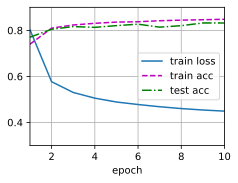

In [6]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

和以前一样，这个算法使结果收敛到一个相当高的精度，而且这次的代码比之前更精简了。

## 小结

* 使用深度学习框架的高级API，我们可以更简洁地实现softmax回归。
* 从计算的角度来看，实现softmax回归比较复杂。在许多情况下，深度学习框架在这些著名的技巧之外采取了额外的预防措施，来确保数值的稳定性。这使我们避免了在实践中从零开始编写模型时可能遇到的陷阱。

## 练习

1. 尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。
1. 增加迭代周期的数量。为什么测试精度会在一段时间后降低？我们怎么解决这个问题？


[Discussions](https://discuss.d2l.ai/t/11761)
